# Thesis script

## Loading packages and adjust settings

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import numpy as np
from lightgbm import LGBMClassifier
import shap
import xgboost as xgb
import warnings
pd.set_option("display.max_rows", 100)

## Loading and inspecting the data

In [4]:
all_data = pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\all_data.csv', sep=';')

Two coulmns already known not going to be used for the research is removed

In [5]:
all_data = all_data.drop(['Unnamed: 0','Segment'], axis=1)

The data is inspected

In [6]:
all_data.shape

(181593, 101)

In [7]:
all_data.value_counts('Churn')

Churn
0    163430
1     18163
dtype: int64

In [8]:
all_data.head(10)

Age  Seniority  ... Higher_car_loan_amount Churn
0   80       40.0  ...                   None     0
1   82       51.0  ...                   None     0
2   86       49.0  ...                   None     0
3   79       53.0  ...                   None     0
4   84       53.0  ...                   None     0
5   90       42.0  ...                   None     0
6   77       37.0  ...                   None     0
7   87       53.0  ...                   None     0
8   80       39.0  ...                   None     0
9   77       48.0  ...                   None     0

[10 rows x 101 columns]

## Removing null values

In [157]:
all_data = all_data.dropna(axis=0)

## Outlier detection

With the use of box-plots and counterplots outliers is found

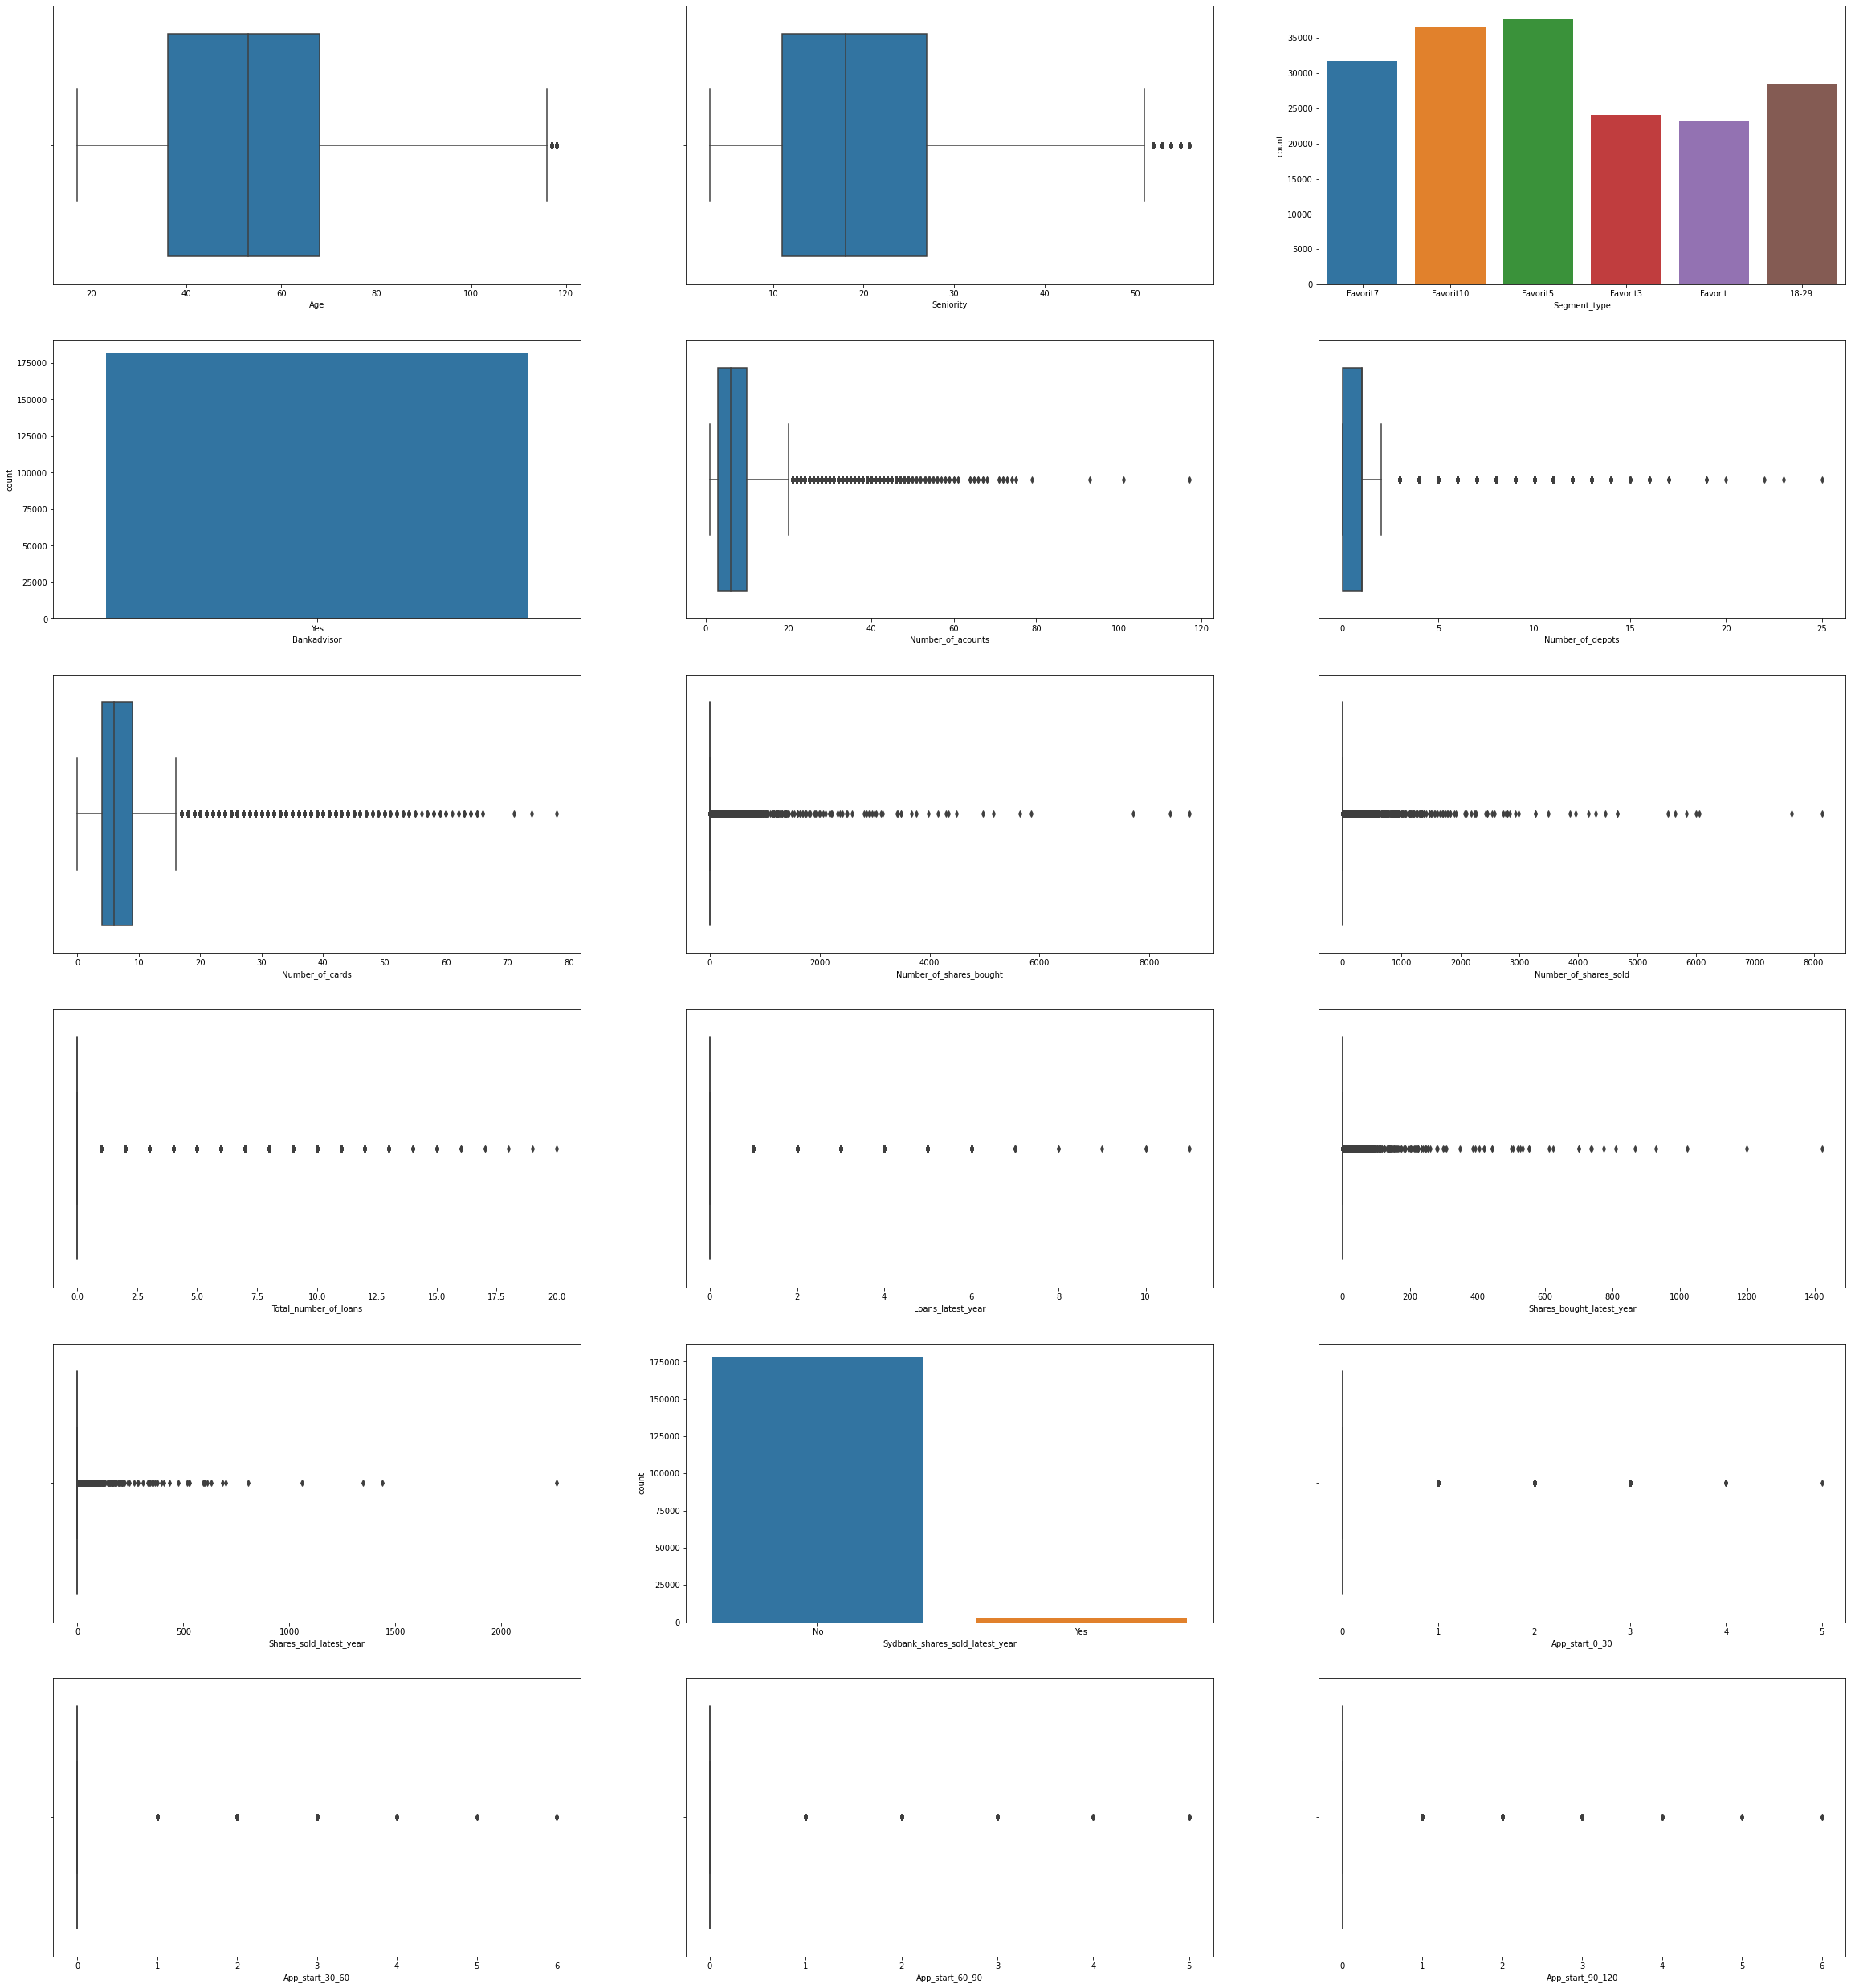

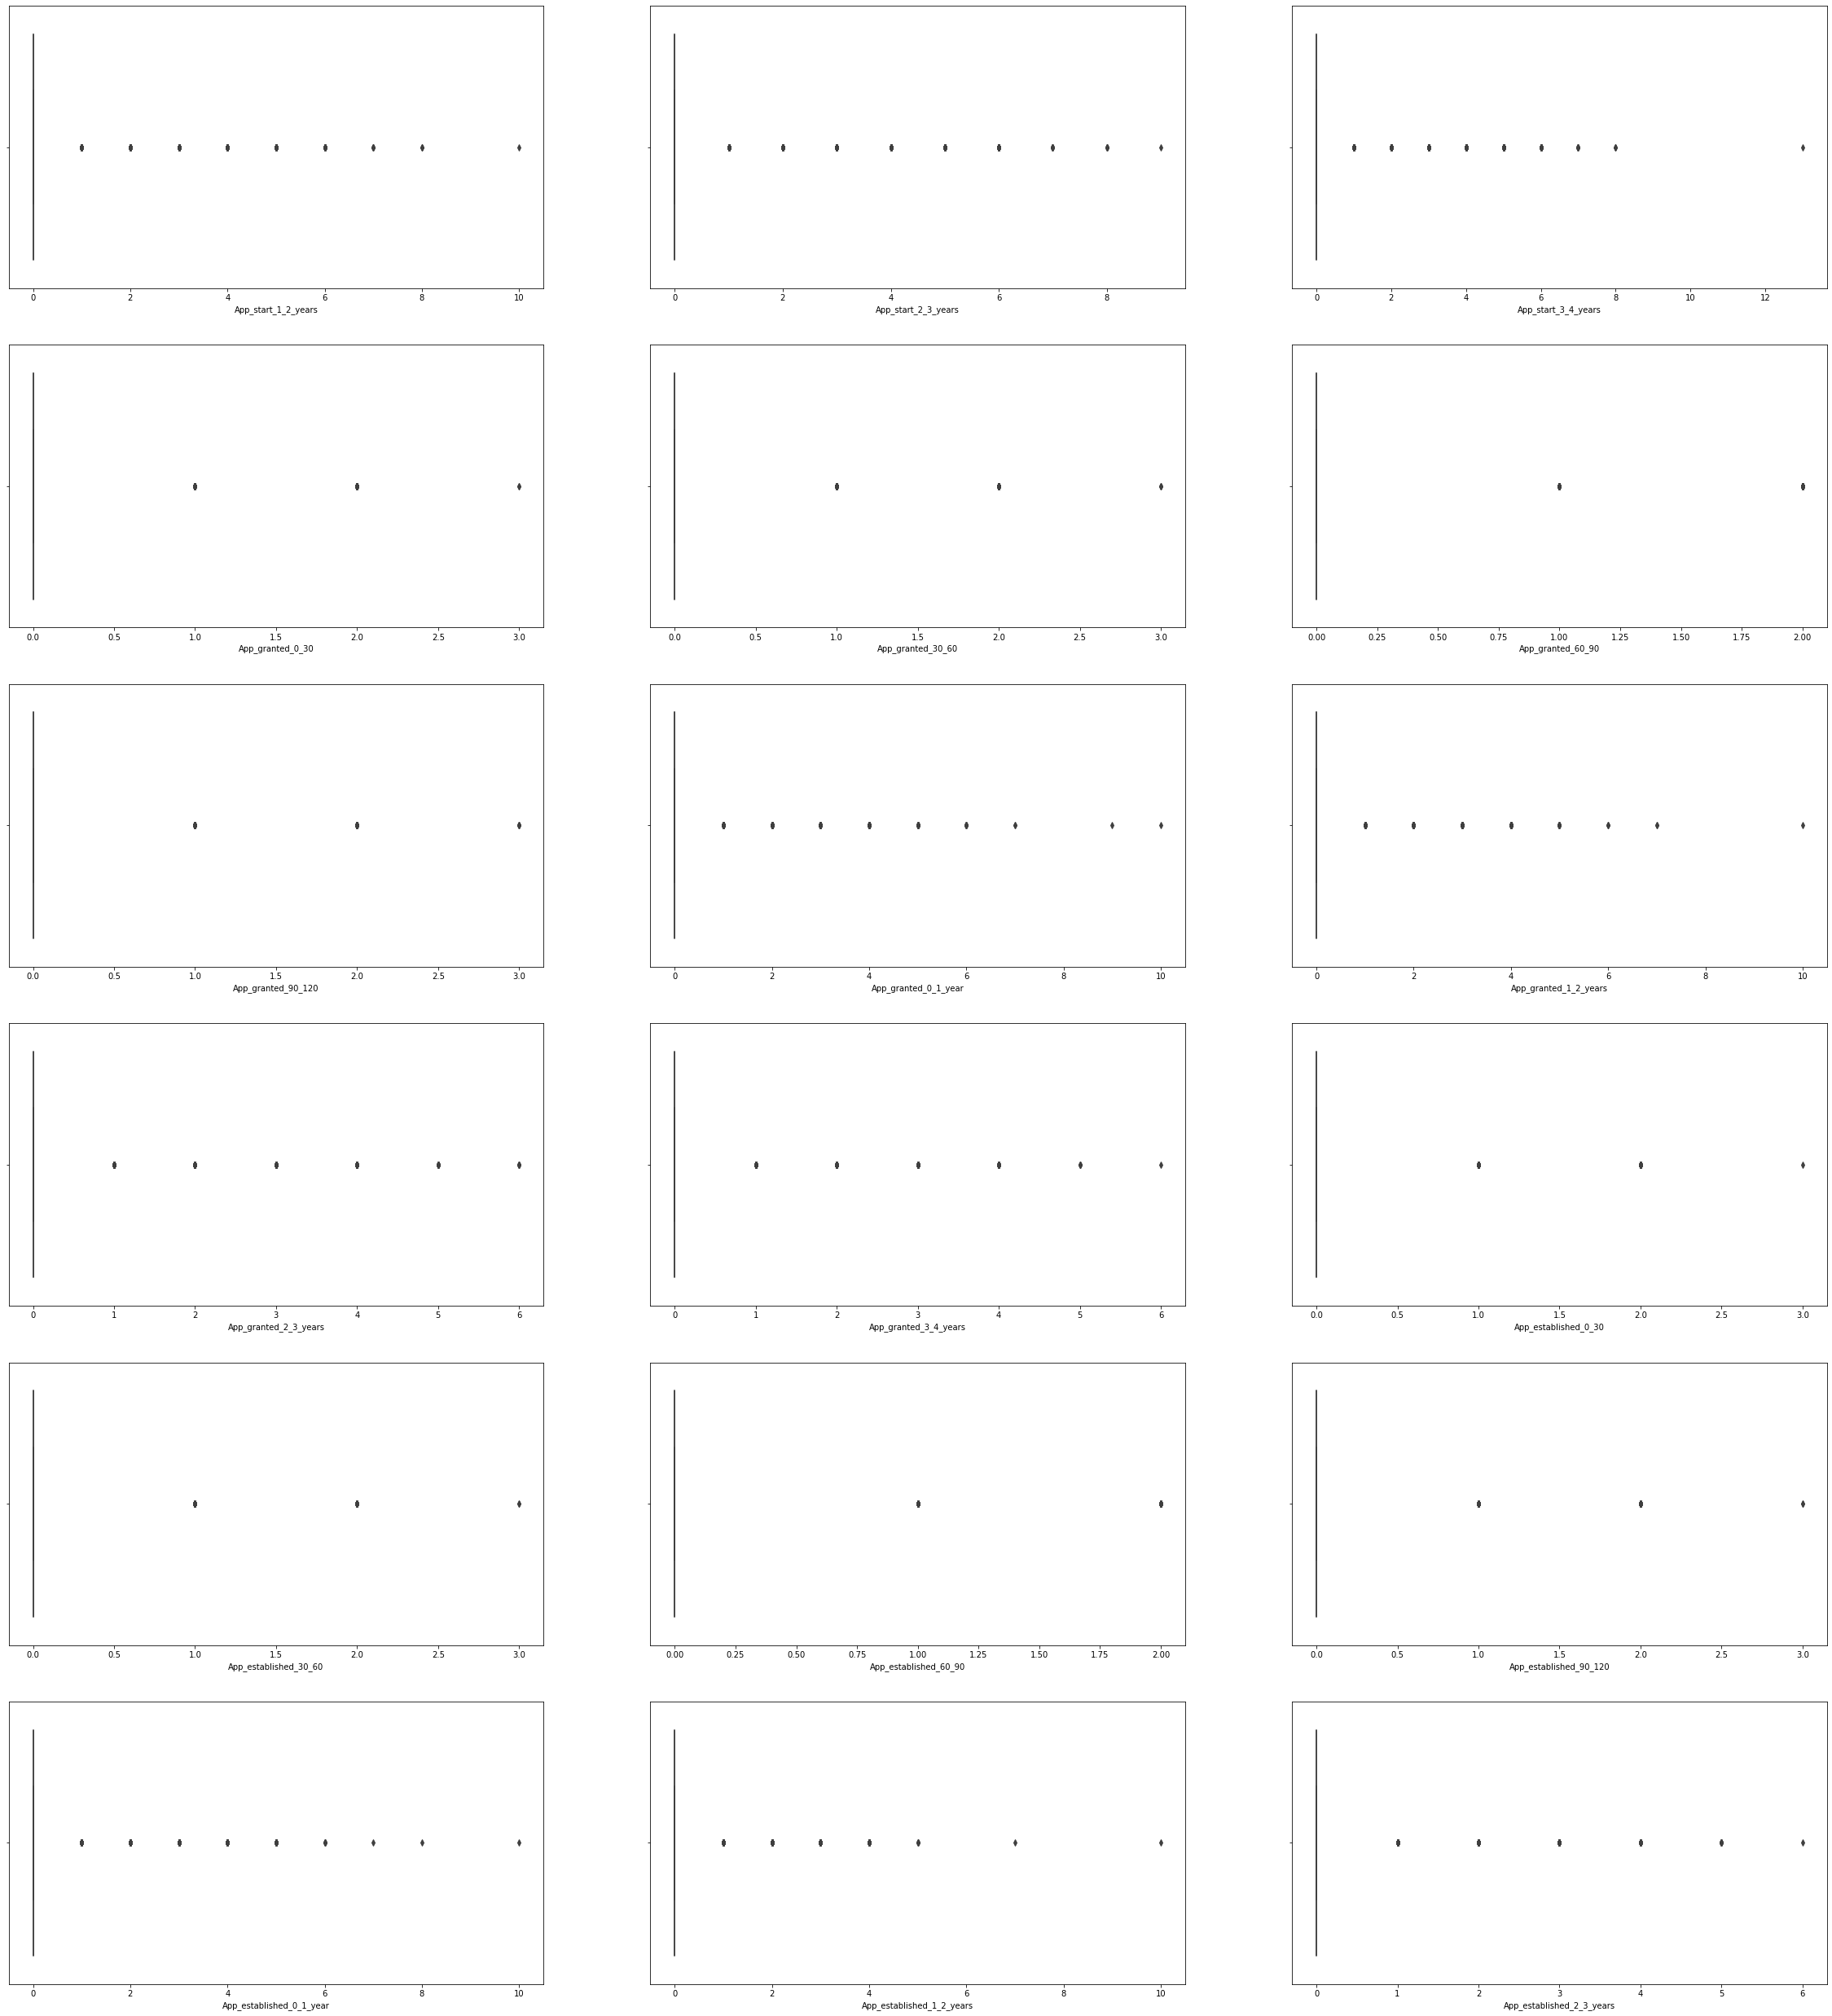

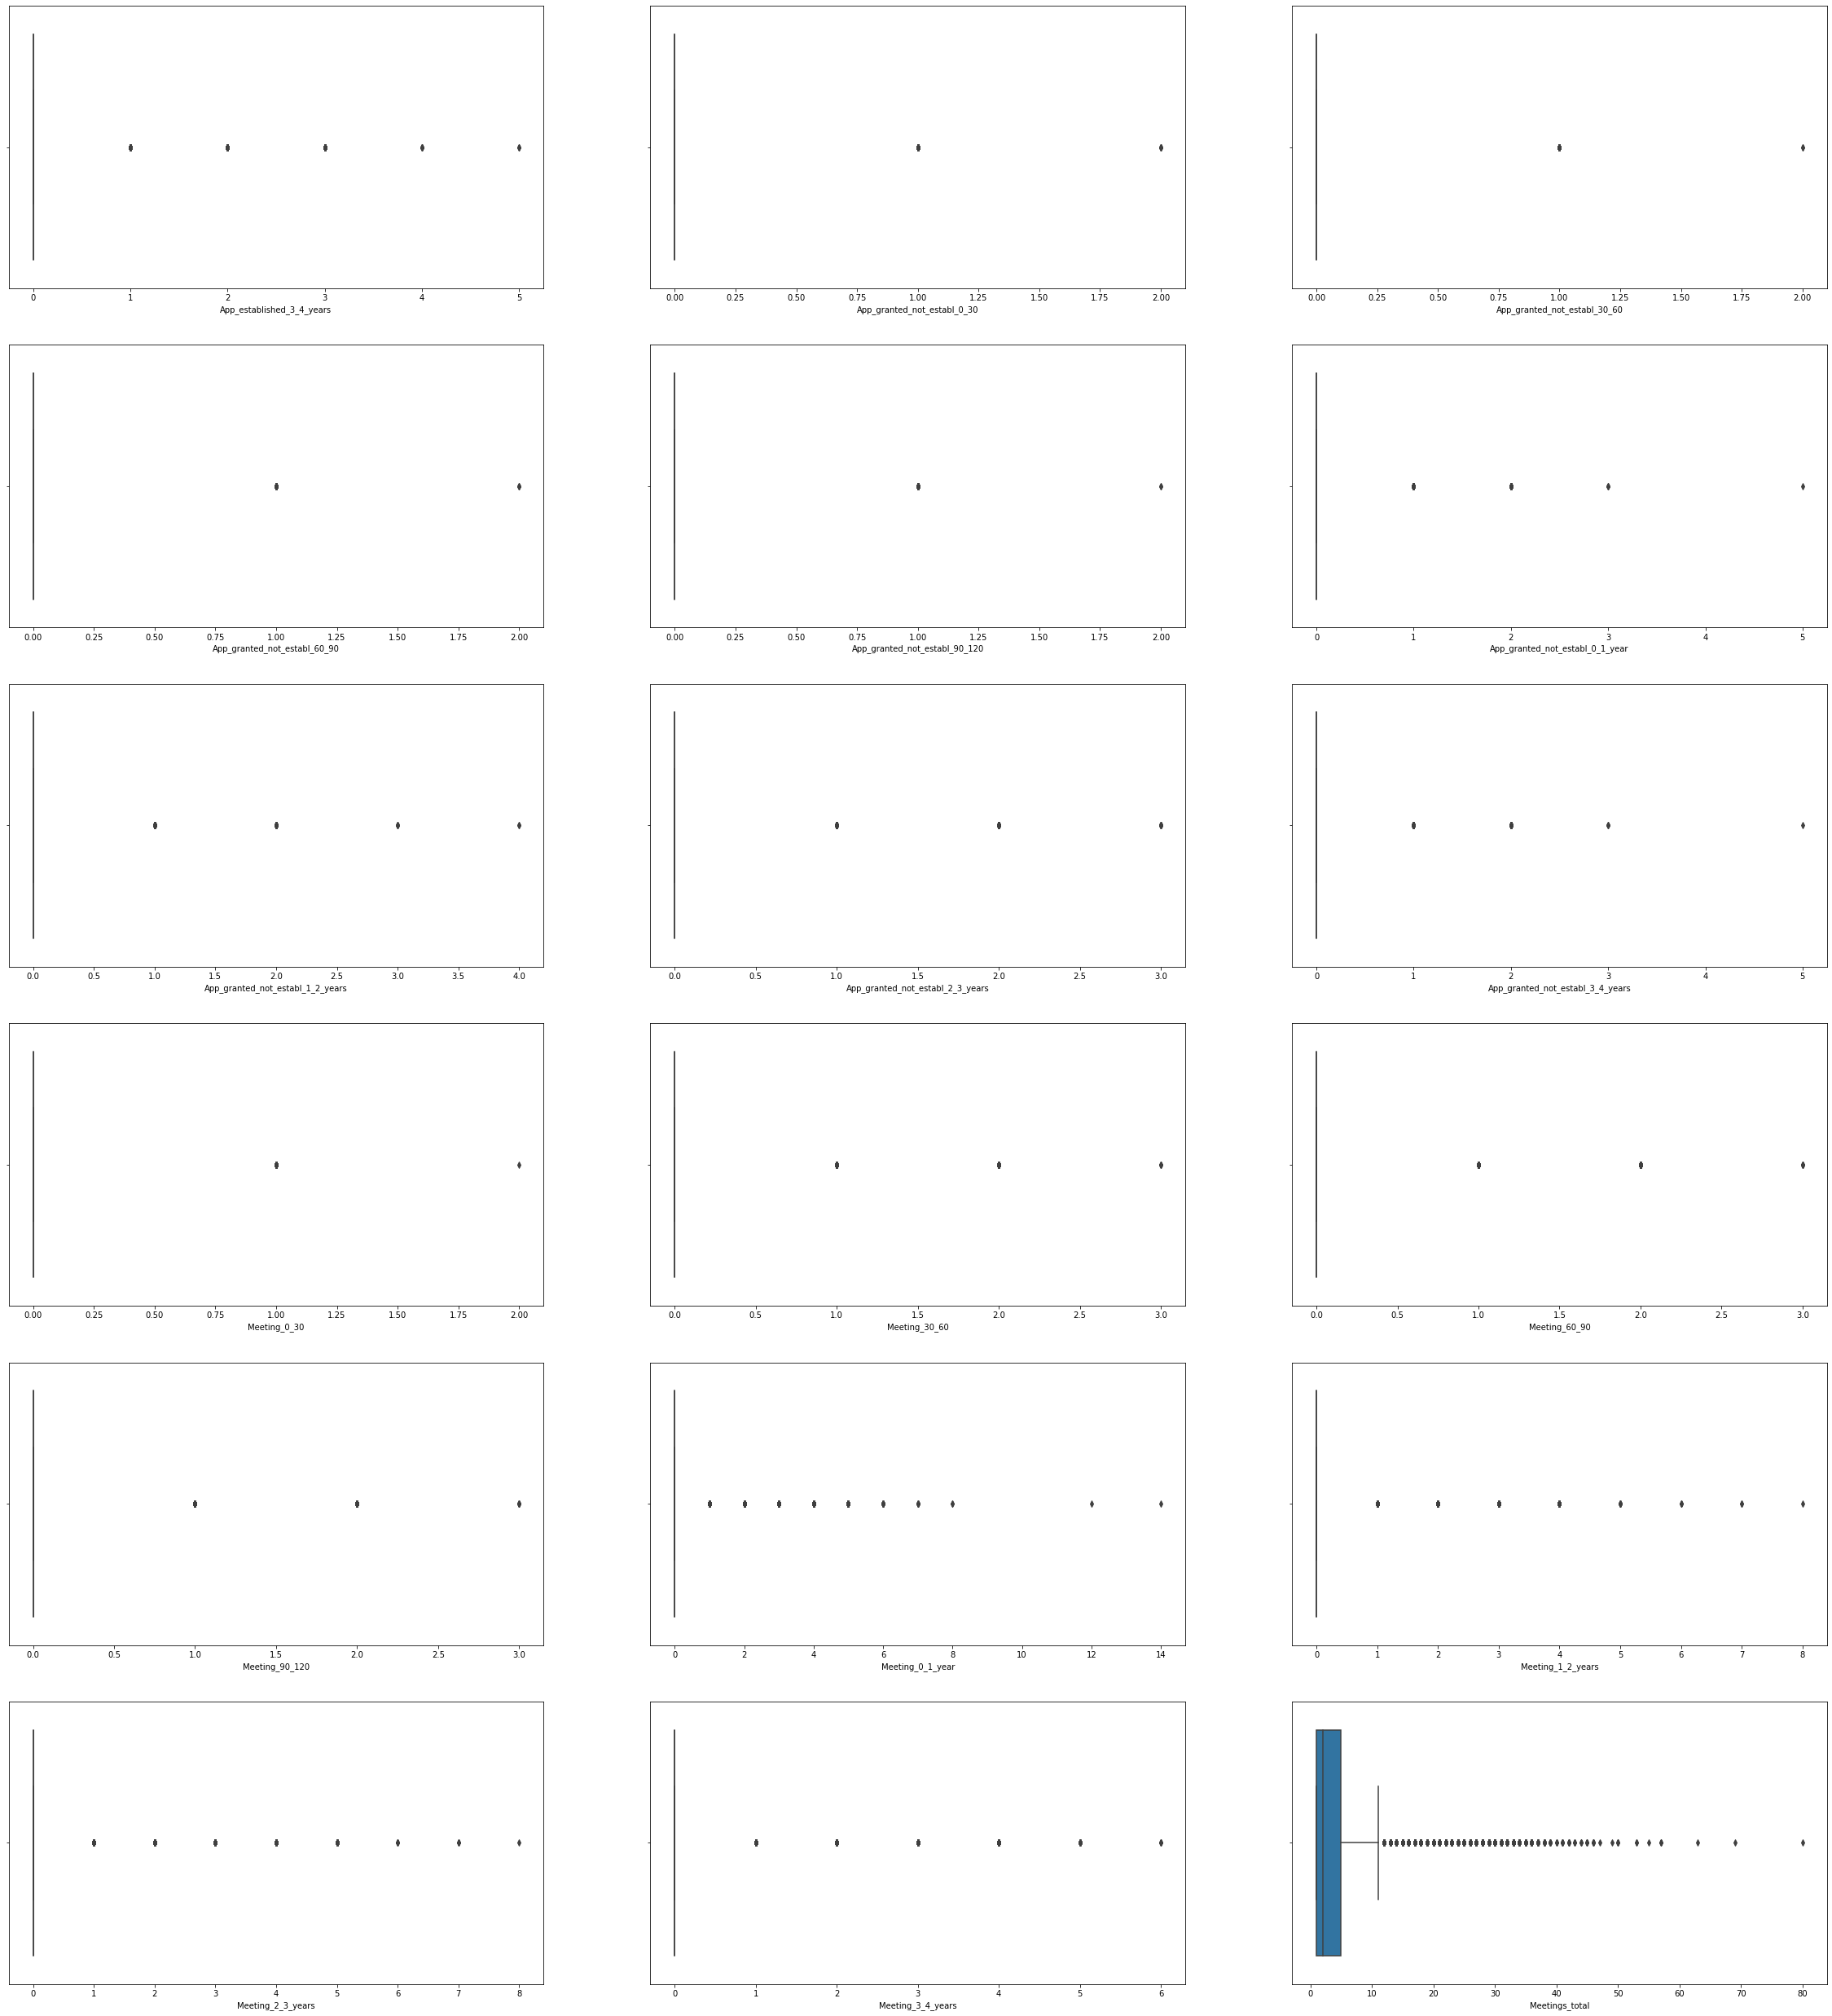

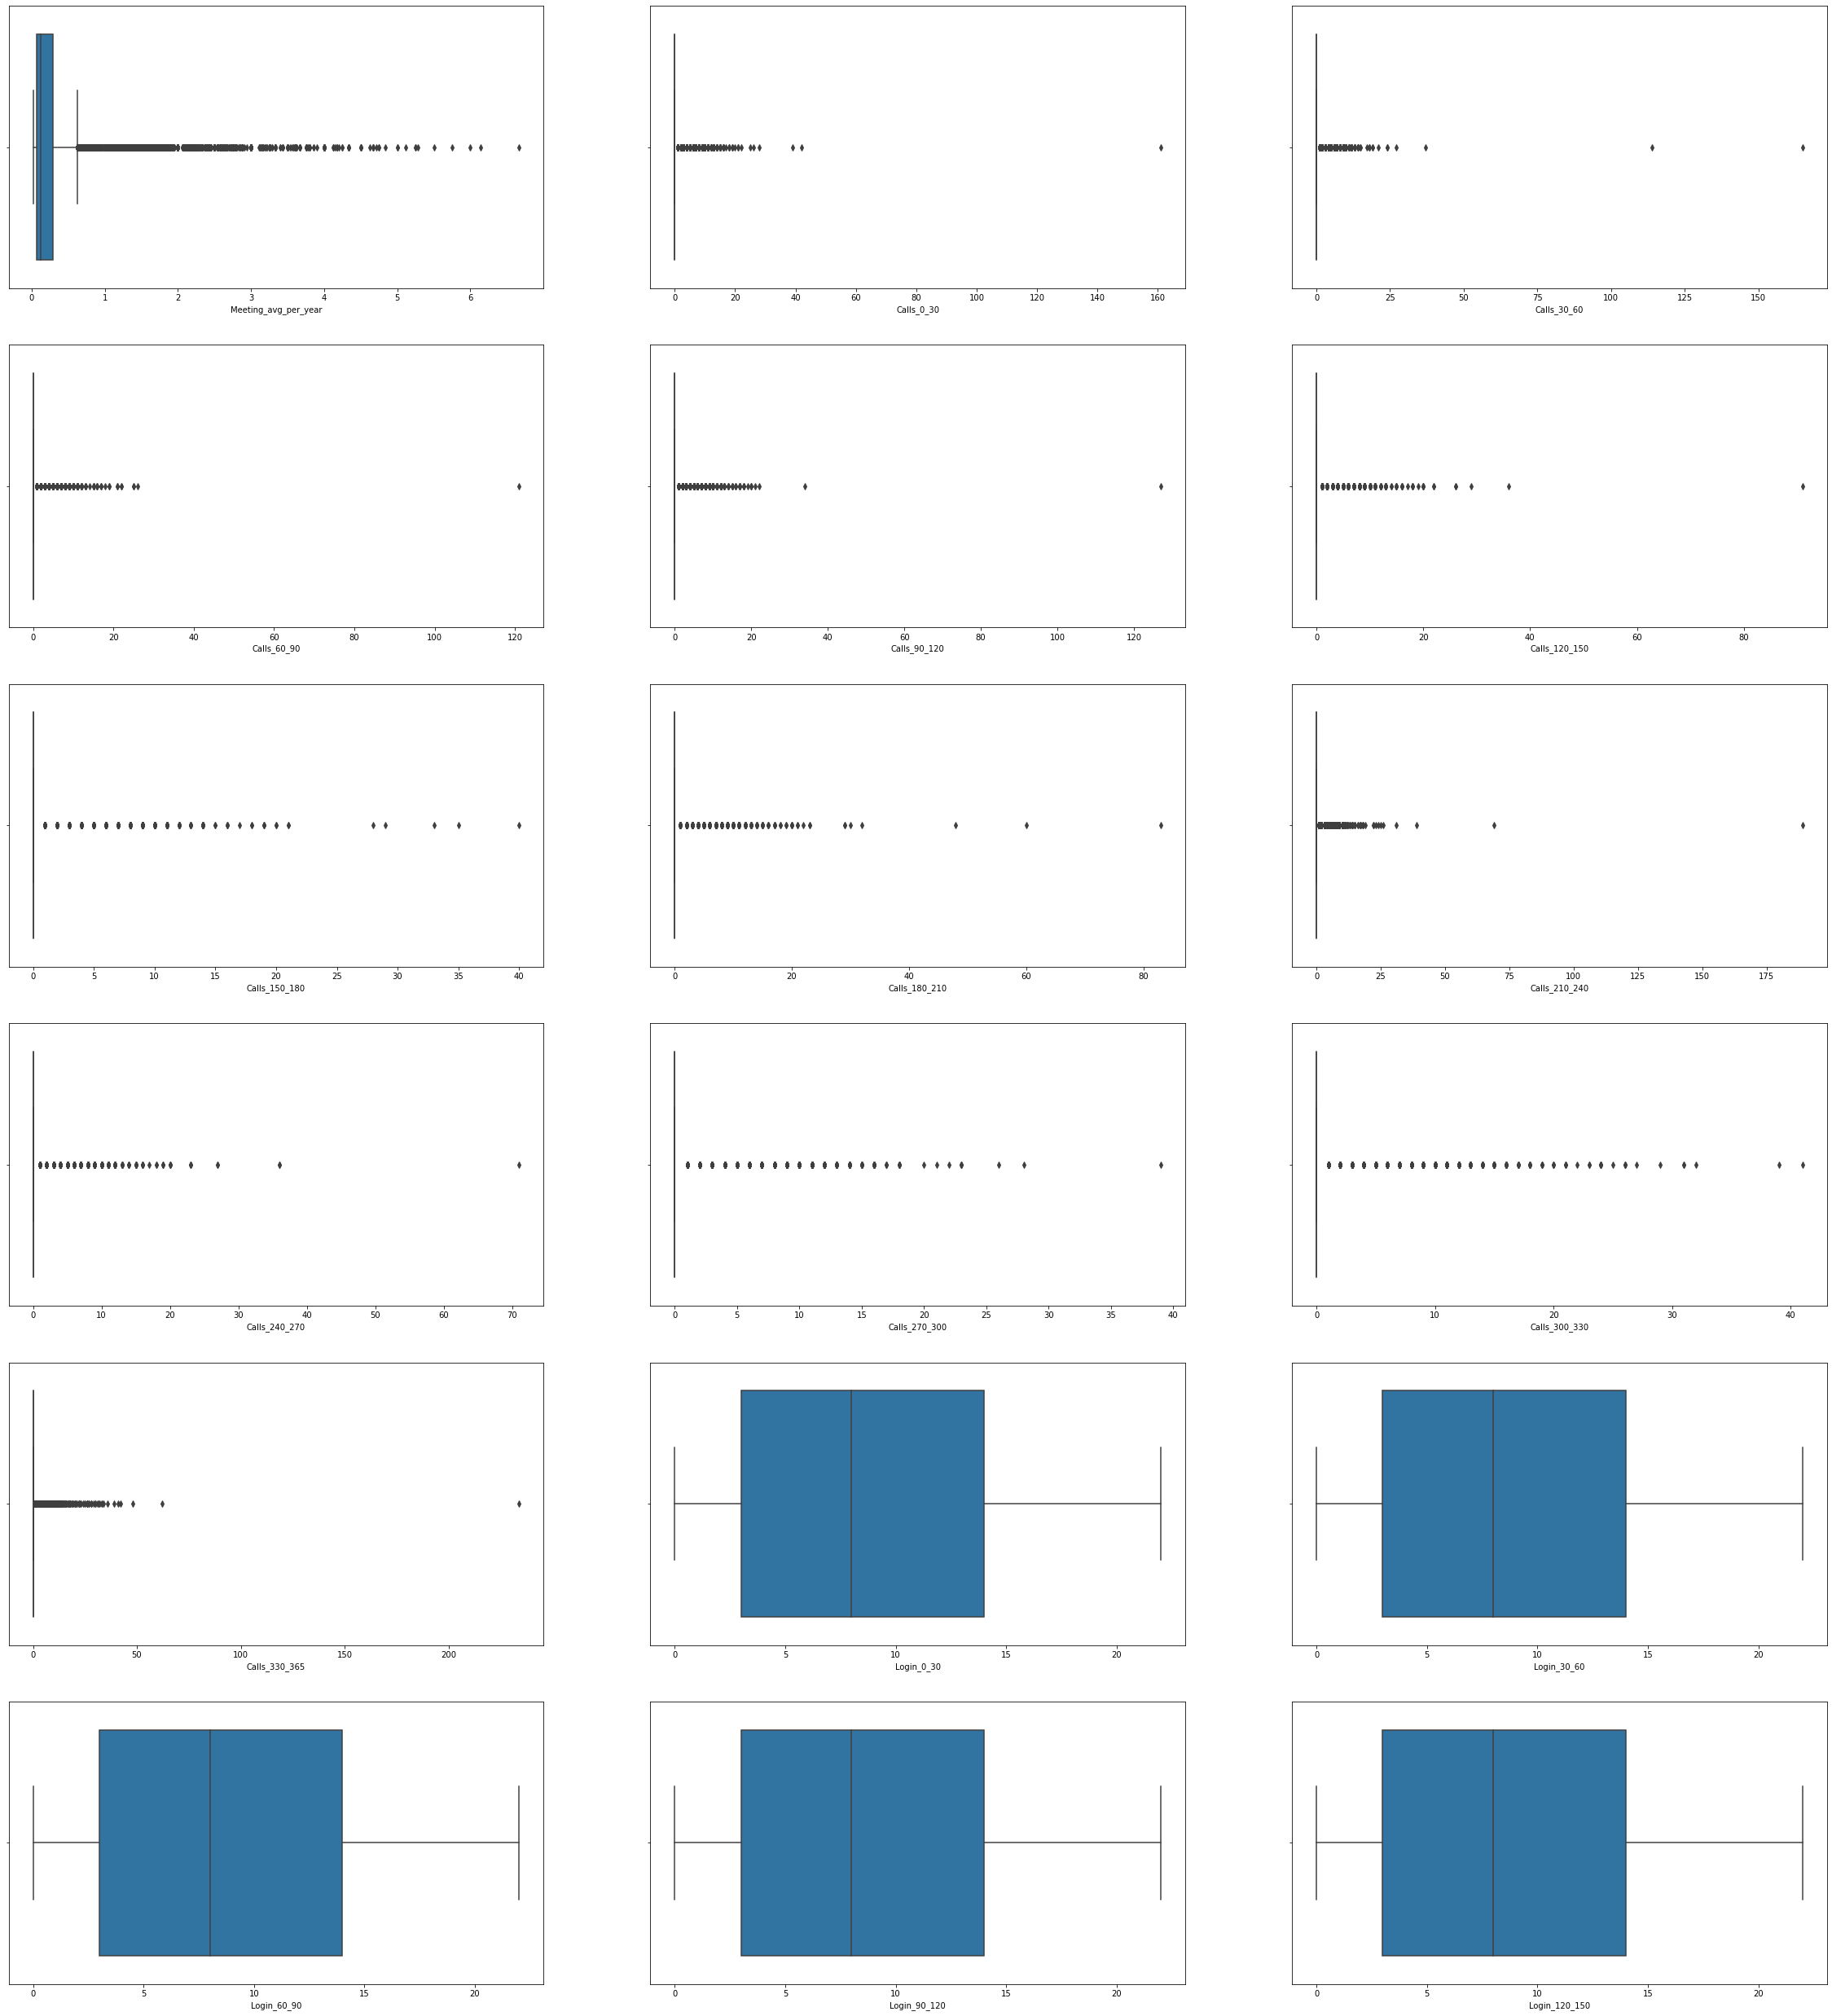

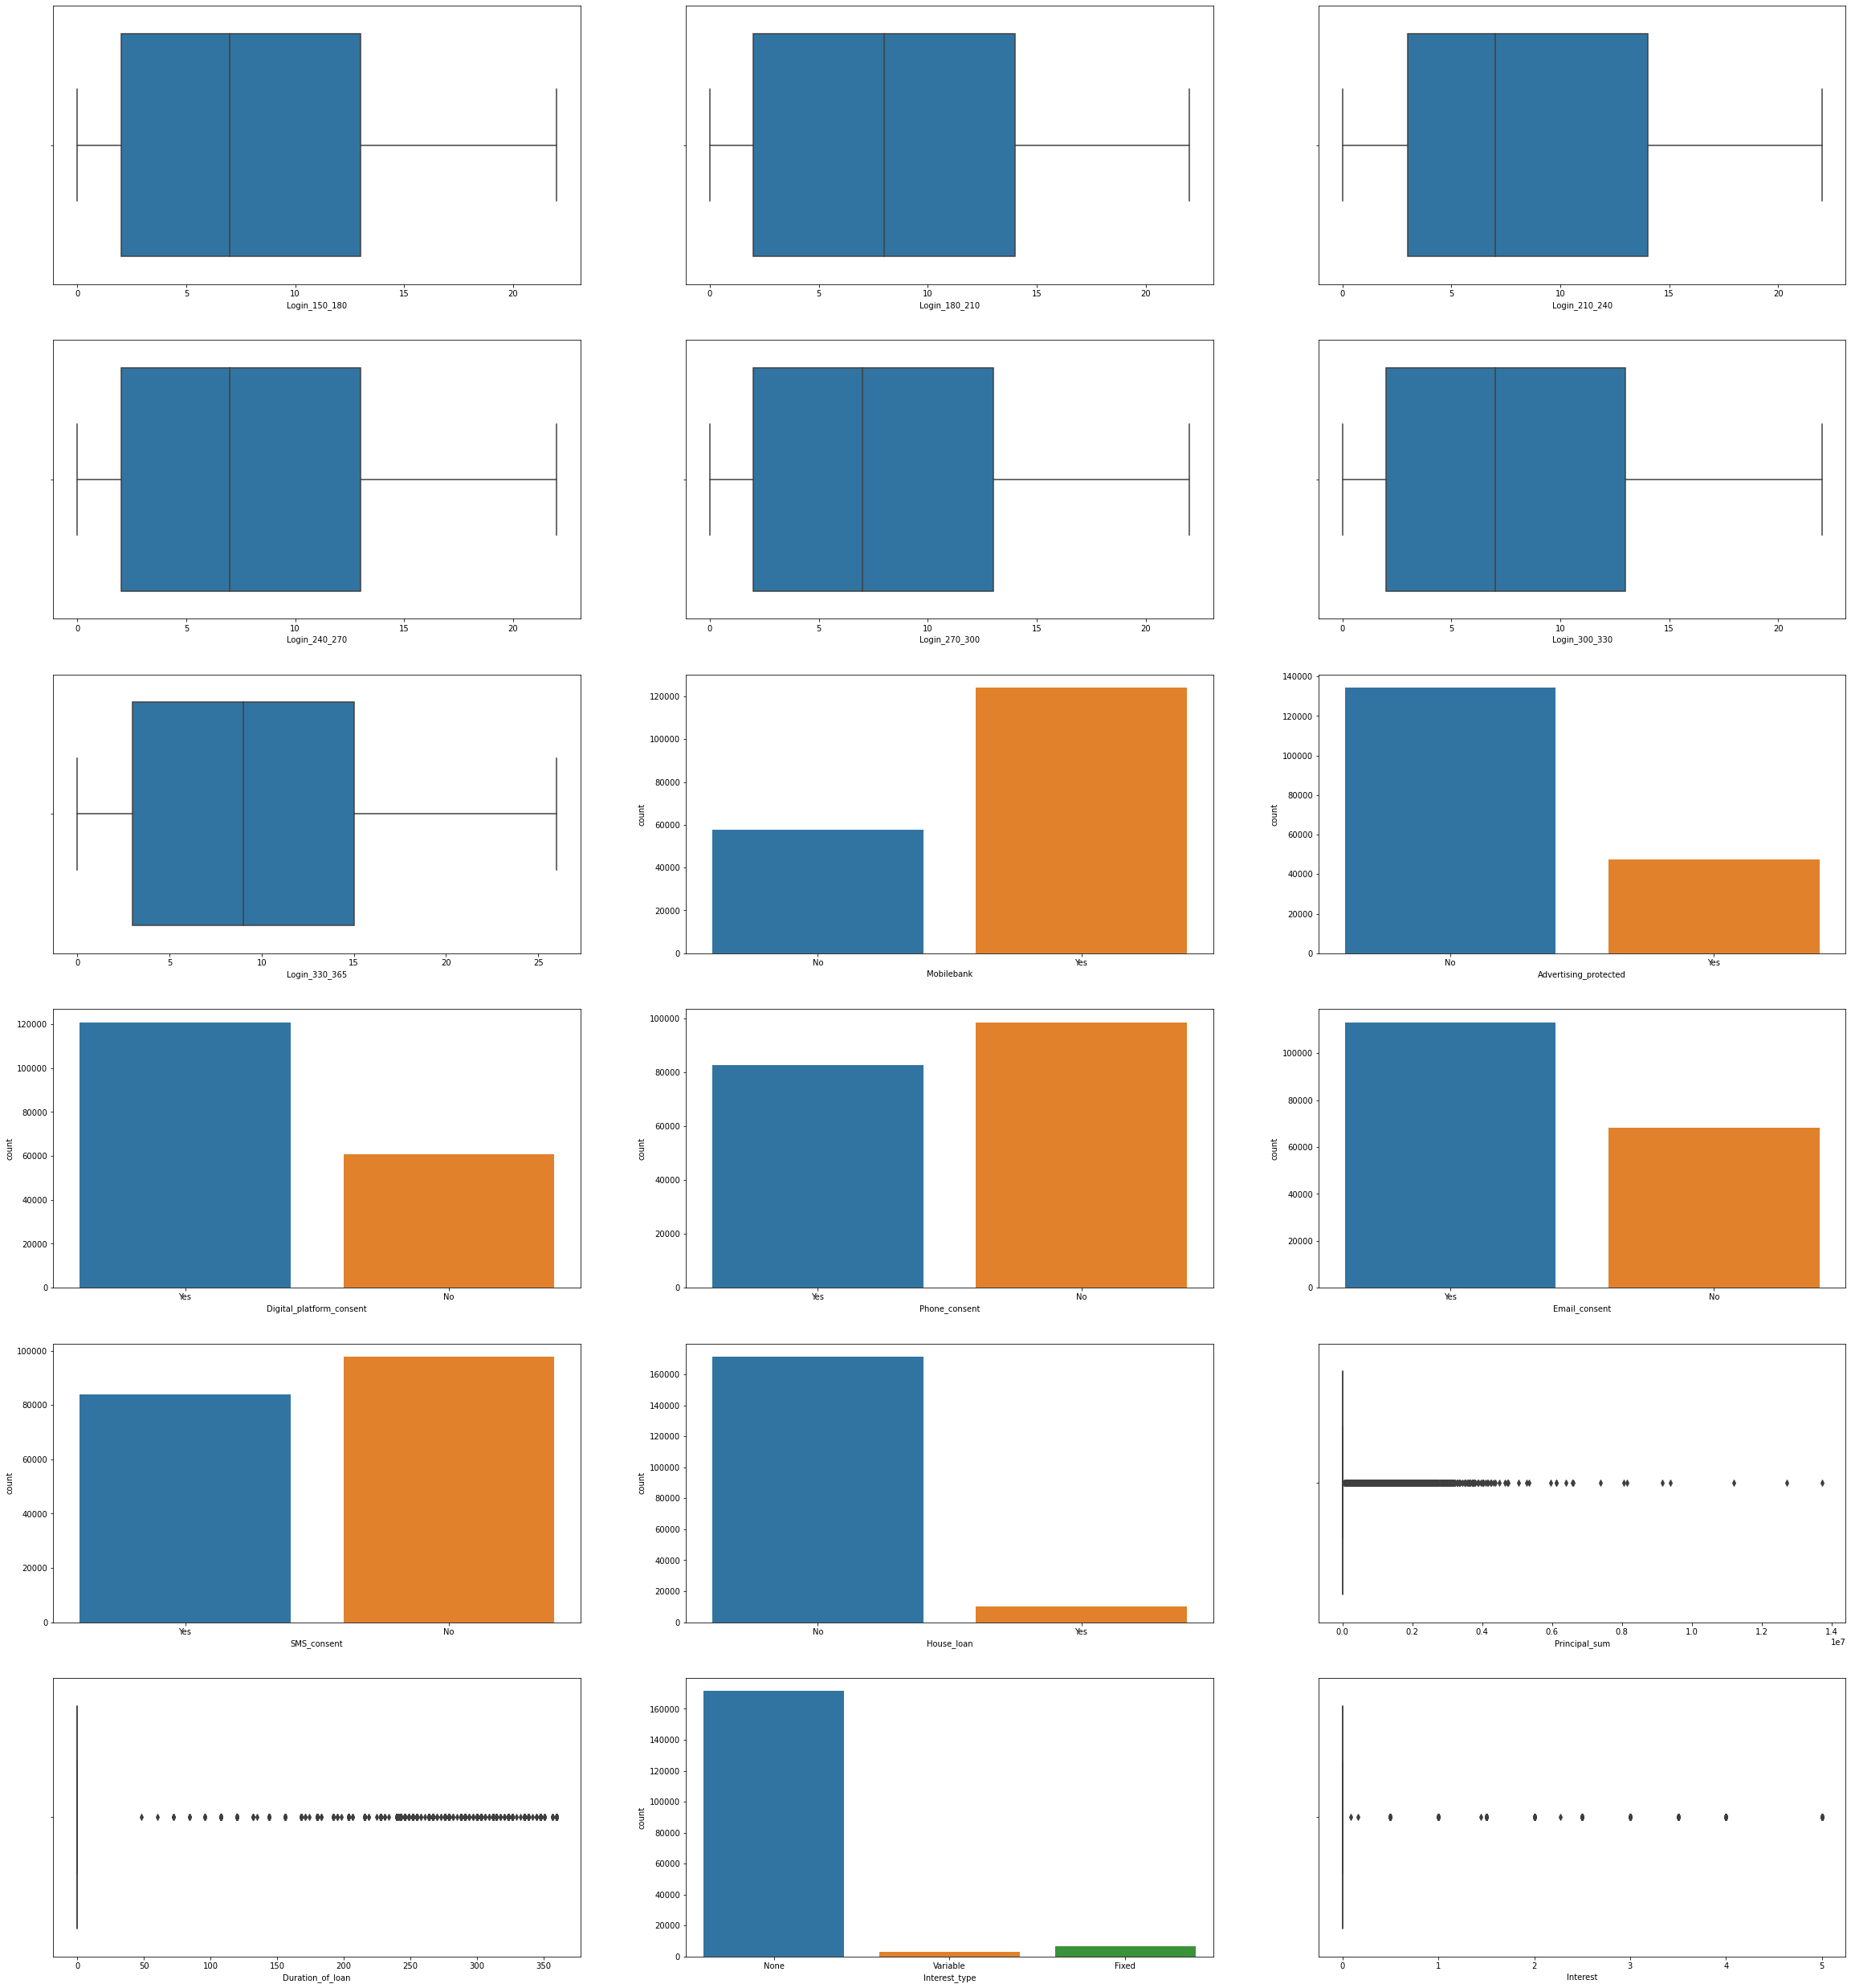

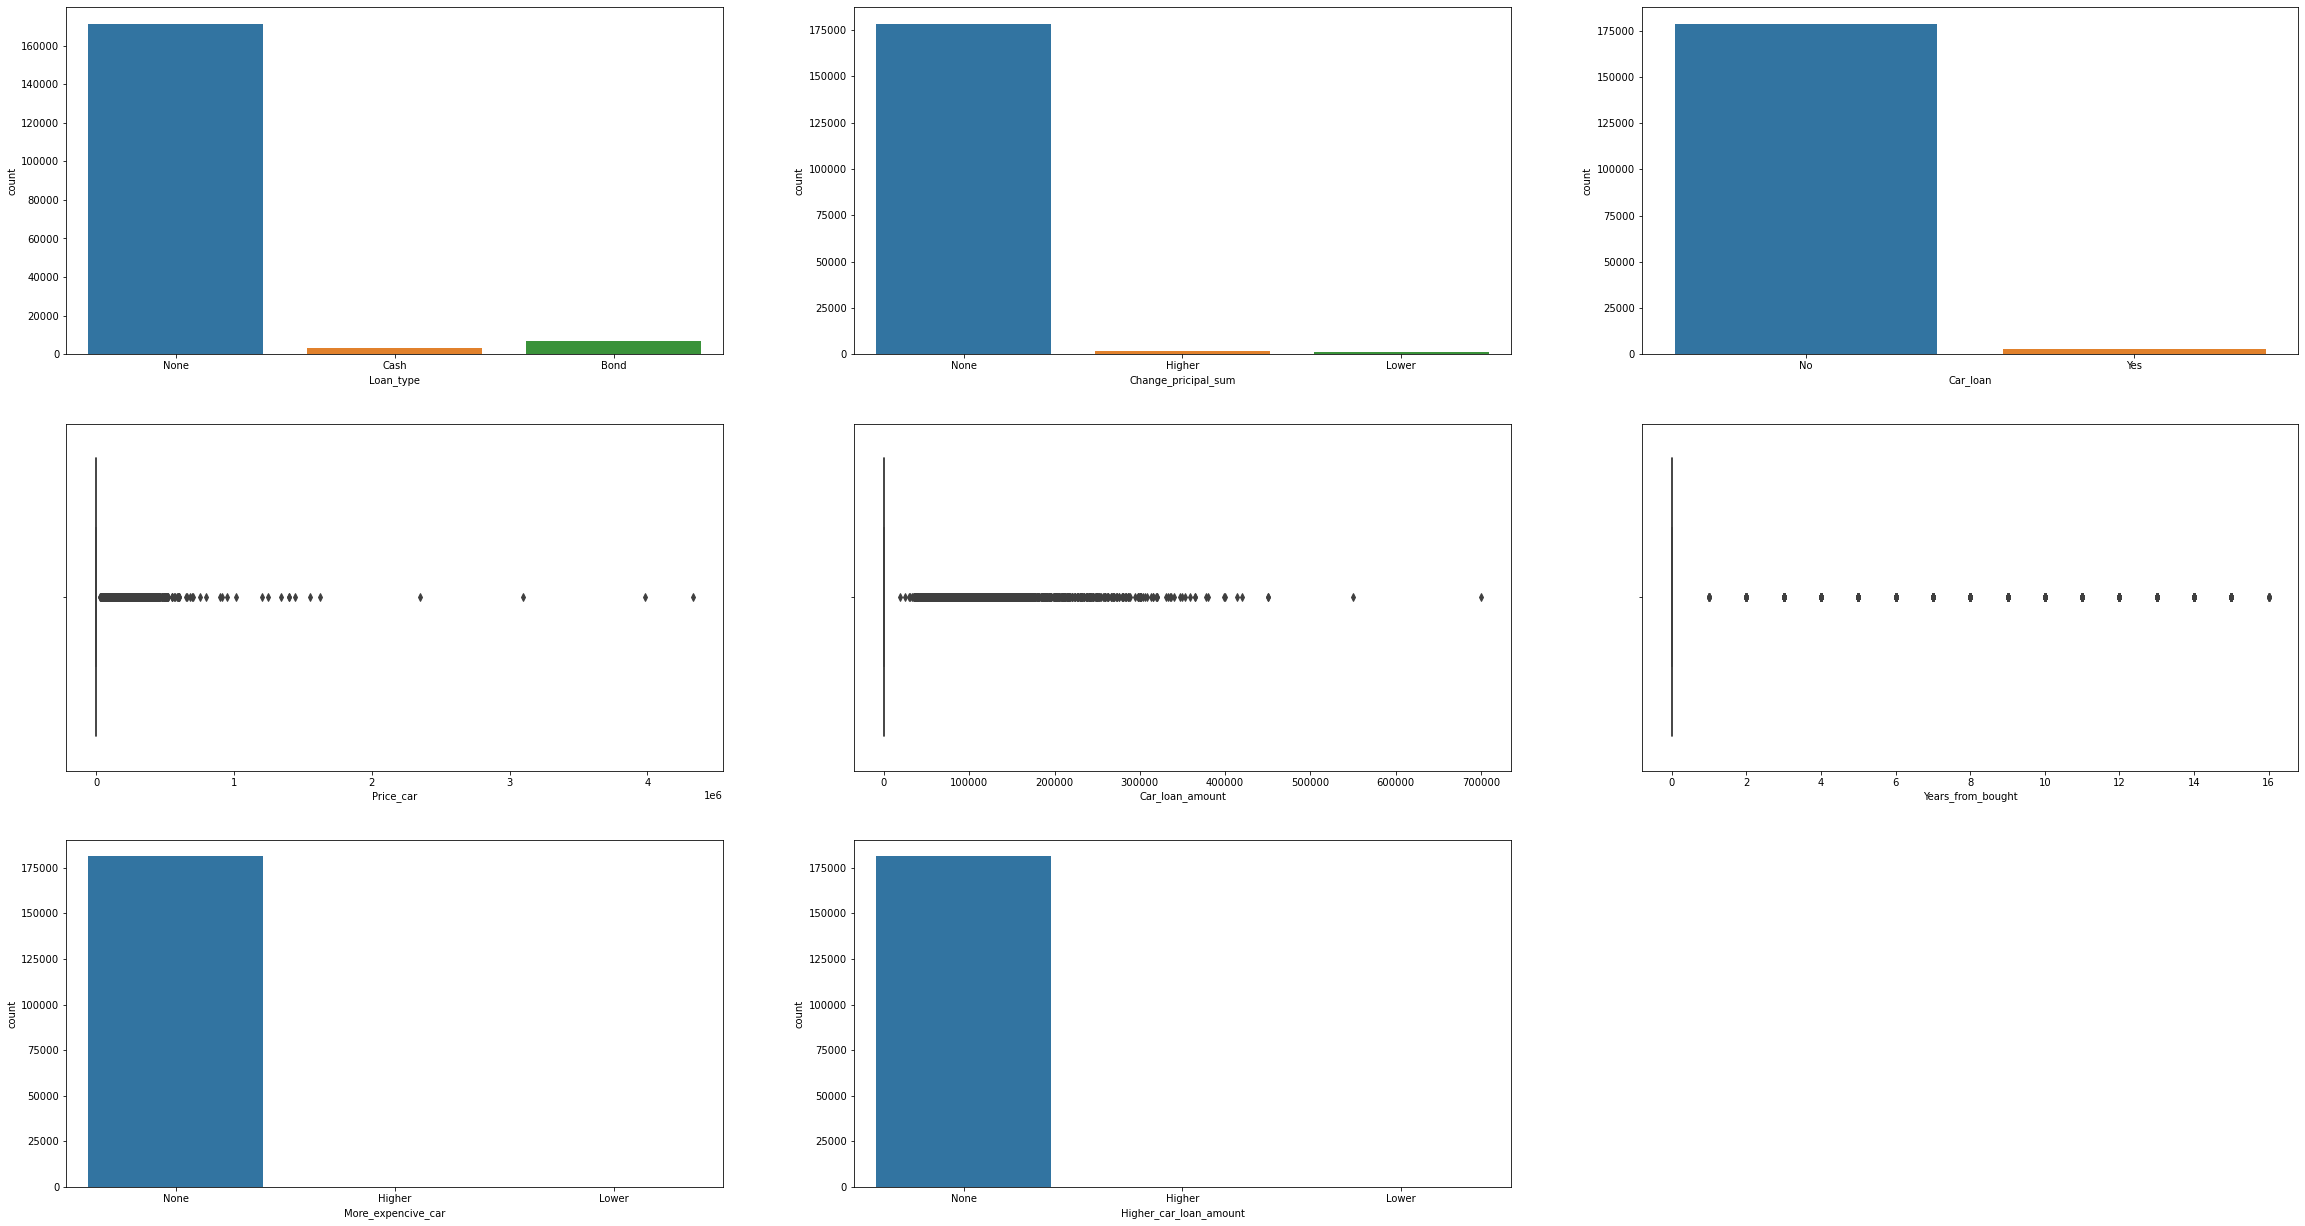

In [9]:
plt.figure(figsize=(40,60))
for i, variable in enumerate(all_data.iloc[:,:18].columns.tolist()):
    plt.subplot(8,3,i+1)
    if all_data.dtypes[variable]=='object':
        sns.countplot(data=all_data, x=variable)
    else:
        sns.boxplot(data=all_data, x=variable)
    plt.show

plt.figure(figsize=(40,60))
for i, variable in enumerate(all_data.iloc[:,19:37].columns.tolist()):
    plt.subplot(8,3,i+1)
    if all_data.dtypes[variable]=='object':
        sns.countplot(data=all_data, x=variable)
    else:
        sns.boxplot(data=all_data, x=variable)
    plt.savefig('outlier_1.png')    
    plt.show

plt.figure(figsize=(40,60))
for i, variable in enumerate(all_data.iloc[:,37:55].columns.tolist()):
    plt.subplot(8,3,i+1)
    if all_data.dtypes[variable]=='object':
        sns.countplot(data=all_data, x=variable)
    else:
        sns.boxplot(data=all_data, x=variable)
    plt.savefig('outlier_2.png')    
    plt.show

plt.figure(figsize=(40,60))
for i, variable in enumerate(all_data.iloc[:,55:73].columns.tolist()):
    plt.subplot(8,3,i+1)
    if all_data.dtypes[variable]=='object':
        sns.countplot(data=all_data, x=variable)
    else:
        sns.boxplot(data=all_data, x=variable)
    plt.savefig('outlier_3.png')    
    plt.show

plt.figure(figsize=(40,60))
for i, variable in enumerate(all_data.iloc[:,73:91].columns.tolist()):
    plt.subplot(8,3,i+1)
    if all_data.dtypes[variable]=='object':
        sns.countplot(data=all_data, x=variable)
    else:
        sns.boxplot(data=all_data, x=variable)
    plt.savefig('outlier_4.png')
    plt.show
    
plt.figure(figsize=(40,60))
for i, variable in enumerate(all_data.iloc[:,92:100].columns.tolist()):
    plt.subplot(8,3,i+1)
    if all_data.dtypes[variable]=='object':
        sns.countplot(data=all_data, x=variable)
    else:
        sns.boxplot(data=all_data, x=variable)
    plt.savefig('outlier_5.png')
    plt.show

### Removing outliers based on the results of the plots

Removing observations with age above 100

In [10]:
all_data = all_data[all_data.Age < 100]

Removing observations with more than 50 meetings total

In [11]:
all_data = all_data[all_data.Meetings_total < 50]

Remowing observations with more than 10 meetings the recent years

In [12]:
all_data = all_data[all_data.Meeting_0_1_year < 10]

Remowing observations with more than 80 acounts

In [13]:
all_data = all_data[all_data.Number_of_acounts < 80]

Remowing observations with more than 50 calls month 1

In [14]:
all_data = all_data[all_data.Calls_0_30 < 50]

Remowing observations with more than 50 calls month 2

In [15]:
all_data = all_data[all_data.Calls_30_60 < 50]

Remowing observations with more than 50 calls month 3

In [16]:
all_data = all_data[all_data.Calls_60_90 < 50]

Remowing observations with more than 50 calls month 4

In [17]:
all_data = all_data[all_data.Calls_90_120 < 50]

Remowing observations with more than 50 calls month 5

In [18]:
all_data = all_data[all_data.Calls_120_150 < 50]

Remowing observations with more than 50 calls month 6

In [19]:
all_data = all_data[all_data.Calls_150_180 < 50]

Remowing observations with more than 50 calls month 7

In [20]:
all_data = all_data[all_data.Calls_180_210 < 50]

Remowing observations with more than 50 calls month 8

In [21]:
all_data = all_data[all_data.Calls_210_240 < 50]

Remowing observations with more than 50 calls month 9

In [22]:
all_data = all_data[all_data.Calls_240_270 < 50]

Remowing observations with more than 50 calls month 12

In [23]:
all_data = all_data[all_data.Calls_330_365 < 50]

### Inspecting the data after outliers is removed

In [24]:
all_data.shape

(179432, 101)

In [25]:
all_data['Churn'].value_counts()

0    161278
1     18154
Name: Churn, dtype: int64

## Encoding categorical features

Applying label encoding for categorical features with two categoris, and one-hot-encoding for features with more than two categories

### Label encoding

In [26]:
labelencoder = LabelEncoder()

In [27]:
all_data['Advertising_protected'] = labelencoder.fit_transform(all_data['Advertising_protected'])
all_data['Digital_platform_consent'] = labelencoder.fit_transform(all_data['Digital_platform_consent'])
all_data['Phone_consent'] = labelencoder.fit_transform(all_data['Phone_consent'])
all_data['Email_consent'] = labelencoder.fit_transform(all_data['Email_consent'])
all_data['SMS_consent'] = labelencoder.fit_transform(all_data['SMS_consent'])
all_data['Bankadvisor'] = labelencoder.fit_transform(all_data['Bankadvisor'])
all_data['Sydbank_shares_sold_latest_year'] = labelencoder.fit_transform(all_data['Sydbank_shares_sold_latest_year'])
all_data['Car_loan'] = labelencoder.fit_transform(all_data['Car_loan'])
all_data['House_loan'] = labelencoder.fit_transform(all_data['House_loan'])
all_data['Mobilebank'] = labelencoder.fit_transform(all_data['Mobilebank'])

### One-hot-encoding

Builds function to one-hot-encode features

In [28]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False).astype(int)
        df = pd.concat([df, dummies], axis=1)
    return df

Encodes features and removes original feauters

In [29]:
all_data = one_hot(all_data,['Segment_type','Interest_type','Loan_type','Change_pricipal_sum','More_expencive_car','Higher_car_loan_amount'])
all_data = all_data.drop(['Segment_type','Interest_type','Loan_type','Change_pricipal_sum','More_expencive_car','Higher_car_loan_amount'], axis = 1)

## Feature selection

Feature selection with the use of information gain

<function matplotlib.pyplot.show(close=None, block=None)>

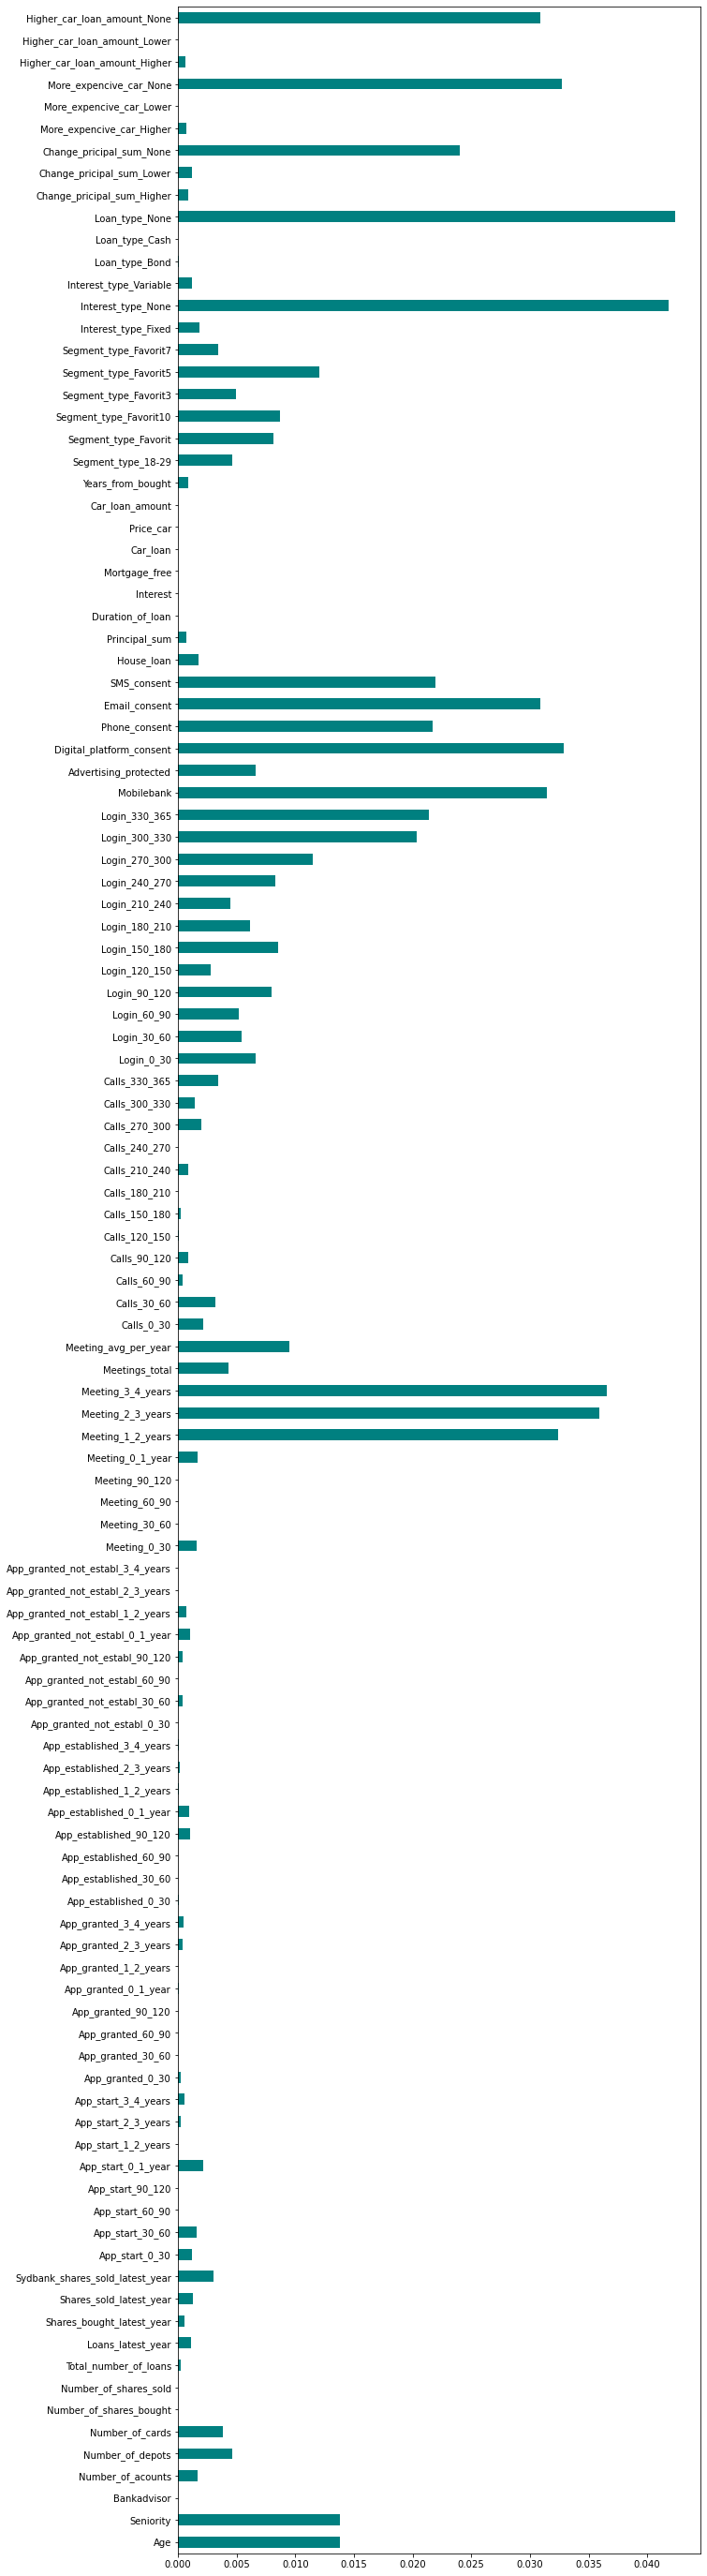

In [30]:
Y = all_data['Churn']
X = all_data.drop(['Churn'], axis = 1)
%matplotlib inline
importances = mutual_info_classif(X,Y)
%matplotlib inline
plt.figure(figsize=(10,50))
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind = 'barh', color='teal')
plt.savefig('information_gain.png')
plt.show

Remowing features not found usefull for the research

In [31]:
all_data = all_data.drop(['Higher_car_loan_amount_Lower','Higher_car_loan_amount_Higher',
                        'App_granted_0_30','App_granted_30_60','App_granted_60_90','App_granted_90_120','App_granted_1_2_years',
                        'App_granted_2_3_years','App_granted_3_4_years','App_established_0_30','App_established_30_60','App_established_60_90',
                        'App_established_90_120','App_granted_not_establ_0_30','App_granted_not_establ_30_60',
                        'App_granted_not_establ_90_120','Price_car','Car_loan_amount','Years_from_bought',
                        'Principal_sum','Duration_of_loan','Interest','Mortgage_free','Interest_type_Fixed','Interest_type_None','Interest_type_Variable',
                        'Loan_type_Bond','Loan_type_Cash','Loan_type_None','Change_pricipal_sum_Higher','Change_pricipal_sum_Lower','Change_pricipal_sum_None',
                        'More_expencive_car_Higher','More_expencive_car_Lower','More_expencive_car_None','Higher_car_loan_amount_Higher','Higher_car_loan_amount_Lower',
                         'Higher_car_loan_amount_None','Bankadvisor'], axis = 1)

### Inspecting data after feauture encdoing and one-hot-encoding

In [32]:
all_data.shape

(179432, 79)

In [33]:
all_data['Churn'].value_counts()

0    161278
1     18154
Name: Churn, dtype: int64

## Splitting data

The data is split into a train, validation and test set

In [159]:
print((100/18154)*4000)

22.033711578715433


In [35]:
Y_all = all_data['Churn']
all_data = all_data.drop(['Churn'],axis=1)

In [36]:
X_train, X, y_train, y = train_test_split(all_data, Y_all, test_size=0.221, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.502, random_state=42)

### Inspecting the differnt sets

Train set

In [37]:
y_train.value_counts()

0    125639
1     14138
Name: Churn, dtype: int64

Validation set

In [38]:
y_val.value_counts()

0    17733
1     2015
Name: Churn, dtype: int64

Test set

In [39]:
y_test.value_counts()

0    17906
1     2001
Name: Churn, dtype: int64

## Scaling the data

In [40]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
X_val_scaled = StandardScaler().fit_transform(X_val)

## Training of the models and performing grid search

All types of models and approachs are trained and grid search for them are performed

### Basic models

LightGBM

In [ ]:
from lightgbm import LGBMClassifier
max_d = [5,7,8,9,10,11,12,13,14,15]
learning_rate = [0.05,0.1,0.2]
n_estimators = [500, 700, 800, 900, 1000, 1100, 1200]
num_leaves = [16,32,40,45,50,55,60]

runs = len(max_d)*len(learning_rate)*len(n_estimators)*len(num_leaves)
print(f'Number of runs to perform: {runs}')

n = 0
resultsLGBT = []

for learning_r in learning_rate:
    for number_estimators in n_estimators:
        for number_leaves in num_leaves:
            for max_dp in max_d:
                    lgbm = LGBMClassifier(learning_rate = learning_r,
                                          n_estimators = number_estimators,
                                          num_leaves = number_leaves,
                                          max_depth = max_dp,
                                          random_state=42)
    
                    lgbm.fit(X_train_scaled, y_train)
    
                    y_train_hat = lgbm.predict(X_train_scaled)
                            
                    y_val_hat = lgbm.predict(X_val_scaled)
                            
                    Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                    valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                    Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                    F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
                    
                    Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)
    
                    resultsLGBT.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, learning_r, number_estimators, number_leaves,max_dp])
                            
                    n += 1
                    print(f'Number of runs: {n}')

In [ ]:
df_Lgb_w = pd.DataFrame(resultsLGBT_weight)
df_Lgb_w.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1', 'ROC_AUC', 'learning_rate', 'n_estimators', 'Number leaves','max_depth','Weight']
optimal_LGB_w=df_Lgb_w.nlargest(60,'Recall')
optimal_LGB_w_2=df_Lgb_w.nlargest(60,'Precesion')
optimal_LGB_w_3=df_Lgb_w.nlargest(60,'F1')
df_Lgb_w.to_csv('LGB_w_hyper.csv', index=False)
optimal_LGB_w.to_csv('LGB_W_hyper_opt.csv', index=False)
optimal_LGB_w_2.to_csv('LGB_W_hyper_opt_2.csv', index=False)
optimal_LGB_w_3.to_csv('LGB_W_hyper_opt_3.csv', index=False)

CatBoost

In [ ]:
from catboost import CatBoostClassifier
iterations = [500, 700, 1000]
learning_rate = [0.05,0.1,0.3]
depth = [6,7,8,9]
l2_leaf_reg = [3,6,9]

runs = len(iterations)*len(learning_rate)*len(depth)*len(l2_leaf_reg)
print(f'Number runs to perform: {runs}')

resultsCat = []

n = 0
for ite in iterations:
    for l_rate in learning_rate:
        for depth_tree in depth:
            for l2_reg in l2_leaf_reg:
                            print(f'Iterations: {ite}, Learning rate: {l_rate}')
                            print(f'Depth: {depth_tree}, l2_leaf_reg: {l2_reg}')


                            cat = CatBoostClassifier(iterations=ite,
                                                     learning_rate = l_rate,
                                                     depth = depth_tree,
                                                     l2_leaf_reg = l2_reg,
                                                     random_seed= 42,
                                                     eval_metric = 'Accuracy',
                                                     early_stopping_rounds = 100,
                                                     verbose = 500)

                            cat.fit(X_train_scaled, y_train)

                            y_train_hat = cat.predict(X_train_scaled)

                            y_val_hat = cat.predict(X_val_scaled)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsCat.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, ite, l_rate, depth_tree, l2_reg])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_cat = pd.DataFrame(resultsCat)
df_cat.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'Iterations', 'learning rate', 'depth', 'L 2']
optimal_cat=df_cat.nlargest(200,'Recall')
optimal_cat_2=df_cat.nlargest(200,'Precesion')
optimal_cat_3=df_cat.nlargest(200,'F1_score')
df_cat.to_csv('cat_hyper.csv', index=False)
optimal_cat.to_csv('cat_hyper_opt.csv', index=False)
optimal_cat_2.to_csv('cat_hyper_opt_2.csv', index=False)
optimal_cat_3.to_csv('cat_hyper_opt_3.csv', index=False)

XGBoost

In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

maxDepth = [5, 10, 15]
learningRate = [0.3, 0.1]           
subsample =[0.5, 1.0]
colsample_bytree = [0.4, 1.0]
nEstimators = [500, 1000]
minSamplesSplit = [5, 10, 15] 


runs = len(maxDepth)*len(learningRate)*len(subsample)*len(colsample_bytree)*len(nEstimators)*len(minSamplesSplit)
print(f'Number runs to perform: {runs}')

resultsXGB = []

n = 0

for learning_rate in learningRate:
    for n_estimators in nEstimators:
        for min_samples_split in minSamplesSplit:
            for sub_sample in subsample:
                for max_depth in maxDepth:
                    for col_sample_tree in colsample_bytree:
                            print(f'Max_depth: {max_depth}, learning rate: {learning_rate}')
                            print(f'colsample_bytree: {col_sample_tree}, sub sample: {sub_sample}')
                            print(f'nEstimators: {n_estimators}, minSamplesSplit: {min_samples_split}')



                            xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                                learning_rate = learning_rate,
                                n_estimators = n_estimators,
                                gamma = min_samples_split,
                                subsample = sub_sample,
                                max_depth = max_depth,
                                colsample_bytree = col_sample_tree,                          
                                eval_metric=["error"],
                                random_state = 42)


                            xgb_model.fit(X_train_scaled, y_train,  
                                          eval_set=[(X_train_scaled, y_train), (X_val_scaled, y_val)],
                                          early_stopping_rounds = 100, verbose=0)

                            y_train_hat = xgb_model.predict(X_train_scaled)

                            y_val_hat = xgb_model.predict(X_val_scaled)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsXGB.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, learning_rate, n_estimators, min_samples_split, sub_sample,max_depth,col_sample_tree])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_xgb = pd.DataFrame(resultsXGB)
df_xgb.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'learning rate', 'N estimators', 'Min_sample_split','sub_sample','max depth','Col_sample_tree']
optimal_xgb=df_xgb.nlargest(100,'Recall')
optimal_xgb_2=df_xgb.nlargest(100,'Precesion')
optimal_xgb_3=df_xgb.nlargest(100,'F1_score')
df_xgb.to_csv('xgb_hyper.csv', index=False)
optimal_xgb.to_csv('xgb_hyper_opt.csv', index=False)
optimal_xgb_2.to_csv('xgb_hyper_opt_2.csv', index=False)
optimal_xgb_3.to_csv('xgb_hyper_opt_3.csv', index=False)

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bootstrap = [True, False]
max_depth = [10, 20, 30]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [500, 1000]

runs = len(bootstrap)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split)*len(n_estimators)
print(f'Number runs to perform: {runs}')

resultsRF = []

n = 0

for bstrap in bootstrap:
    for m_depth in max_depth:
            for m_sample_leaf in min_samples_leaf:
                for m_sample_split in min_samples_split:
                    for number_estimators in n_estimators:
                        print(f'Bootstrap: {bstrap}, Max depth: {m_depth}')
                        print(f'Min_sample_leaf: {m_sample_leaf}')
                        print(f'nEstimators: {number_estimators}, minSamplesSplit: {m_sample_split}')
                        
                        RF = RandomForestClassifier(bootstrap = bstrap,
                                                    max_depth = m_depth,
                                                    min_samples_leaf = m_sample_leaf,
                                                    min_samples_split = m_sample_split,
                                                    n_estimators = number_estimators,
                                                    random_state = 42)

                        RF.fit(X_train_scaled, y_train)

                        y_train_hat = RF.predict(X_train_scaled)
                                
                        y_val_hat = RF.predict(X_val_scaled)
                                
                        Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                        valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                        Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                        F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
    
                        resultsRF.append([valAccuracy, Recall, Precesion, F1_score, bstrap, m_sample_leaf, m_sample_split,number_estimators])
                                
                        n += 1
                        print(f'Number of runs: {n}')

In [ ]:
df_RF = pd.DataFrame(resultsRF)
df_RF.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score','Boot strap', 'Min sample leaf', 'Min sample split','Number estimators']
optimal_RF=df_RF.nlargest(100,'Recall')
optimal_RF_2=df_RF.nlargest(100,'Precesion')
optimal_RF_3=df_RF.nlargest(100,'F1_score')
df_RF.to_csv('RF_hyper_w.csv', index=False)
optimal_RF.to_csv('RF_hyper_opt.csv', index=False)
optimal_RF_2.to_csv('RF_hyper_opt_2.csv', index=False)
optimal_RF_3.to_csv('RF_hyper_opt_3.csv', index=False)

### Weighted models

Weighted LightGBM 

In [ ]:
from lightgbm import LGBMClassifier
max_d = [5,10,15]
learning_rate = [0.05,0.1,0.2]
n_estimators = [500, 700, 1000,1200]
num_leaves = [16,32,50,60]
weight = [8,16]

runs = len(max_d)*len(learning_rate)*len(n_estimators)*len(num_leaves)*len(weight)
print(f'Number of runs to perform: {runs}')

n = 0
resultsLGBT_weight = []

for learning_r in learning_rate:
    for number_estimators in n_estimators:
        for number_leaves in num_leaves:
            for max_dp in max_d:
                for w in weight:
                    lgbm = LGBMClassifier(learning_rate = learning_r,
                                          n_estimators = number_estimators,
                                          num_leaves = number_leaves,
                                          max_depth = max_dp,
                                          scale_pos_weight = w,
                                          random_state=42)
    
                    lgbm.fit(X_train_scaled, y_train)
    
                    y_train_hat = lgbm.predict(X_train_scaled)
                            
                    y_val_hat = lgbm.predict(X_val_scaled)
                            
                    Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                    valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                    Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                    F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
                    
                    Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)
    
                    resultsLGBT_weight.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, learning_r, number_estimators, number_leaves,max_dp,w])
                            
                    n += 1
                    print(f'Number of runs: {n}')

In [ ]:
df_Lgb_w = pd.DataFrame(resultsLGBT_weight)
df_Lgb_w.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1', 'ROC_AUC', 'learning_rate', 'n_estimators', 'Number leaves','max_depth','Weight']
optimal_LGB_w=df_Lgb_w.nlargest(60,'Recall')
optimal_LGB_w_2=df_Lgb_w.nlargest(60,'Precesion')
optimal_LGB_w_3=df_Lgb_w.nlargest(60,'F1')
df_Lgb_w.to_csv('LGB_w_hyper.csv', index=False)
optimal_LGB_w.to_csv('LGB_W_hyper_opt.csv', index=False)
optimal_LGB_w_2.to_csv('LGB_W_hyper_opt_2.csv', index=False)
optimal_LGB_w_3.to_csv('LGB_W_hyper_opt_3.csv', index=False)

Weighted CatBoost

In [ ]:
from catboost import CatBoostClassifier
iterations = [500, 1000]
learning_rate = [0.05,0.1,0.3]
depth = [6,7,8,9]
l2_leaf_reg = [3,6,9]
weights = [8,16] 

runs = len(iterations)*len(learning_rate)*len(depth)*len(l2_leaf_reg)*len(weights)
print(f'Number runs to perform: {runs}')

resultsCat_w = []

n = 0
for ite in iterations:
    for l_rate in learning_rate:
        for depth_tree in depth:
            for l2_reg in l2_leaf_reg:
                        for w in weights:
                            print(f'Iterations: {ite}, Learning rate: {l_rate}')
                            print(f'Depth: {depth_tree}, l2_leaf_reg: {l2_reg}')
                            print(f'Weight: {w}')


                            cat = CatBoostClassifier(iterations=ite,
                                                     learning_rate = l_rate,
                                                     depth = depth_tree,
                                                     l2_leaf_reg = l2_reg,
                                                     random_seed= 42,
                                                     scale_pos_weight=w,
                                                     eval_metric = 'Accuracy',
                                                     early_stopping_rounds = 100,
                                                     verbose = 500)

                            cat.fit(X_train_scaled, y_train)

                            y_train_hat = cat.predict(X_train_scaled)

                            y_val_hat = cat.predict(X_val_scaled)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsCat_w.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, ite, l_rate, depth_tree, l2_reg,w])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_cat_w = pd.DataFrame(resultsCat_w)
df_cat_w.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'Iterations', 'learning rate', 'depth', 'L 2','Weight']
optimal_cat_w=df_cat_w.nlargest(100,'Recall')
optimal_cat_w_2=df_cat_w.nlargest(100,'Precesion')
optimal_cat_w_3=df_cat_w.nlargest(100,'F1_score')
df_cat_w.to_csv('cat_hyper_w.csv', index=False)
optimal_cat_w.to_csv('cat_hyper_w_opt.csv', index=False)
optimal_cat_w_2.to_csv('cat_hyper_w_opt_2.csv', index=False)
optimal_cat_w_3.to_csv('cat_hyper_w_opt_3.csv', index=False)

Weighted XGBoost

In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

maxDepth = [5, 10, 15]
learningRate = [0.3, 0.1,0.05]           
subsample =[0.5, 1.0]
colsample_bytree = [0.4, 1.0]
nEstimators = [500, 1000]
minSamplesSplit = [5, 10, 15]
weights = [8,16] 


runs = len(maxDepth)*len(learningRate)*len(subsample)*len(colsample_bytree)*len(nEstimators)*len(minSamplesSplit)*len(weights)
print(f'Number runs to perform: {runs}')

resultsXGB_w = []

n = 0

for learning_rate in learningRate:
    for n_estimators in nEstimators:
        for min_samples_split in minSamplesSplit:
            for sub_sample in subsample:
                for max_depth in maxDepth:
                    for col_sample_tree in colsample_bytree:
                        for w in weights:
                            print(f'Max_depth: {max_depth}, learning rate: {learning_rate}')
                            print(f'colsample_bytree: {col_sample_tree}, sub sample: {sub_sample}')
                            print(f'nEstimators: {n_estimators}, minSamplesSplit: {min_samples_split}')
                            print(f'Weight{w}')


                            xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                                learning_rate = learning_rate,
                                n_estimators = n_estimators,
                                gamma = min_samples_split,
                                subsample = sub_sample,
                                max_depth = max_depth,
                                colsample_bytree = col_sample_tree,
                                scale_pos_weight=w,                          
                                eval_metric=["error"],
                                random_state = 42)


                            xgb_model.fit(X_train_scaled, y_train,  
                                          eval_set=[(X_train_scaled, y_train), (X_val_scaled, y_val)],
                                          early_stopping_rounds = 100, verbose=0)

                            y_train_hat = xgb_model.predict(X_train_scaled)

                            y_val_hat = xgb_model.predict(X_val_scaled)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsXGB_w.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, learning_rate, n_estimators, min_samples_split, sub_sample,max_depth,col_sample_tree, w])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_xgb_w = pd.DataFrame(resultsXGB_w)
df_xgb_w.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'learning rate', 'N estimators', 'Min_sample_split','sub_sample','max depth','Col_sample_tree','Weight']
optimal_xgb_w=df_xgb_w.nlargest(100,'Recall')
optimal_xgb_w_2=df_xgb_w.nlargest(100,'Precesion')
optimal_xgb_w_3=df_xgb_w.nlargest(100,'F1_score')
df_xgb_w.to_csv('xgb_hyper_w.csv', index=False)
optimal_xgb_w.to_csv('xgb_hyper_w_opt.csv', index=False)
optimal_xgb_w_2.to_csv('xgb_hyper_w_opt_2.csv', index=False)
optimal_xgb_w_3.to_csv('xgb_hyper_w_opt_3.csv', index=False)

Weighted RF

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
bootstrap = [True, False]
max_depth = [10, 20, 30]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [500, 1000]

runs = len(bootstrap)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split)*len(n_estimators)
print(f'Number runs to perform: {runs}')

resultsRF_W = []

n = 0

for bstrap in bootstrap:
    for m_depth in max_depth:
            for m_sample_leaf in min_samples_leaf:
                for m_sample_split in min_samples_split:
                    for number_estimators in n_estimators:

                            print(f'Bootstrap: {bstrap}, Max depth: {m_depth}')
                            print(f'Min_sample_leaf: {m_sample_leaf}')
                            print(f'nEstimators: {number_estimators}, minSamplesSplit: {m_sample_split}')


                            RF = BalancedRandomForestClassifier(bootstrap = bstrap,
                                                        max_depth = m_depth,
                                                        min_samples_leaf = m_sample_leaf,
                                                        min_samples_split = m_sample_split,
                                                        n_estimators = number_estimators,
                                                        class_weight = 'balanced',
                                                        verbose = 1,
                                                        warm_start = True,
                                                        random_state = 42)

                            RF.fit(X_train_scaled, y_train)
                            
                            y_train_hat = RF.predict(X_train_scaled)
                            
                            y_val_hat = RF.predict(X_val_scaled)
                            
                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
    
                            resultsRF_W.append([valAccuracy, Recall, Precesion, F1_score, bstrap, m_sample_leaf, m_sample_split,number_estimators])
                            

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_RF_W = pd.DataFrame(resultsRF_W)
df_RF_W.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score','Boot strap', 'Min sample leaf', 'Min sample split','Number estimators']
optimal_RF_w=df_RF_W.nlargest(100,'Recall')
optimal_RF_w_2=df_RF_W.nlargest(100,'Precesion')
optimal_RF_w_3=df_RF_W.nlargest(100,'F1_score')
df_RF.to_csv('RF_hyper_w.csv', index=False)
optimal_RF_w.to_csv('RF_hyper_w_opt.csv', index=False)
optimal_RF_w_2.to_csv('RF_hyper_w_opt_2.csv', index=False)
optimal_RF_w_3.to_csv('RF_hyper_w_opt_3.csv', index=False)

## SMOTE oversampled models

Oversampling the data

In [ ]:
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC([63,64,65,66,67,68,69,70,71,72,73,74,75,76,77],random_state = 101)
X_oversample, y_train_oversample = smotenc.fit_resample(X_train, y_train)

Scalling the new oversampled data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_scaled_oversampled = StandardScaler().fit_transform(X_oversample)
X_test_scaled = StandardScaler().fit_transform(X_test)
X_val_scaled = StandardScaler().fit_transform(X_val)

SMOTE LightGBM

In [ ]:
from lightgbm import LGBMClassifier
max_d = [5,10,15]
learning_rate = [0.05,0.1,0.3]
n_estimators = [500, 1000,1200]
num_leaves = [16,32,50,60]

runs = len(max_d)*len(learning_rate)*len(n_estimators)*len(num_leaves)
print(f'Number of runs to perform: {runs}')

n = 0
resultsLGBT_O = []

for learning_r in learning_rate:
    for number_estimators in n_estimators:
        for number_leaves in num_leaves:
            for max_dp in max_d:
                    lgbm = LGBMClassifier(learning_rate = learning_r,
                                          n_estimators = number_estimators,
                                          num_leaves = number_leaves,
                                          max_depth = max_dp,
                                          random_state=42)
    
                    lgbm.fit(X_train_scaled_oversampled, y_train_oversampled)
    
                    y_train_hat = lgbm.predict(X_train_scaled_oversampled)
                            
                    y_val_hat = lgbm.predict(X_val_scaled)
                            
                    Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                    valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                    Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                    F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
                    
                    Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)
    
                    resultsLGBT_O.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, learning_r, number_estimators, number_leaves,max_dp])
                            
                    n += 1
                    print(f'Number of runs: {n}')

In [ ]:
df_Lgb_O = pd.DataFrame(resultsLGBT_O)
df_Lgb_O.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1', 'ROC_AUC', 'learning_rate', 'n_estimators', 'Number leaves','max_depth']
optimal_LGB_O=df_Lgb_O.nlargest(150,'Recall')
optimal_LGB_O_2=df_Lgb_O.nlargest(150,'Precesion')
optimal_LGB_O_3=df_Lgb_O.nlargest(150,'F1')
df_Lgb_O.to_csv('LGB_O_hyper.csv', index=False)
optimal_LGB_O.to_csv('LGB_O_hyper_opt.csv', index=False)
optimal_LGB_O_2.to_csv('LGB_O_hyper_opt_2.csv', index=False)
optimal_LGB_O_3.to_csv('LGB_O_hyper_opt_3.csv', index=False)

SMOTE XGBoost

In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

maxDepth = [5, 10, 15]
learningRate = [0.3, 0.1]           
subsample =[0.5, 1.0]
colsample_bytree = [0.4, 1.0]
nEstimators = [500, 1000]
minSamplesSplit = [5, 10, 15] 


runs = len(maxDepth)*len(learningRate)*len(subsample)*len(colsample_bytree)*len(nEstimators)*len(minSamplesSplit)
print(f'Number runs to perform: {runs}')

resultsXGB_O = []

n = 0

for learning_rate in learningRate:
    for n_estimators in nEstimators:
        for min_samples_split in minSamplesSplit:
            for sub_sample in subsample:
                for max_depth in maxDepth:
                    for col_sample_tree in colsample_bytree:
                            print(f'Max_depth: {max_depth}, learning rate: {learning_rate}')
                            print(f'colsample_bytree: {col_sample_tree}, sub sample: {sub_sample}')
                            print(f'nEstimators: {n_estimators}, minSamplesSplit: {min_samples_split}')



                            xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                                learning_rate = learning_rate,
                                n_estimators = n_estimators,
                                gamma = min_samples_split,
                                subsample = sub_sample,
                                max_depth = max_depth,
                                colsample_bytree = col_sample_tree,                          
                                eval_metric=["error"],
                                random_state = 42)


                            xgb_model.fit(X_train_scaled_oversampled, y_train_oversampled,  
                                          eval_set=[(X_train_scaled_oversampled, y_train_oversampled), (X_val_scaled, y_val)],
                                          early_stopping_rounds = 100, verbose=0)

                            y_train_hat = xgb_model.predict(X_train_scaled_oversampled)

                            y_val_hat = xgb_model.predict(X_val_scaled)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsXGB_O.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, learning_rate, n_estimators, min_samples_split, sub_sample,max_depth,col_sample_tree])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_xgb_O = pd.DataFrame(resultsXGB_O)
df_xgb_O.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'learning rate', 'N estimators', 'Min_sample_split','sub_sample','max depth','Col_sample_tree']
optimal_xgb_O=df_xgb_O.nlargest(100,'Recall')
optimal_xgb_O_2=df_xgb_O.nlargest(100,'Precesion')
optimal_xgb_O_3=df_xgb_O.nlargest(100,'F1_score')
df_xgb_O.to_csv('xgb_hyper_O.csv', index=False)
optimal_xgb_O.to_csv('xgb_hyper_O_opt.csv', index=False)
optimal_xgb_O_2.to_csv('xgb_hyper_O_opt_2.csv', index=False)
optimal_xgb_O_3.to_csv('xgb_hyper_O_opt_3.csv', index=False)

SMOTE CatBoost

In [ ]:
from catboost import CatBoostClassifier
iterations = [500, 700, 1000]
learning_rate = [0.05,0.1,0.3]
depth = [6,7,8,9]
l2_leaf_reg = [3,6,9]

runs = len(iterations)*len(learning_rate)*len(depth)*len(l2_leaf_reg)
print(f'Number runs to perform: {runs}')

resultsCat_O = []

n = 0
for ite in iterations:
    for l_rate in learning_rate:
        for depth_tree in depth:
            for l2_reg in l2_leaf_reg:
                            print(f'Iterations: {ite}, Learning rate: {l_rate}')
                            print(f'Depth: {depth_tree}, l2_leaf_reg: {l2_reg}')


                            cat = CatBoostClassifier(iterations=ite,
                                                     learning_rate = l_rate,
                                                     depth = depth_tree,
                                                     l2_leaf_reg = l2_reg,
                                                     random_seed= 42,
                                                     eval_metric = 'Accuracy',
                                                     early_stopping_rounds = 100,
                                                     verbose = 500)

                            cat.fit(X_train_scaled_oversampled, y_train_oversampled)

                            y_train_hat = cat.predict(X_train_scaled_oversampled)

                            y_val_hat = cat.predict(X_val_scaled)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsCat_O.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, ite, l_rate, depth_tree, l2_reg])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_cat_O = pd.DataFrame(resultsCat_O)
df_cat_O.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'Iterations', 'learning rate', 'depth', 'L 2']
optimal_cat_O=df_cat_O.nlargest(200,'Recall')
optimal_cat_O_2=df_cat_O.nlargest(200,'Precesion')
optimal_cat_O_3=df_cat_O.nlargest(200,'F1_score')
df_cat_O.to_csv('cat_hyper_O.csv', index=False)
optimal_cat_O.to_csv('cat_hyper_O_opt.csv', index=False)
optimal_cat_O_2.to_csv('cat_hyper_O_opt_2.csv', index=False)
optimal_cat_O_3.to_csv('cat_hyper_O_opt_3.csv', index=False)

SMOTE RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bootstrap = [True, False]
max_depth = [10, 20, 30]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [500, 1000]

runs = len(bootstrap)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split)*len(n_estimators)
print(f'Number runs to perform: {runs}')

resultsRF_O = []

n = 0

for bstrap in bootstrap:
    for m_depth in max_depth:
            for m_sample_leaf in min_samples_leaf:
                for m_sample_split in min_samples_split:
                    for number_estimators in n_estimators:
                        print(f'Bootstrap: {bstrap}, Max depth: {m_depth}')
                        print(f'Min_sample_leaf: {m_sample_leaf}')
                        print(f'nEstimators: {number_estimators}, minSamplesSplit: {m_sample_split}')
                        
                        RF = RandomForestClassifier(bootstrap = bstrap,
                                                    max_depth = m_depth,
                                                    min_samples_leaf = m_sample_leaf,
                                                    min_samples_split = m_sample_split,
                                                    n_estimators = number_estimators,
                                                    random_state = 42)

                        RF.fit(X_train_scaled_oversampled, y_train_oversampled)

                        y_train_hat = RF.predict(X_train_scaled_oversampled)
                                
                        y_val_hat = RF.predict(X_val_scaled)
                                
                        Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                        valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                        Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                        F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
    
                        resultsRF_O.append([valAccuracy, Recall, Precesion, F1_score, bstrap, m_sample_leaf, m_sample_split,number_estimators])
                                
                        n += 1
                        print(f'Number of runs: {n}')

In [ ]:
df_RF_O = pd.DataFrame(resultsRF_O)
df_RF_O.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score','Boot strap', 'Min sample leaf', 'Min sample split','Number estimators']
optimal_RF_O=df_RF_O.nlargest(100,'Recall')
optimal_RF_O_2=df_RF_O.nlargest(100,'Precesion')
optimal_RF_O_3=df_RF_O.nlargest(100,'F1_score')
df_RF_O.to_csv('RF_hyper_O.csv', index=False)
optimal_RF_O.to_csv('RF_hyper_O_opt.csv', index=False)
optimal_RF_O_2.to_csv('RF_hyper_O_opt_2.csv', index=False)
optimal_RF_O_3.to_csv('RF_hyper_O_opt_3.csv', index=False)

### Models with aggregated features

First the data has to be reloaded and adjusted

In [ ]:
all_data_agg = pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\all_data.csv', sep=';')

all_data_agg['Meetings_4_years'] = all_data_agg['Meeting_0_1_year'] + all_data_agg['Meeting_1_2_years'] + all_data_agg['Meeting_2_3_years'] + all_data_agg['Meeting_3_4_Years']
all_data_agg['Calls_latest_year'] = all_data_agg['Calls_0_30'] + all_data_agg['Calls_30_60'] + all_data_agg['Calls_60_90'] + all_data_agg['Calls_90_120'] + all_data_agg['Calls_120_150'] + all_data_agg['Calls_150_180'] + all_data_agg['Calls_180_210'] + all_data_agg['Calls_210_240'] + all_data_agg['Calls_240_270'] + all_data_agg['Calls_270_300'] + all_data_agg['Calls_300_330'] + all_data_agg['Calls_330_365']
all_data_agg['Login_latest_year'] = all_data_agg['Login_0_30'] + all_data_agg['Login_30_60'] + all_data_agg['Login_60_90'] + all_data_agg['Login_90_120'] + all_data_agg['Login_120_150'] + all_data_agg['Login_150_180'] + all_data_agg['Login_180_210'] + all_data_agg['Login_210_240'] + all_data_agg['Login_240_270'] + all_data_agg['Login_270_300'] + all_data_agg['Login_300_330'] + all_data_agg['Login_330_365']
all_data_agg['App_start_4_years'] = all_data_agg['App_start_0_1_year'] + all_data_agg['App_start_1_2_years'] + all_data_agg['App_start_2_3_years'] + all_data_agg['App_start_3_4_years']
all_data_agg['App_estab_4_years'] = all_data_agg['App_established_0_1_year'] + all_data_agg['App_established_1_2_years'] + all_data_agg['App_established_2_3_years'] + all_data_agg['App_established_3_4_years']
all_data_agg['App_gran_not_estab_4_years'] = all_data_agg['App_granted_not_establ_0_1_years'] + all_data_agg['App_granted_not_establ_1_2_years'] + all_data_agg['App_granted_not_establ_2_3_years'] + all_data_agg['App_granted_not_establ_3_4_years']

all_data_agg = all_data_agg.drop(['Meeting_1_2_years','Meeting_2_3_ears','Meeting_3_4_years','Calls_0_30','Calls_30_60','Calls_60_90','Calls_90_120','Calls_120_150','Calls_150_180','Calls_180_210','Calls_210_240',
                         'Calls_240_270','Calls_270_300','Calls_300_330','Calls_330_365','Login_0_30','Login_30_60','Login_60_90','Login_90_120','Login_120_150','Login_150_180','Login_180_210','Login_210_240','Login_240_270','Login_270_300','Login_300_330',
                         'Login_330_365','App_start_1_2_years','App_start_2_3_years','App_start_3_4_years','App_established_1_2_years','App_established_2_3_years','App_established_3_4_years',
                         'App_granted_not_establ_1_2_years','App_granted_not_establ_2_3_years','App_granted_not_establ_3_4_years','App_start_0_30','App_start_30_60','App_start_60_90','App_start_90_120',
                         'Meeting_0_30','Meeting_30_60','Meeting_60_90','Meeting_90_120'],axis = 1)

all_data_agg = all_data_agg[all_data_agg.Age < 100]
all_data_agg = all_data_agg[all_data_agg.Meetings_total < 50]
all_data_agg = all_data_agg[all_data_agg.Meeting_0_1_year < 10]
all_data_agg = all_data_agg[all_data_agg.Number_of_acounts < 80]
all_data_agg = all_data_agg[all_data_agg.Calls_0_30 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_30_60 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_60_90 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_90_120 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_120_150 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_150_180 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_180_210 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_210_240 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_240_270 < 50]
all_data_agg = all_data_agg[all_data_agg.Calls_330_365 < 50]

labelencoder = LabelEncoder()
all_data_agg['Advertising_protected'] = labelencoder.fit_transform(all_data_agg['Advertising_protected'])
all_data_agg['Digital_platform_consent'] = labelencoder.fit_transform(all_data_agg['Digital_platform_consent'])
all_data_agg['Phone_consent'] = labelencoder.fit_transform(all_data_agg['Phone_consent'])
all_data_agg['Email_consent'] = labelencoder.fit_transform(all_data_agg['Email_consent'])
all_data_agg['SMS_consent'] = labelencoder.fit_transform(all_data_agg['SMS_consent'])
all_data_agg['Bankadvisor'] = labelencoder.fit_transform(all_data_agg['Bankadvisor'])
all_data_agg['Sydbank_shares_sold_latest_year'] = labelencoder.fit_transform(all_data_agg['Sydbank_shares_sold_latest_year'])
all_data_agg['Car_loan'] = labelencoder.fit_transform(all_data_agg['Car_loan'])
all_data_agg['House_loan'] = labelencoder.fit_transform(all_data_agg['House_loan'])
all_data_agg['Mobilebank'] = labelencoder.fit_transform(all_data_agg['Mobilebank'])
all_data_agg = one_hot(all_data_agg,['Segment_type','Interest_type','Loan_type','Change_pricipal_sum','More_expencive_car','Higher_car_loan_amount'])
all_data_agg = all_data_agg.drop(['Segment_type','Interest_type','Loan_type','Change_pricipal_sum','More_expencive_car','Higher_car_loan_amount'], axis = 1)
all_data_agg = all_data_agg.drop(['Higher_car_loan_amount_Lower','Higher_car_loan_amount_Higher',
                        'App_granted_0_30','App_granted_30_60','App_granted_60_90','App_granted_90_120','App_granted_1_2_years',
                        'App_granted_2_3_years','App_granted_3_4_years','App_established_0_30','App_established_30_60','App_established_60_90',
                        'App_established_90_120','App_granted_not_establ_0_30','App_granted_not_establ_30_60',
                        'App_granted_not_establ_90_120','Price_car','Car_loan_amount','Years_from_bought',
                        'Principal_sum','Duration_of_loan','Interest','Mortgage_free','Interest_type_Fixed','Interest_type_None','Interest_type_Variable',
                        'Loan_type_Bond','Loan_type_Cash','Loan_type_None','Change_pricipal_sum_Higher','Change_pricipal_sum_Lower','Change_pricipal_sum_None',
                        'More_expencive_car_Higher','More_expencive_car_Lower','More_expencive_car_None','Higher_car_loan_amount_Higher','Higher_car_loan_amount_Lower',
                         'Higher_car_loan_amount_None','Bankadvisor'], axis = 1)

Y_all_agg = all_data_agg['Churn']
all_data_agg = all_data_agg.drop(['Churn'],axis=1)
X_train_agg, X_agg, y_train_agg, y_agg = train_test_split(all_data_agg, Y_all_agg, test_size=0.221, random_state=42)

X_val_agg, X_test_agg, y_val_agg, y_test_agg = train_test_split(X_agg, y_agg, test_size=0.502, random_state=42)

from sklearn.preprocessing import StandardScaler
X_train_scaled_agg = StandardScaler().fit_transform(X_train_agg)
X_test_scaled_agg = StandardScaler().fit_transform(X_test_agg)
X_val_scaled_agg = StandardScaler().fit_transform(X_val_agg)

LightGBM with aggregated features

In [ ]:
from lightgbm import LGBMClassifier
max_d = [5,10,15]
learning_rate = [0.05,0.1,0.2]
n_estimators = [500, 700, 1000,1200]
num_leaves = [16,32,50,60]

runs = len(max_d)*len(learning_rate)*len(n_estimators)*len(num_leaves)
print(f'Number of runs to perform: {runs}')

n = 0
resultsLGBT_new = []

for learning_r in learning_rate:
    for number_estimators in n_estimators:
        for number_leaves in num_leaves:
            for max_dp in max_d:
                    lgbm = LGBMClassifier(learning_rate = learning_r,
                                          n_estimators = number_estimators,
                                          num_leaves = number_leaves,
                                          max_depth = max_dp,
                                          scale_pos_weight = w,
                                          random_state=42)
    
                    lgbm.fit(X_train_scaled_agg, y_train_agg)
    
                    y_train_hat = lgbm.predict(X_train_scaled_agg)
                            
                    y_val_hat = lgbm.predict(X_val_scaled_agg)
                            
                    Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                    valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                    Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                    F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
    
                    resultsLGBT_new.append([valAccuracy, Recall, Precesion, F1_score, learning_r, number_estimators, number_leaves,max_dp,])
                            
                    n += 1
                    print(f'Number of runs: {n}')

In [ ]:
df_Lgb_new = pd.DataFrame(resultsLGBT_new)
df_Lgb_new.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'learning_rate', 'n_estimators', 'Number leaves','max_depth']
optimal_LGB_new=df_Lgb_new.nlargest(60,'Recall')
optimal_LGB_2_new=df_Lgb_new.nlargest(60,'Precesion')
optimal_LGB_3_new=df_Lgb_new.nlargest(60,'F1_score')
df_Lgb_new.to_csv('LGB_hyper_new.csv', index=False)
optimal_LGB_new.to_csv('LGB_hyper_opt_new.csv', index=False)
optimal_LGB_2_new.to_csv('LGB_hyper_opt_2_new.csv', index=False)
optimal_LGB_3_new.to_csv('LGB_hyper_opt_3_new.csv', index=False)

XGBoost with aggregated features

In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

maxDepth = [5, 10, 15]
learningRate = [0.3, 0.1,0.05]           
subsample =[0.5, 1.0]
colsample_bytree = [0.4, 1.0]
nEstimators = [500, 1000]
minSamplesSplit = [5, 10, 15]


runs = len(maxDepth)*len(learningRate)*len(subsample)*len(colsample_bytree)*len(nEstimators)*len(minSamplesSplit)
print(f'Number runs to perform: {runs}')

resultsXGB_new = []

n = 0

for learning_rate in learningRate:
    for n_estimators in nEstimators:
        for min_samples_split in minSamplesSplit:
            for sub_sample in subsample:
                for max_depth in maxDepth:
                    for col_sample_tree in colsample_bytree:
                            print(f'Max_depth: {max_depth}, learning rate: {learning_rate}')
                            print(f'colsample_bytree: {col_sample_tree}, sub sample: {sub_sample}')
                            print(f'nEstimators: {n_estimators}, minSamplesSplit: {min_samples_split}')



                            xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                                learning_rate = learning_rate,
                                n_estimators = n_estimators,
                                gamma = min_samples_split,
                                subsample = sub_sample,
                                max_depth = max_depth,
                                colsample_bytree = col_sample_tree,                          
                                eval_metric=["error"],
                                random_state = 42)


                            xgb_model.fit(X_train_scaledV, y_train_agg,  
                                          eval_set=[(X_train_scaled_agg, y_train_agg), (X_val_scaled_agg, y_val_agg)],
                                          early_stopping_rounds = 100, verbose=0)

                            y_train_hat = xgb_model.predict(X_train_scaled_agg)

                            y_val_hat = xgb_model.predict(X_val_scaled_agg)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsXGB_new.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, learning_rate, n_estimators, min_samples_split, sub_sample,max_depth,col_sample_tree])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_xgb_new = pd.DataFrame(resultsXGB_new)
df_xgb_new.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'learning rate', 'N estimators', 'Min_sample_split','sub_sample','max depth','Col_sample_tree']
optimal_xgb_new=df_xgb_new.nlargest(100,'Recall')
optimal_xgb_2_new=df_xgb_new.nlargest(100,'Precesion')
optimal_xgb_3_new=df_xgb_new.nlargest(100,'F1_score')
df_xgb_new.to_csv('xgb_hyper_new.csv', index=False)
optimal_xgb_new.to_csv('xgb_hyper_opt_new.csv', index=False)
optimal_xgb_2_new.to_csv('xgb_hyper_opt_2_new.csv', index=False)
optimal_xgb_3_new.to_csv('xgb_hyper_opt_3_new.csv', index=False)

CatBoost with aggregated features

In [ ]:
from catboost import CatBoostClassifier
iterations = [500, 700, 1000]
learning_rate = [0.05,0.1,0.3]
depth = [6,7,8,9]
l2_leaf_reg = [3,6,9]

runs = len(iterations)*len(learning_rate)*len(depth)*len(l2_leaf_reg)
print(f'Number runs to perform: {runs}')

resultsCat_new = []

n = 0
for ite in iterations:
    for l_rate in learning_rate:
        for depth_tree in depth:
            for l2_reg in l2_leaf_reg:
                            print(f'Iterations: {ite}, Learning rate: {l_rate}')
                            print(f'Depth: {depth_tree}, l2_leaf_reg: {l2_reg}')


                            cat = CatBoostClassifier(iterations=ite,
                                                     learning_rate = l_rate,
                                                     depth = depth_tree,
                                                     l2_leaf_reg = l2_reg,
                                                     random_seed= 42,
                                                     eval_metric = 'Accuracy',
                                                     early_stopping_rounds = 100,
                                                     verbose = 500)

                            cat.fit(X_train_scaled_agg, y_train_agg)

                            y_train_hat = cat.predict(X_train_scaled_agg)

                            y_val_hat = cat.predict(X_val_scaled_agg)

                            Recall = round(recall_score(y_val, y_val_hat) * 100, 2)

                            valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)

                            Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)

                            F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)

                            Roc_auc = round(roc_auc_score(y_val, y_val_hat) * 100, 2)

                            resultsCat_new.append([valAccuracy, Recall, Precesion, F1_score, Roc_auc, ite, l_rate, depth_tree, l2_reg])

                            n += 1
                            print(f'Number of runs: {n}')

In [ ]:
df_cat_new = pd.DataFrame(resultsCat_new)
df_cat_new.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score', 'Roc Auc', 'Iterations', 'learning rate', 'depth', 'L 2']
optimal_cat_new=df_cat_new.nlargest(200,'Recall')
optimal_cat_2_new=df_cat_new.nlargest(200,'Precesion')
optimal_cat_3_new=df_cat_new.nlargest(200,'F1_score')
df_cat_new.to_csv('cat_hyper_new.csv', index=False)
optimal_cat_new.to_csv('cat_hyper_opt_new.csv', index=False)
optimal_cat_2_new.to_csv('cat_hyper_opt_2_new.csv', index=False)
optimal_cat_3_new.to_csv('cat_hyper_opt_3_new.csv', index=False)

RF with aggregated features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bootstrap = [True, False]
max_depth = [10, 20, 30]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [500, 1000]

runs = len(bootstrap)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split)*len(n_estimators)
print(f'Number runs to perform: {runs}')

resultsRF_new = []

n = 0

for bstrap in bootstrap:
    for m_depth in max_depth:
            for m_sample_leaf in min_samples_leaf:
                for m_sample_split in min_samples_split:
                    for number_estimators in n_estimators:
                        print(f'Bootstrap: {bstrap}, Max depth: {m_depth}')
                        print(f'Min_sample_leaf: {m_sample_leaf}')
                        print(f'nEstimators: {number_estimators}, minSamplesSplit: {m_sample_split}')
                        
                        RF = RandomForestClassifier(bootstrap = bstrap,
                                                    max_depth = m_depth,
                                                    min_samples_leaf = m_sample_leaf,
                                                    min_samples_split = m_sample_split,
                                                    n_estimators = number_estimators,
                                                    random_state = 42)

                        RF.fit(X_train_scaled_agg, y_train_agg)

                        y_train_hat = RF.predict(X_train_scaled_agg)
                                
                        y_val_hat = RF.predict(X_val_scaled_agg)
                                
                        Recall = round(recall_score(y_val, y_val_hat) * 100, 2)
    
                        valAccuracy = round(accuracy_score(y_val, y_val_hat) * 100, 2)
                    
                        Precesion = round(precision_score(y_val, y_val_hat) * 100, 2)
                    
                        F1_score = round(f1_score(y_val, y_val_hat) * 100, 2)
    
                        resultsRF_new.append([valAccuracy, Recall, Precesion, F1_score, bstrap, m_sample_leaf, m_sample_split,number_estimators])
                                
                        n += 1
                        print(f'Number of runs: {n}')

In [ ]:
df_RF_new = pd.DataFrame(resultsRF_new)
df_RF_new.columns = ['ValidationAccuracy', 'Recall', 'Precesion', 'F1_score','Boot strap', 'Min sample leaf', 'Min sample split','Number estimators']
optimal_RF_new=df_RF_new.nlargest(100,'Recall')
optimal_RF_2_new=df_RF_new.nlargest(100,'Precesion')
optimal_RF_3_new=df_RF_new.nlargest(100,'F1_score')
df_RF_new.to_csv('RF_hyper_w_new.csv', index=False)
optimal_RF_new.to_csv('RF_hyper_opt_new.csv', index=False)
optimal_RF_2_new.to_csv('RF_hyper_opt_2_new.csv', index=False)
optimal_RF_3_new.to_csv('RF_hyper_opt_3_new.csv', index=False)

## Interception of the results of the grid searches for the different models

All of the results are looked at to find optimal hyperparameters and model approaches

### Basic models

LightGBM

In [41]:
df_Lgb= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper.csv', sep=',')
optimal_LGB= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper_opt.csv', sep=',')
optimal_LGB_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper_opt_2.csv', sep=',')
optimal_LGB_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper_opt_3.csv', sep=',')

In [42]:
optimal_LGB.head(20)

ValidationAccuracy  Recall  ...  Number leaves  max_depth
0                94.95   62.98  ...             32          5
1                94.95   62.98  ...             40          5
2                94.95   62.98  ...             45          5
3                94.95   62.98  ...             50          5
4                94.95   62.98  ...             55          5
5                94.95   62.98  ...             60          5
6                94.94   62.88  ...             32          5
7                94.94   62.88  ...             40          5
8                94.94   62.88  ...             45          5
9                94.94   62.88  ...             50          5
10               94.94   62.88  ...             55          5
11               94.94   62.88  ...             60          5
12               94.98   62.83  ...             32          5
13               94.98   62.83  ...             40          5
14               94.98   62.83  ...             45          5
15               94.98   62.83  ...             50          5
16               94.98   62.83  ...             55          5
17               94.98   62.83  ...             60          5
18               95.04   62.58  ...             55          7
19               94.96   62.58  ...             32          5

[20 rows x 9 columns]

In [43]:
optimal_LGB_3.head(20)

ValidationAccuracy  Recall  ...  Number leaves  max_depth
0                95.22   61.74  ...             55         10
1                95.21   61.89  ...             50          9
2                95.20   61.69  ...             45         11
3                95.18   61.79  ...             45         11
4                95.19   61.64  ...             50          9
5                95.19   61.54  ...             55         10
6                95.18   61.39  ...             55         10
7                95.19   61.19  ...             45         11
8                95.14   61.74  ...             45         11
9                95.13   61.84  ...             45         11
10               95.22   60.65  ...             45          7
11               95.15   61.54  ...             55         10
12               95.17   61.34  ...             55         10
13               95.17   61.24  ...             50          9
14               95.15   61.49  ...             50         12
15               95.17   61.19  ...             60          8
16               95.14   61.64  ...             45         11
17               95.15   61.44  ...             16          5
18               95.17   61.14  ...             40         10
19               95.19   60.84  ...             55         13

[20 rows x 9 columns]

CatBoost

In [44]:
df_cat= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper.csv', sep=',')
optimal_cat= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_opt.csv', sep=',')
optimal_cat_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_opt_2.csv', sep=',')
optimal_cat_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_opt_3.csv', sep=',')

In [45]:
optimal_cat.head(20)

ValidationAccuracy  Recall  Precesion  ...  learning rate  depth  L 2
0                95.02   64.47      82.90  ...            0.3      7    9
1                95.12   64.02      84.37  ...            0.3      7    9
2                95.05   63.47      84.14  ...            0.3      6    6
3                95.04   63.03      84.39  ...            0.3      7    9
4                94.93   62.83      83.34  ...            0.3      6    3
5                94.90   62.73      83.10  ...            0.3      8    6
6                94.89   62.48      83.21  ...            0.3      7    6
7                94.88   62.43      83.15  ...            0.3      7    6
8                94.95   62.33      84.01  ...            0.3      8    6
9                94.97   62.33      84.24  ...            0.3      7    3
10               94.92   62.18      83.87  ...            0.3      6    9
11               94.99   62.13      84.65  ...            0.3      6    6
12               94.73   62.03      81.97  ...            0.3      7    3
13               94.84   62.03      83.11  ...            0.3      8    6
14               94.94   62.03      84.23  ...            0.3      6    3
15               94.97   61.99      84.62  ...            0.3      7    6
16               94.98   61.89      84.83  ...            0.3      8    9
17               95.03   61.84      85.46  ...            0.3      6    9
18               95.01   61.79      85.22  ...            0.3      6    6
19               94.87   61.74      83.71  ...            0.3      8    9

[20 rows x 9 columns]

In [46]:
optimal_cat_3.head(20)

ValidationAccuracy  Recall  Precesion  ...  learning rate  depth  L 2
0                95.12   64.02      84.37  ...           0.30      7    9
1                95.02   64.47      82.90  ...           0.30      7    9
2                95.05   63.47      84.14  ...           0.30      6    6
3                95.21   61.39      88.11  ...           0.10      7    6
4                95.21   61.24      88.27  ...           0.10      7    9
5                95.22   60.99      88.67  ...           0.10      6    6
6                95.23   60.84      88.91  ...           0.10      7    9
7                95.21   60.99      88.48  ...           0.10      9    9
8                95.04   63.03      84.39  ...           0.30      7    9
9                95.23   60.45      89.36  ...           0.10      9    9
10               95.18   61.04      88.05  ...           0.10      7    3
11               95.24   60.15      89.84  ...           0.05      9    3
12               95.25   59.90      90.28  ...           0.05      8    6
13               95.14   61.24      87.39  ...           0.10      8    9
14               95.13   61.19      87.32  ...           0.10      8    3
15               95.17   60.60      88.41  ...           0.10      9    6
16               95.10   61.44      86.69  ...           0.30      6    9
17               95.18   60.25      89.00  ...           0.10      7    6
18               95.17   60.35      88.76  ...           0.10      9    3
19               95.19   60.10      89.24  ...           0.10      6    6

[20 rows x 9 columns]

RF

In [47]:
optimal_RF= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_opt.csv', sep=',')
optimal_RF_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_opt_2.csv', sep=',')
optimal_RF_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_opt_3.csv', sep=',')

In [48]:
optimal_RF.head(20)

ValidationAccuracy  Recall  ...  Min sample split  Number estimators
0                94.67   49.83  ...                 2                500
1                94.67   49.78  ...                 2               1000
2                94.69   49.78  ...                 5                500
3                94.67   49.73  ...                 5               1000
4                94.64   49.23  ...                10                500
5                94.62   49.13  ...                 2               1000
6                94.63   49.13  ...                 5                500
7                94.63   49.13  ...                 5               1000
8                94.62   49.03  ...                10               1000
9                94.60   48.93  ...                 2                500
10               94.59   48.68  ...                10                500
11               94.59   48.59  ...                10               1000
12               94.59   48.54  ...                 2               1000
13               94.58   48.49  ...                 5               1000
14               94.57   48.39  ...                 5                500
15               94.57   48.34  ...                 2                500
16               94.57   48.04  ...                10                500
17               94.55   47.99  ...                10               1000
18               94.55   47.99  ...                 2               1000
19               94.55   47.99  ...                 5               1000

[20 rows x 8 columns]

In [49]:
optimal_RF_3.head(20)

ValidationAccuracy  Recall  ...  Min sample split  Number estimators
0                94.69   49.78  ...                 5                500
1                94.67   49.83  ...                 2                500
2                94.67   49.78  ...                 2               1000
3                94.67   49.73  ...                 5               1000
4                94.64   49.23  ...                10                500
5                94.63   49.13  ...                 5                500
6                94.63   49.13  ...                 5               1000
7                94.62   49.13  ...                 2               1000
8                94.62   49.03  ...                10               1000
9                94.60   48.93  ...                 2                500
10               94.59   48.68  ...                10                500
11               94.59   48.59  ...                10               1000
12               94.59   48.54  ...                 2               1000
13               94.58   48.49  ...                 5               1000
14               94.57   48.39  ...                 5                500
15               94.57   48.34  ...                 2                500
16               94.57   48.04  ...                10                500
17               94.55   47.99  ...                10               1000
18               94.55   47.99  ...                 2               1000
19               94.55   47.99  ...                 5               1000

[20 rows x 8 columns]

XGBoost

In [50]:
df_xgb= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper.csv', sep=',')
optimal_xgb= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_opt.csv', sep=',')
optimal_xgb_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_opt_2.csv', sep=',')
optimal_xgb_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_opt_3.csv', sep=',')

In [51]:
optimal_xgb.head(20)

ValidationAccuracy  Recall  ...  max depth  Col_sample_tree
0                95.07   62.23  ...         15              1.0
1                95.07   62.23  ...         15              1.0
2                94.94   61.89  ...         10              1.0
3                94.94   61.89  ...         10              1.0
4                95.10   61.54  ...         15              1.0
5                95.10   61.54  ...         15              1.0
6                94.90   60.89  ...         15              1.0
7                94.90   60.89  ...         15              1.0
8                95.11   60.69  ...         10              1.0
9                95.11   60.69  ...         10              1.0
10               94.86   60.65  ...         15              1.0
11               94.86   60.65  ...         15              1.0
12               94.95   60.50  ...         10              1.0
13               94.95   60.50  ...         10              1.0
14               95.16   60.25  ...         10              0.4
15               95.16   60.25  ...         10              0.4
16               95.00   59.95  ...          5              1.0
17               95.00   59.95  ...          5              1.0
18               95.07   59.90  ...          5              1.0
19               95.08   59.90  ...         15              0.4

[20 rows x 11 columns]

In [52]:
optimal_xgb_3.head(20)

ValidationAccuracy  Recall  ...  max depth  Col_sample_tree
0                95.07   62.23  ...         15              1.0
1                95.07   62.23  ...         15              1.0
2                95.10   61.54  ...         15              1.0
3                95.10   61.54  ...         15              1.0
4                95.16   60.25  ...         10              0.4
5                95.16   60.25  ...         10              0.4
6                95.11   60.69  ...         10              1.0
7                95.11   60.69  ...         10              1.0
8                95.15   59.60  ...          5              1.0
9                95.12   59.85  ...         10              1.0
10               95.12   59.85  ...         10              1.0
11               95.12   59.75  ...         15              0.4
12               95.12   59.75  ...         15              0.4
13               94.94   61.89  ...         10              1.0
14               94.94   61.89  ...         10              1.0
15               95.08   59.90  ...         15              0.4
16               95.08   59.90  ...         15              0.4
17               95.13   59.21  ...          5              1.0
18               95.07   59.90  ...          5              1.0
19               95.07   59.90  ...          5              1.0

[20 rows x 11 columns]

## SMOTE oversampled models

SMOTE CatBoost

In [53]:
df_cat_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_O.csv', sep=',')
optimal_cat_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_O_opt.csv', sep=',')
optimal_cat_o_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_O_opt_2.csv', sep=',')
optimal_cat_o_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_O_opt_3.csv', sep=',')

In [54]:
optimal_cat_o.head(20)

ValidationAccuracy  Recall  Precesion  ...  learning rate  depth  L 2
0                10.20   100.0      10.20  ...           0.05      6    3
1                10.20   100.0      10.20  ...           0.30      7    9
2                10.20   100.0      10.20  ...           0.05      7    6
3                10.20   100.0      10.20  ...           0.05      7    3
4                10.20   100.0      10.20  ...           0.05      6    9
5                10.20   100.0      10.20  ...           0.05      6    6
6                10.20   100.0      10.20  ...           0.05      6    3
7                10.27   100.0      10.21  ...           0.30      9    9
8                10.21   100.0      10.20  ...           0.30      9    6
9                10.28   100.0      10.21  ...           0.30      8    9
10               10.22   100.0      10.21  ...           0.30      8    6
11               10.21   100.0      10.20  ...           0.30      8    3
12               10.26   100.0      10.21  ...           0.30      7    6
13               10.20   100.0      10.20  ...           0.05      8    3
14               10.20   100.0      10.20  ...           0.30      7    3
15               10.22   100.0      10.21  ...           0.30      6    9
16               10.20   100.0      10.20  ...           0.30      6    6
17               10.20   100.0      10.20  ...           0.30      6    3
18               10.48   100.0      10.23  ...           0.10      9    9
19               10.25   100.0      10.21  ...           0.10      9    3

[20 rows x 9 columns]

In [55]:
optimal_cat_o_2.head(20)

ValidationAccuracy  Recall  Precesion  ...  learning rate  depth  L 2
0                10.76   99.95      10.26  ...           0.10      9    6
1                10.58   99.95      10.24  ...           0.10      9    9
2                10.55   99.95      10.24  ...           0.10      9    6
3                10.48  100.00      10.23  ...           0.10      9    9
4                10.36  100.00      10.22  ...           0.30      9    9
5                10.36   99.95      10.22  ...           0.30      9    3
6                10.35  100.00      10.22  ...           0.10      9    9
7                10.35  100.00      10.22  ...           0.10      9    3
8                10.44   99.95      10.22  ...           0.10      9    6
9                10.41   99.95      10.22  ...           0.30      9    3
10               10.24  100.00      10.21  ...           0.30      8    9
11               10.26  100.00      10.21  ...           0.30      9    3
12               10.22  100.00      10.21  ...           0.30      6    9
13               10.25  100.00      10.21  ...           0.05      9    9
14               10.22  100.00      10.21  ...           0.30      7    6
15               10.23  100.00      10.21  ...           0.30      6    9
16               10.26  100.00      10.21  ...           0.05      9    9
17               10.24  100.00      10.21  ...           0.30      9    9
18               10.22  100.00      10.21  ...           0.05      9    6
19               10.27  100.00      10.21  ...           0.30      9    9

[20 rows x 9 columns]

SMOTE XGBoost

In [56]:
df_xgb_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_O.csv', sep=',')
optimal_xgb_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_O_opt.csv', sep=',')
optimal_xgb_o_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_O_opt_2.csv', sep=',')
optimal_xgb_o_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_O_opt_3.csv', sep=',')

In [57]:
optimal_xgb_o.head(20)

ValidationAccuracy  Recall  ...  max depth  Col_sample_tree
0                 10.2   100.0  ...          5              0.4
1                 10.2   100.0  ...          5              1.0
2                 10.2   100.0  ...         10              0.4
3                 10.2   100.0  ...         10              1.0
4                 10.2   100.0  ...         15              0.4
5                 10.2   100.0  ...         15              1.0
6                 10.2   100.0  ...          5              0.4
7                 10.2   100.0  ...          5              1.0
8                 10.2   100.0  ...         10              0.4
9                 10.2   100.0  ...         10              1.0
10                10.2   100.0  ...         15              0.4
11                10.2   100.0  ...         15              1.0
12                10.2   100.0  ...          5              0.4
13                10.2   100.0  ...          5              1.0
14                10.2   100.0  ...         10              0.4
15                10.2   100.0  ...         10              1.0
16                10.2   100.0  ...         15              0.4
17                10.2   100.0  ...         15              1.0
18                10.2   100.0  ...          5              0.4
19                10.2   100.0  ...          5              1.0

[20 rows x 11 columns]

In [58]:
optimal_xgb_o_2.head(20)

ValidationAccuracy  Recall  ...  max depth  Col_sample_tree
0                 10.2   100.0  ...          5              0.4
1                 10.2   100.0  ...          5              1.0
2                 10.2   100.0  ...         10              0.4
3                 10.2   100.0  ...         10              1.0
4                 10.2   100.0  ...         15              0.4
5                 10.2   100.0  ...         15              1.0
6                 10.2   100.0  ...          5              0.4
7                 10.2   100.0  ...          5              1.0
8                 10.2   100.0  ...         10              0.4
9                 10.2   100.0  ...         10              1.0
10                10.2   100.0  ...         15              0.4
11                10.2   100.0  ...         15              1.0
12                10.2   100.0  ...          5              0.4
13                10.2   100.0  ...          5              1.0
14                10.2   100.0  ...         10              0.4
15                10.2   100.0  ...         10              1.0
16                10.2   100.0  ...         15              0.4
17                10.2   100.0  ...         15              1.0
18                10.2   100.0  ...          5              0.4
19                10.2   100.0  ...          5              1.0

[20 rows x 11 columns]

SMOTE LightGBM

In [59]:
df_lgb_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\lgb_O_hyper.csv', sep=',')
optimal_lgb_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\lgb_O_hyper_opt.csv', sep=',')
optimal_lgb_o_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\lgb_O_hyper_opt_2.csv', sep=',')
optimal_lgb_o_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\lgb_O_hyper_opt_3.csv', sep=',')

In [60]:
optimal_lgb_o.head(20)

ValidationAccuracy  Recall  ...  Number leaves  max_depth
0                10.20   100.0  ...             16          5
1                10.20   100.0  ...             32         10
2                10.24   100.0  ...             16         15
3                10.23   100.0  ...             16         10
4                10.22   100.0  ...             16          5
5                10.20   100.0  ...             60         15
6                10.20   100.0  ...             60         10
7                10.20   100.0  ...             60          5
8                10.20   100.0  ...             50         15
9                10.20   100.0  ...             50         10
10               10.20   100.0  ...             50          5
11               10.20   100.0  ...             32         15
12               10.20   100.0  ...             32          5
13               10.36   100.0  ...             32         10
14               10.20   100.0  ...             16         15
15               10.20   100.0  ...             16         10
16               10.20   100.0  ...             16          5
17               10.20   100.0  ...             60         15
18               10.20   100.0  ...             60         10
19               10.20   100.0  ...             60          5

[20 rows x 9 columns]

In [61]:
optimal_lgb_o_2.head(20)

ValidationAccuracy  Recall  ...  Number leaves  max_depth
0                35.61   79.95  ...             32         10
1                19.48   97.12  ...             32         10
2                22.83   92.36  ...             16         10
3                13.74   96.72  ...             16         10
4                10.56  100.00  ...             16          5
5                10.36  100.00  ...             32         10
6                10.28  100.00  ...             60          5
7                10.26  100.00  ...             60          5
8                10.23  100.00  ...             16         10
9                10.24  100.00  ...             16         15
10               10.28  100.00  ...             32          5
11               10.23  100.00  ...             32         15
12               10.28  100.00  ...             50          5
13               10.23  100.00  ...             16         15
14               10.26  100.00  ...             32          5
15               10.26  100.00  ...             50          5
16               10.22  100.00  ...             16          5
17               10.26  100.00  ...             60          5
18               10.64   99.55  ...             16          5
19               10.23  100.00  ...             16         15

[20 rows x 9 columns]

SMOTE RF

In [62]:
df_RF_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_O.csv', sep=',')
optimal_RF_o= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_O_opt.csv', sep=',')
optimal_RF_o_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_O_opt_2.csv', sep=',')
optimal_RF_o_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_O_opt_3.csv', sep=',')

In [63]:
optimal_RF_o.head(20)

ValidationAccuracy  Recall  ...  Min sample split  Number estimators
0                 10.2   100.0  ...                 2                500
1                 10.2   100.0  ...                 2               1000
2                 10.2   100.0  ...                 5                500
3                 10.2   100.0  ...                 5               1000
4                 10.2   100.0  ...                10                500
5                 10.2   100.0  ...                10               1000
6                 10.2   100.0  ...                 2                500
7                 10.2   100.0  ...                 2               1000
8                 10.2   100.0  ...                 5                500
9                 10.2   100.0  ...                 5               1000
10                10.2   100.0  ...                10                500
11                10.2   100.0  ...                10               1000
12                10.2   100.0  ...                 2                500
13                10.2   100.0  ...                 2               1000
14                10.2   100.0  ...                 5                500
15                10.2   100.0  ...                 5               1000
16                10.2   100.0  ...                10                500
17                10.2   100.0  ...                10               1000
18                10.2   100.0  ...                 2                500
19                10.2   100.0  ...                 2               1000

[20 rows x 8 columns]

In [64]:
optimal_RF_o_2.head(20)

ValidationAccuracy  Recall  ...  Min sample split  Number estimators
0                 10.2   100.0  ...                 2                500
1                 10.2   100.0  ...                 2               1000
2                 10.2   100.0  ...                 5                500
3                 10.2   100.0  ...                 5               1000
4                 10.2   100.0  ...                10                500
5                 10.2   100.0  ...                10               1000
6                 10.2   100.0  ...                 2                500
7                 10.2   100.0  ...                 2               1000
8                 10.2   100.0  ...                 5                500
9                 10.2   100.0  ...                 5               1000
10                10.2   100.0  ...                10                500
11                10.2   100.0  ...                10               1000
12                10.2   100.0  ...                 2                500
13                10.2   100.0  ...                 2               1000
14                10.2   100.0  ...                 5                500
15                10.2   100.0  ...                 5               1000
16                10.2   100.0  ...                10                500
17                10.2   100.0  ...                10               1000
18                10.2   100.0  ...                 2                500
19                10.2   100.0  ...                 2               1000

[20 rows x 8 columns]

### Weighted models

Weighted LightGBM

In [65]:
df_Lgb_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_w_hyper.csv', sep=',')
optimal_LGB_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_W_hyper_opt.csv', sep=',')
optimal_LGB_w_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_W_hyper_opt_2.csv', sep=',')
optimal_LGB_w_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_W_hyper_opt_3.csv', sep=',')

In [66]:
optimal_LGB_w_3.head(30)

ValidationAccuracy  Recall  Precesion  ...  Number leaves  max_depth  Weight
0                94.12   65.66      73.79  ...             60         15       8
1                94.01   66.25      72.63  ...             60         10       8
2                93.79   67.69      70.31  ...             60         15      16
3                93.84   67.00      71.02  ...             50         15       8
4                93.83   66.70      71.07  ...             60         15       8
5                93.67   67.94      69.35  ...             60         10       8
6                93.71   67.39      69.86  ...             50         10       8
7                93.49   67.94      68.18  ...             60         10      16
8                93.36   69.13      66.87  ...             60         15      16
9                93.42   67.94      67.67  ...             50         15       8
10               93.20   69.43      65.80  ...             50         10       8
11               93.08   70.17      64.89  ...             50         10      16
12               93.20   68.64      66.05  ...             50         15      16
13               92.82   70.72      63.25  ...             60         10       8
14               92.87   69.83      63.72  ...             60         15       8
15               92.70   70.52      62.65  ...             60         15       8
16               92.75   69.58      63.12  ...             60         10      16
17               92.34   72.06      60.47  ...             60         10       8
18               92.40   70.67      61.04  ...             50         15      16
19               92.16   72.80      59.44  ...             50         10       8
20               92.22   71.96      59.89  ...             50         10      16
21               92.13   72.41      59.38  ...             32         10       8
22               92.24   71.12      60.13  ...             50         15       8
23               92.08   72.11      59.19  ...             60         15       8
24               92.15   71.36      59.64  ...             32         15       8
25               91.79   73.25      57.70  ...             50         15       8
26               91.68   73.65      57.14  ...             60         10       8
27               91.63   73.25      57.01  ...             60         10       8
28               91.49   74.24      56.28  ...             50         10       8
29               91.64   72.75      57.09  ...             60         15       8

[30 rows x 10 columns]

In [67]:
optimal_LGB_w_3.nlargest(30,'Recall').head(30)

ValidationAccuracy  Recall  Precesion  ...  Number leaves  max_depth  Weight
52               89.75   78.91      49.84  ...             60         10       8
48               89.78   78.81      49.94  ...             32          5       8
49               89.78   78.81      49.94  ...             50          5       8
50               89.78   78.81      49.94  ...             60          5       8
56               89.66   78.51      49.59  ...             50         15       8
58               89.69   78.21      49.67  ...             60         15       8
54               89.81   77.97      50.03  ...             50         15       8
40               90.26   77.47      51.52  ...             32          5       8
41               90.26   77.47      51.52  ...             50          5       8
42               90.26   77.47      51.52  ...             60          5       8
59               89.80   77.27      50.00  ...             32         10       8
43               90.31   77.02      51.70  ...             60         15       8
53               90.01   76.58      50.69  ...             32         10       8
46               90.17   76.48      51.23  ...             60         10       8
51               90.09   76.33      50.96  ...             60         10      16
38               90.70   75.88      53.11  ...             60         15       8
32               91.09   75.83      54.57  ...             50         10       8
45               90.26   75.83      51.53  ...             32         15       8
36               90.81   75.53      53.53  ...             50         10       8
33               91.10   75.14      54.64  ...             50         15       8
55               90.13   75.14      51.10  ...             50         10      16
35               90.93   74.84      53.99  ...             32         15      16
44               90.44   74.64      52.20  ...             60         15      16
47               90.36   74.59      51.92  ...             50         15      16
57               90.18   74.54      51.30  ...             32         10      16
30               91.40   74.49      55.90  ...             32         10       8
37               90.92   74.29      53.98  ...             60         10      16
28               91.49   74.24      56.28  ...             50         10       8
39               90.84   74.24      53.72  ...             50         15       8
26               91.68   73.65      57.14  ...             60         10       8

[30 rows x 10 columns]

Weighted CatBoost

In [68]:
df_cat_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_w.csv', sep=',')
optimal_cat_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_w_opt.csv', sep=',')
optimal_cat_w_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_w_opt_2.csv', sep=',')
optimal_cat_w_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_w_opt_3.csv', sep=',')

In [69]:
optimal_cat_w.head(75)

ValidationAccuracy  Recall  Precesion  ...  depth  L 2  Weight
0                73.73   93.35      27.12  ...      6    9      16
1                73.81   93.30      27.18  ...      6    6      16
2                73.63   93.25      27.04  ...      6    3      16
3                75.24   93.10      28.31  ...      7    6      16
4                74.93   92.90      28.02  ...      7    9      16
5                74.90   92.70      27.97  ...      7    3      16
6                76.41   92.41      29.24  ...      6    9      16
7                76.37   92.11      29.16  ...      8    6      16
8                76.76   92.11      29.53  ...      6    9      16
9                76.83   92.01      29.58  ...      6    3      16
10               76.23   91.96      29.02  ...      8    9      16
11               76.68   91.96      29.43  ...      6    6      16
12               76.90   91.86      29.63  ...      6    3      16
13               76.90   91.56      29.59  ...      8    3      16
14               78.43   91.51      31.09  ...      7    9      16
15               76.92   91.36      29.58  ...      6    6      16
16               78.32   91.22      30.93  ...      7    9      16
17               78.41   90.97      30.99  ...      9    9      16
18               78.35   90.92      30.92  ...      7    6      16
19               79.08   90.82      31.68  ...      7    3      16
20               78.10   90.62      30.63  ...      9    6      16
21               78.65   90.62      31.20  ...      7    6      16
22               78.68   90.62      31.23  ...      7    3      16
23               79.95   90.22      32.57  ...      6    6      16
24               79.36   90.17      31.91  ...      6    9      16
25               80.27   89.93      32.91  ...      6    3      16
26               78.92   89.88      31.39  ...      9    3      16
27               80.33   89.38      32.92  ...      8    6      16
28               80.19   89.08      32.71  ...      8    9      16
29               80.12   89.03      32.62  ...      8    9      16
30               81.26   88.68      33.98  ...      8    3      16
31               80.65   88.49      33.18  ...      8    6      16
32               80.96   88.39      33.55  ...      8    3      16
33               82.16   88.34      35.12  ...      7    9      16
34               81.98   88.09      34.84  ...      6    9      16
35               82.06   87.64      34.90  ...      6    6      16
36               82.59   87.30      35.60  ...      7    6      16
37               82.80   87.10      35.87  ...      9    9      16
38               82.07   87.00      34.84  ...      6    3      16
39               82.99   86.95      36.14  ...      9    9      16
40               83.12   86.95      36.33  ...      9    6      16
41               83.12   86.90      36.32  ...      7    3      16
42               83.76   86.35      37.24  ...      9    6      16
43               85.60   85.71      40.33  ...      6    9       8
44               83.87   85.66      37.34  ...      9    3      16
45               85.01   85.46      39.23  ...      7    9       8
46               84.29   85.36      37.99  ...      6    9       8
47               85.60   85.31      40.29  ...      6    6       8
48               84.33   85.26      38.05  ...      6    6       8
49               85.61   85.26      40.30  ...      6    3       8
50               85.79   85.26      40.63  ...      6    3       8
51               85.74   85.06      40.53  ...      6    9       8
52               85.16   85.01      39.45  ...      7    6       8
53               84.12   85.01      37.67  ...      9    3      16
54               86.51   85.01      42.04  ...      7    9       8
55               85.79   84.86      40.60  ...      6    6       8
56               84.75   84.81      38.71  ...      8    9      16
57               85.06   84.62      39.24  ...      7    3       8
58               84.54   84.57      38.32  ...     

In [70]:
optimal_cat_w_3.nlargest(75,'Recall').head(75)

ValidationAccuracy  Recall  Precesion  ...  depth  L 2  Weight
84               85.60   85.71      40.33  ...      6    9       8
91               85.01   85.46      39.23  ...      7    9       8
98               84.29   85.36      37.99  ...      6    9       8
86               85.60   85.31      40.29  ...      6    6       8
80               85.79   85.26      40.63  ...      6    3       8
85               85.61   85.26      40.30  ...      6    3       8
97               84.33   85.26      38.05  ...      6    6       8
83               85.74   85.06      40.53  ...      6    9       8
71               86.51   85.01      42.04  ...      7    9       8
89               85.16   85.01      39.45  ...      7    6       8
99               84.12   85.01      37.67  ...      9    3      16
82               85.79   84.86      40.60  ...      6    6       8
95               84.75   84.81      38.71  ...      8    9      16
92               85.06   84.62      39.24  ...      7    3       8
96               84.54   84.57      38.32  ...      6    3       8
69               86.68   84.42      42.33  ...      7    6       8
74               86.39   84.42      41.75  ...      7    9       8
78               86.14   84.32      41.23  ...      8    6       8
88               85.43   84.27      39.87  ...      8    6      16
63               87.10   84.17      43.21  ...      6    9       8
60               87.31   84.07      43.67  ...      6    3       8
70               86.68   84.07      42.32  ...      7    3       8
67               86.94   83.97      42.86  ...      7    3       8
68               86.75   83.97      42.46  ...      7    6       8
90               85.36   83.82      39.70  ...      7    6      16
81               85.97   83.77      40.85  ...      8    9       8
87               85.68   83.52      40.28  ...      6    9      16
93               85.18   83.52      39.34  ...      7    9      16
64               87.15   83.47      43.28  ...      6    6       8
79               86.15   83.47      41.18  ...      8    3       8
61               87.38   83.18      43.76  ...      8    9       8
56               87.69   83.03      44.47  ...      8    9       8
94               85.22   83.03      39.37  ...      7    3      16
76               86.47   82.98      41.79  ...      6    6      16
73               86.69   82.83      42.24  ...      9    9       8
77               86.39   82.83      41.62  ...      8    3      16
53               87.90   82.63      44.95  ...      8    6       8
66               87.18   82.63      43.28  ...      9    6       8
75               86.60   82.53      42.03  ...      6    3      16
72               86.79   82.33      42.41  ...      9    3       8
49               88.15   82.28      45.54  ...      8    3       8
52               87.99   82.28      45.15  ...      8    6       8
50               88.09   82.23      45.38  ...      7    9       8
58               87.81   81.89      44.69  ...      6    9       8
48               88.25   81.84      45.77  ...      7    6       8
62               87.52   81.79      44.01  ...      6    6       8
54               88.02   81.74      45.20  ...      8    3       8
55               88.02   81.54      45.17  ...      9    9      16
46               88.63   81.39      46.71  ...      7    3       8
57               87.94   81.19      44.96  ...      6    3       8
42               89.02   80.99      47.75  ...      9    9       8
44               88.99   80.89      47.66  ...      9    9       8
35               89.42   80.45      48.87  ...      9    6       8
59               87.97   80.40      45.00  ...      8    6      16
65               87.57   80.35      44.03  ...      8    9      16
51               88.38   80.25      46.02  ...      9    6      16
43               89.10   80.15      47.97  ...      9    6       8
32               89.68   79.95      49.65  ...      8    9       8
40               89.33   79.80      48.61  ...     

Weighted XGBoost

In [71]:
df_xgb_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_w.csv', sep=',')
optimal_xgb_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_w_opt.csv', sep=',')
optimal_xgb_w_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_w_opt_2.csv', sep=',')
optimal_xgb_w_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_w_opt_3.csv', sep=',')

In [72]:
optimal_xgb_w.head(20)

ValidationAccuracy  Recall  Precesion  ...  max depth  Col_sample_tree  Weight
0                73.19   93.50      26.73  ...          5              0.4      16
1                73.54   93.40      26.99  ...          5              1.0      16
2                73.28   93.35      26.78  ...          5              1.0      16
3                74.84   93.30      28.01  ...          5              1.0      16
4                73.27   93.15      26.75  ...          5              0.4      16
5                72.98   93.15      26.53  ...          5              1.0      16
6                73.37   93.10      26.82  ...          5              0.4      16
7                75.57   92.95      28.57  ...          5              1.0      16
8                74.68   92.90      27.82  ...          5              1.0      16
9                74.55   92.90      27.72  ...          5              1.0      16
10               73.64   92.80      26.98  ...          5              0.4      16
11               73.71   92.75      27.03  ...          5              0.4      16
12               73.90   92.66      27.16  ...          5              0.4      16
13               74.71   92.66      27.81  ...          5              1.0      16
14               75.13   92.56      28.15  ...          5              1.0      16
15               75.13   92.56      28.15  ...          5              1.0      16
16               75.68   92.36      28.59  ...          5              0.4      16
17               76.43   92.31      29.25  ...          5              1.0      16
18               75.67   92.31      28.58  ...          5              0.4      16
19               76.43   92.31      29.25  ...          5              1.0      16

[20 rows x 12 columns]

In [73]:
optimal_xgb_w_3.nlargest(20,'Recall').head(20)

ValidationAccuracy  Recall  Precesion  ...  max depth  Col_sample_tree  Weight
59               91.27   77.42      55.14  ...         15              1.0       8
95               90.74   77.37      53.17  ...         15              0.4       8
89               90.81   77.17      53.44  ...         15              1.0      16
71               91.22   76.82      55.01  ...         15              1.0       8
77               91.08   76.72      54.47  ...         10              1.0       8
93               90.86   76.53      53.65  ...         15              0.4      16
96               90.85   76.43      53.62  ...         15              0.4      16
66               91.36   76.28      55.57  ...         15              1.0       8
87               90.95   76.03      54.00  ...         15              1.0       8
88               90.95   76.03      54.00  ...         15              1.0       8
94               90.93   75.98      53.93  ...         10              0.4      16
45               91.72   75.93      57.07  ...         15              1.0      16
78               91.17   75.88      54.86  ...         10              1.0       8
74               91.24   75.78      55.17  ...         15              0.4       8
75               91.24   75.68      55.17  ...         15              0.4      16
91               90.97   75.63      54.12  ...         15              0.4       8
90               90.99   75.53      54.20  ...         10              0.4       8
80               91.23   75.29      55.14  ...         10              1.0      16
38               91.95   75.24      58.15  ...         15              0.4       8
86               91.11   75.24      54.67  ...         15              0.4       8

[20 rows x 12 columns]

Weighted RF

In [74]:
df_RF_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_w.csv', sep=',')
optimal_RF_w= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_w_opt.csv', sep=',')
optimal_RF_w_2= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_w_opt_2.csv', sep=',')
optimal_RF_w_3= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_w_opt_3.csv', sep=',')

### Models with aggregated features

LightGBM

In [75]:
df_Lgb_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper_new.csv', sep=',')
optimal_LGB_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper_opt_new.csv', sep=',')
optimal_LGB_2_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper_opt_2_new.csv', sep=',')
optimal_LGB_3_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\LGB_hyper_opt_3_new.csv', sep=',')

In [76]:
optimal_LGB_new.head(20)

ValidationAccuracy  Recall  ...  Number leaves  max_depth
0                62.78   92.95  ...             16          5
1                63.48   92.70  ...             16         10
2                64.09   92.61  ...             16          5
3                63.26   92.51  ...             16         15
4                64.16   92.26  ...             32          5
5                64.16   92.26  ...             50          5
6                64.16   92.26  ...             60          5
7                64.47   92.16  ...             16         15
8                65.47   92.06  ...             16          5
9                64.56   91.96  ...             16         10
10               65.21   91.96  ...             32          5
11               65.21   91.96  ...             50          5
12               65.21   91.96  ...             60          5
13               65.49   91.61  ...             16          5
14               66.13   91.41  ...             16          5
15               66.05   91.32  ...             16         15
16               65.82   91.27  ...             32         10
17               66.23   91.27  ...             16         10
18               66.76   91.27  ...             16          5
19               66.00   91.17  ...             32         15

[20 rows x 8 columns]

In [77]:
optimal_LGB_3_new.head(20)

ValidationAccuracy  Recall  ...  Number leaves  max_depth
0                87.74   63.33  ...             60         15
1                87.28   63.72  ...             60         10
2                86.61   65.76  ...             60         15
3                85.83   66.80  ...             50         10
4                85.70   66.60  ...             60         10
5                85.76   66.10  ...             50         15
6                84.39   70.17  ...             50         10
7                84.07   69.08  ...             50         15
8                83.26   71.22  ...             60         15
9                82.43   74.39  ...             60         15
10               82.41   72.21  ...             60         10
11               81.25   75.58  ...             50         10
12               81.48   74.04  ...             32         15
13               81.41   74.04  ...             32         10
14               81.04   75.48  ...             60         10
15               80.69   76.72  ...             60         15
16               81.07   74.39  ...             50         15
17               80.57   75.88  ...             60         15
18               80.04   76.87  ...             50         15
19               79.62   77.67  ...             60         10

[20 rows x 8 columns]

CatBoost

In [78]:
df_cat_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_new.csv', sep=',')
optimal_cat_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_opt_new.csv', sep=',')
optimal_cat_2_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_opt_2_new.csv', sep=',')
optimal_cat_3_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\cat_hyper_opt_3_new.csv', sep=',')

In [79]:
optimal_cat_new.head(20)

ValidationAccuracy  Recall  Precesion  ...  learning rate  depth  L 2
0                93.49   48.98      79.34  ...            0.3      7    9
1                93.25   48.88      76.48  ...            0.3      7    9
2                92.76   48.78      71.18  ...            0.3      8    3
3                93.30   48.54      77.31  ...            0.3      6    6
4                93.03   48.49      74.24  ...            0.3      8    9
5                92.98   48.39      73.75  ...            0.3      8    6
6                93.12   48.39      75.35  ...            0.3      7    3
7                93.01   48.34      74.12  ...            0.3      8    3
8                93.16   48.29      75.90  ...            0.3      8    9
9                93.29   48.24      77.45  ...            0.3      7    6
10               93.47   48.14      79.84  ...            0.3      7    6
11               92.86   48.09      72.69  ...            0.3      9    6
12               93.55   48.09      80.95  ...            0.3      7    9
13               93.24   48.09      77.09  ...            0.3      6    3
14               93.36   47.99      78.62  ...            0.3      6    9
15               93.16   47.99      76.20  ...            0.3      8    6
16               92.70   47.94      71.08  ...            0.3      9    6
17               93.21   47.89      76.89  ...            0.3      8    3
18               93.45   47.84      79.93  ...            0.3      6    3
19               93.35   47.79      78.68  ...            0.3      8    6

[20 rows x 9 columns]

In [81]:
optimal_cat_3_new.head(20)

ValidationAccuracy  Recall  Precesion  ...  learning rate  depth  L 2
0                93.49   48.98      79.34  ...            0.3      7    9
1                93.55   48.09      80.95  ...            0.3      7    9
2                93.70   46.80      84.50  ...            0.1      7    6
3                93.47   48.14      79.84  ...            0.3      7    6
4                93.56   47.44      81.78  ...            0.3      6    3
5                93.72   46.20      85.65  ...            0.1      6    3
6                93.63   46.85      83.47  ...            0.1      8    9
7                93.64   46.70      83.87  ...            0.1      7    9
8                93.72   46.15      85.64  ...            0.1      7    6
9                93.58   47.05      82.58  ...            0.1      8    3
10               93.51   47.59      80.93  ...            0.3      7    6
11               93.70   46.20      85.26  ...            0.1      8    3
12               93.45   47.84      79.93  ...            0.3      6    3
13               93.58   46.60      83.10  ...            0.1      8    6
14               93.62   46.30      83.98  ...            0.1      9    6
15               93.56   46.70      82.69  ...            0.1      9    9
16               93.68   45.81      85.54  ...            0.1      6    9
17               93.45   47.49      80.22  ...            0.3      6    6
18               93.68   45.76      85.61  ...            0.1      8    3
19               93.25   48.88      76.48  ...            0.3      7    9

[20 rows x 9 columns]

XGBoost

In [82]:
df_xgb_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_new.csv', sep=',')
optimal_xgb_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_opt_new.csv', sep=',')
optimal_xgb_2_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_opt_2_new.csv', sep=',')
optimal_xgb_3_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\xgb_hyper_opt_3_new.csv', sep=',')

In [83]:
optimal_xgb_new.head(20)

ValidationAccuracy  Recall  ...  max depth  Col_sample_tree
0                93.43   47.05  ...         15              0.4
1                93.43   47.05  ...         15              0.4
2                93.60   46.80  ...         15              1.0
3                93.60   46.80  ...         15              1.0
4                93.52   46.30  ...         15              1.0
5                93.52   46.30  ...         15              1.0
6                93.46   46.10  ...         10              0.4
7                93.46   46.10  ...         10              0.4
8                93.55   46.00  ...         10              1.0
9                93.50   46.00  ...         10              1.0
10               93.55   46.00  ...         10              1.0
11               93.50   46.00  ...         10              1.0
12               93.42   45.81  ...         15              1.0
13               93.42   45.81  ...         15              1.0
14               93.47   45.51  ...         15              1.0
15               93.47   45.51  ...         15              1.0
16               93.58   45.36  ...         10              0.4
17               93.58   45.36  ...         10              0.4
18               93.63   45.26  ...         10              1.0
19               93.63   45.26  ...         10              1.0

[20 rows x 11 columns]

In [85]:
optimal_xgb_3_new.head(20)

ValidationAccuracy  Recall  ...  max depth  Col_sample_tree
0                93.60   46.80  ...         15              1.0
1                93.60   46.80  ...         15              1.0
2                93.43   47.05  ...         15              0.4
3                93.43   47.05  ...         15              0.4
4                93.52   46.30  ...         15              1.0
5                93.52   46.30  ...         15              1.0
6                93.55   46.00  ...         10              1.0
7                93.55   46.00  ...         10              1.0
8                93.63   45.26  ...         10              1.0
9                93.63   45.26  ...         10              1.0
10               93.50   46.00  ...         10              1.0
11               93.50   46.00  ...         10              1.0
12               93.58   45.36  ...         10              0.4
13               93.58   45.36  ...         10              0.4
14               93.66   44.81  ...          5              1.0
15               93.66   44.81  ...          5              1.0
16               93.46   46.10  ...         10              0.4
17               93.46   46.10  ...         10              0.4
18               93.54   45.21  ...         15              1.0
19               93.54   45.21  ...         15              1.0

[20 rows x 11 columns]

RF

In [88]:
optimal_RF_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_opt_new.csv', sep=',')
optimal_RF_2_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_opt_2_new.csv', sep=',')
optimal_RF_3_new= pd.read_csv(r'C:\Users\Bruger\Documents\Speciale\RF_hyper_opt_3_new.csv', sep=',')

In [89]:
optimal_RF_new.head(20)

ValidationAccuracy  Recall  ...  Min sample split  Number estimators
0                93.22   38.26  ...                 2               1000
1                93.19   37.97  ...                 2                500
2                93.22   37.92  ...                 5                500
3                93.21   37.67  ...                 5               1000
4                93.18   36.92  ...                10               1000
5                93.17   36.82  ...                10                500
6                93.12   36.28  ...                 2                500
7                93.10   36.18  ...                 2               1000
8                93.09   35.93  ...                 5                500
9                93.11   35.78  ...                 5               1000
10               93.05   35.29  ...                10               1000
11               93.04   35.14  ...                 2               1000
12               93.05   35.14  ...                 2                500
13               93.06   35.14  ...                 2               1000
14               93.03   34.99  ...                 5               1000
15               93.00   34.99  ...                10                500
16               92.98   34.94  ...                 2                500
17               93.00   34.84  ...                 5                500
18               93.05   34.84  ...                 5               1000
19               93.03   34.74  ...                 5                500

[20 rows x 8 columns]

In [90]:
optimal_RF_3_new.head(20)

ValidationAccuracy  Recall  ...  Min sample split  Number estimators
0                93.22   38.26  ...                 2               1000
1                93.22   37.92  ...                 5                500
2                93.19   37.97  ...                 2                500
3                93.21   37.67  ...                 5               1000
4                93.18   36.92  ...                10               1000
5                93.17   36.82  ...                10                500
6                93.12   36.28  ...                 2                500
7                93.10   36.18  ...                 2               1000
8                93.09   35.93  ...                 5                500
9                93.11   35.78  ...                 5               1000
10               93.05   35.29  ...                10               1000
11               93.06   35.14  ...                 2               1000
12               93.05   35.14  ...                 2                500
13               93.04   35.14  ...                 2               1000
14               93.03   34.99  ...                 5               1000
15               93.05   34.84  ...                 5               1000
16               93.00   34.99  ...                10                500
17               93.03   34.74  ...                 5                500
18               93.00   34.84  ...                 5                500
19               92.98   34.94  ...                 2                500

[20 rows x 8 columns]

## Comparing weighted models

The weighted models are found to be the best performing, and these are know compared

### LightGBM

Trains the model

In [93]:
lgbmOPtimal_W = LGBMClassifier(
                learning_rate = 0.2,
                n_estimators=500,
                max_depth = 10,
                num_leaves = 50,
                scale_pos_weight = 8,
                random_state=42
                )

lgbmOPtimal_W.fit(X_train_scaled, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=10, n_estimators=500, num_leaves=50,
               random_state=42, scale_pos_weight=8)

Evaluate the model

LGBM Accuracy: 91.05
LGBM F1 score: 63.01
LGBM Recall: 75.86
LGBM Precesion: 53.89
LGBM ROC_AUC: 0.84


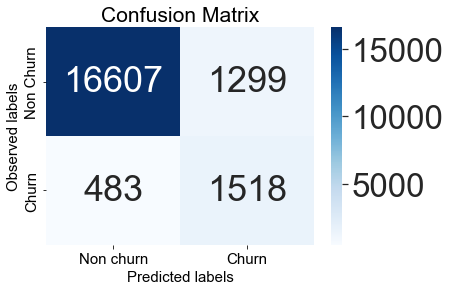

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17906
           1       0.54      0.76      0.63      2001

    accuracy                           0.91     19907
   macro avg       0.76      0.84      0.79     19907
weighted avg       0.93      0.91      0.92     19907



In [94]:
y_test_hat = lgbmOPtimal_W.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_test_hat)
F1_score = f1_score(y_test, y_test_hat)
Recall = recall_score(y_test, y_test_hat)
Precesion = precision_score(y_test, y_test_hat)
Roc_auc = roc_auc_score(y_test, y_test_hat)
print(f'LGBM Accuracy: {round(accuracy * 100, 2)}')
print(f'LGBM F1 score: {round(F1_score * 100, 2)}')
print(f'LGBM Recall: {round(Recall * 100 ,2)}')
print(f'LGBM Precesion: {round(Precesion * 100 ,2)}')
print(f'LGBM ROC_AUC: {round(Roc_auc,2)}')

cm = confusion_matrix(y_test, y_test_hat)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(['Non churn', 'Churn']);
ax.yaxis.set_ticklabels(['Non Churn', 'Churn']);
plt.savefig('Confusion_LightGBM.png')
plt.show()
print(classification_report(y_test, y_test_hat))

Finds feature importance

In [97]:
explainer_lightGBM = shap.TreeExplainer(lgbmOPtimal_W)
shap_values_lightGBM = explainer_lightGBM.shap_values(X_test_scaled)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


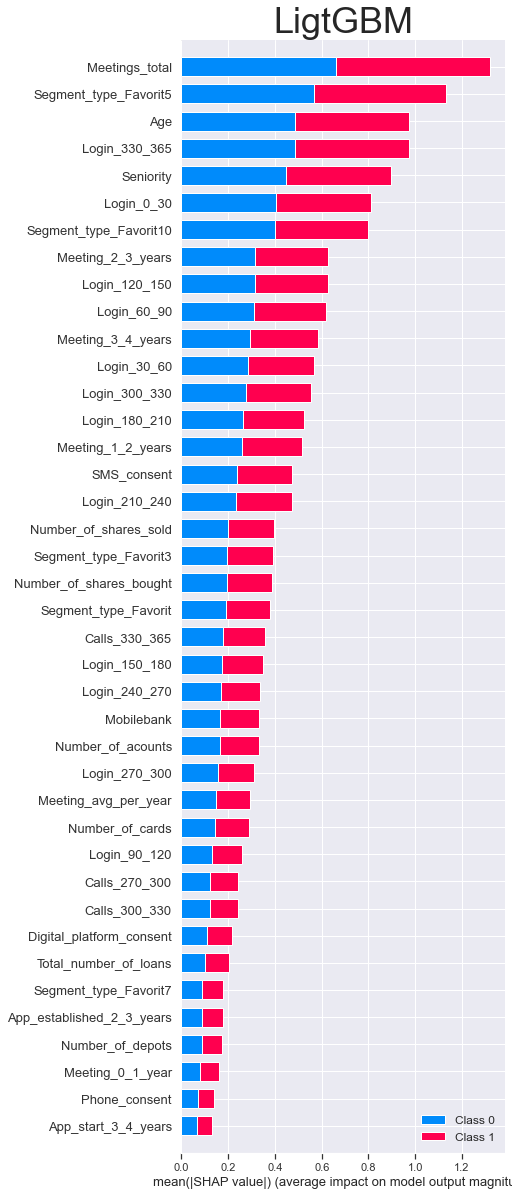

In [98]:
shap.summary_plot(shap_values_lightGBM, X_test.values, plot_type='bar', feature_names = X_test.columns, max_display = 40, show=False)
plt.title('LigtGBM')
plt.tight_layout()
plt.savefig('feature_LightGBM.png')
plt.show()

### CatBoost

Trains the model

In [99]:
from catboost import CatBoostClassifier
cat_optimal_w = CatBoostClassifier(iterations=1000,
                         learning_rate = 0.1,
                         depth = 9,
                         l2_leaf_reg = 9,
                         min_data_in_leaf = 1,
                         random_seed= 42,
                         scale_pos_weight=8,
                         eval_metric = 'AUC',
                         early_stopping_rounds = 100,
                         verbose = 500)

cat_optimal_w.fit(X_train_scaled, y_train)

0:	total: 220ms	remaining: 3m 39s
500:	total: 24s	remaining: 23.9s
999:	total: 46.7s	remaining: 0us


Evaluates the model

Cat Accuracy: 91.82
Cat F1 score: 64.82
Cat Recall: 74.96
Cat Precesion: 57.1
Cat ROC_AUC: 0.84


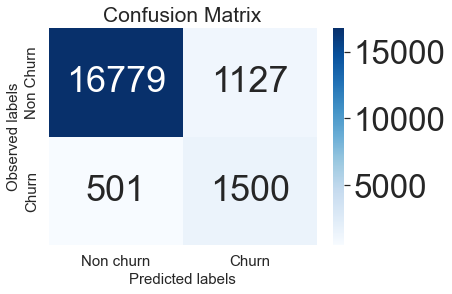

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     17906
           1       0.57      0.75      0.65      2001

    accuracy                           0.92     19907
   macro avg       0.77      0.84      0.80     19907
weighted avg       0.93      0.92      0.92     19907



In [100]:
y_test_hat = cat_optimal_w.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_hat)
F1_score = f1_score(y_test, y_test_hat)
Recall = recall_score(y_test, y_test_hat)
Precesion = precision_score(y_test, y_test_hat)
Roc_auc = roc_auc_score(y_test, y_test_hat)
print(f'Cat Accuracy: {round(accuracy * 100, 2)}')
print(f'Cat F1 score: {round(F1_score * 100 ,2)}')
print(f'Cat Recall: {round(Recall * 100 ,2)}')
print(f'Cat Precesion: {round(Precesion * 100 ,2)}')
print(f'Cat ROC_AUC: {round(Roc_auc,2)}')

cm = confusion_matrix(y_test, y_test_hat)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(['Non churn', 'Churn']);
ax.yaxis.set_ticklabels(['Non Churn', 'Churn']);
plt.savefig('Confusion_CatBoost.png')
plt.show()

print(classification_report(y_test, y_test_hat))

Finds the feature importance

In [101]:
explainer_catboodt = shap.TreeExplainer(cat_optimal_w)
shap_values_catboost = explainer_catboodt.shap_values(X_test_scaled)

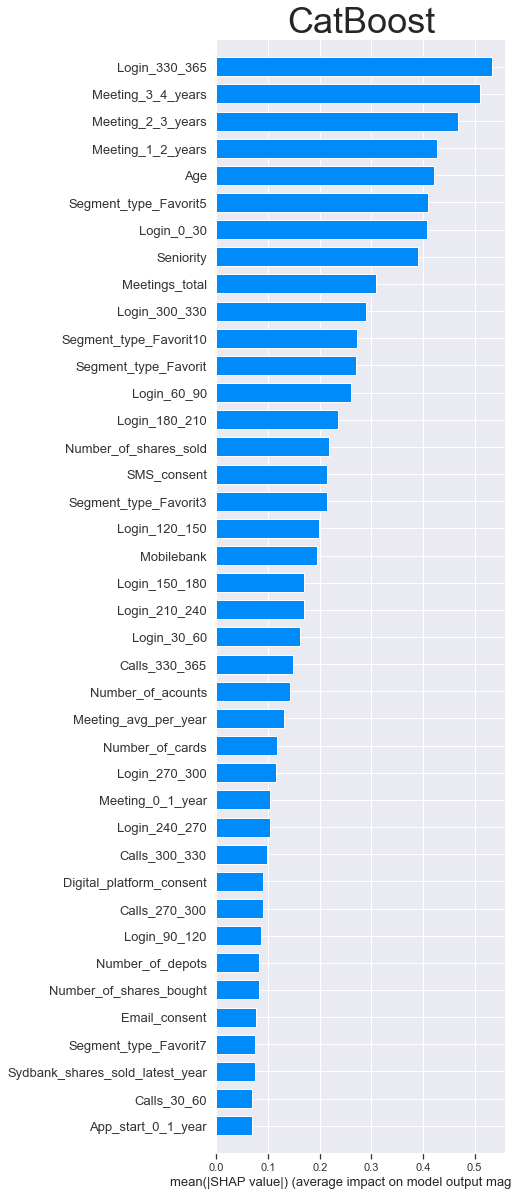

In [102]:
shap.summary_plot(shap_values_catboost, X_test.values, plot_type='bar', feature_names = X_test.columns, max_display = 40, show=False)
plt.title('CatBoost')
plt.tight_layout()
plt.savefig('feature_CatBoost.png')
plt.show()

### XGBoost

Trains the model

In [103]:
xgb_optimal_w = xgb.XGBClassifier(objective="binary:logistic",
    learning_rate = 0.05,
    n_estimators = 1000,
    gamma = 15,                              
    subsample = 0.5,
    max_depth = 15,
    colsample_bytree = 1,
    scale_pos_weight=8,
    eval_metric=["error"],
    random_state = 42)


xgb_optimal_w.fit(X_train_scaled, y_train,  
              eval_set=[(X_train_scaled, y_train), (X_val_scaled, y_val)],
              early_stopping_rounds = 100, verbose=0)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['error'], feature_types=None, gamma=15, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Evaluates the model

XGB Accuracy: 91.39
XGB F1 score: 63.97
XGB Recall: 76.01
XGB Precesion: 55.23
XGB ROC_AUC: 0.85


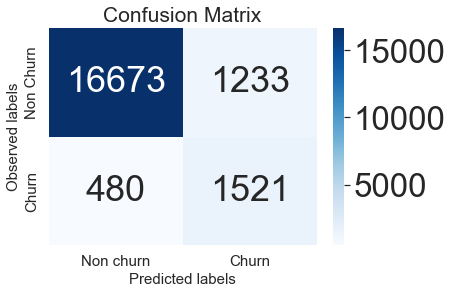

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17906
           1       0.55      0.76      0.64      2001

    accuracy                           0.91     19907
   macro avg       0.76      0.85      0.80     19907
weighted avg       0.93      0.91      0.92     19907



In [104]:
y_test_hat = xgb_optimal_w.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_hat)
F1_score = f1_score(y_test, y_test_hat)
Recall = recall_score(y_test, y_test_hat)
Precesion = precision_score(y_test, y_test_hat)
Roc_auc = roc_auc_score(y_test, y_test_hat)
print(f'XGB Accuracy: {round(accuracy * 100, 2)}')
print(f'XGB F1 score: {round(F1_score * 100 ,2)}')
print(f'XGB Recall: {round(Recall * 100 ,2)}')
print(f'XGB Precesion: {round(Precesion * 100 ,2)}')
print(f'XGB ROC_AUC: {round(Roc_auc,2)}')

cm = confusion_matrix(y_test, y_test_hat)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(['Non churn', 'Churn']);
ax.yaxis.set_ticklabels(['Non Churn', 'Churn']);
plt.savefig('Confusion_XGBoost.png')
plt.show()

print(classification_report(y_test, y_test_hat))

Finds feature importance

In [105]:
explainer_xgb = shap.TreeExplainer(xgb_optimal_w)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


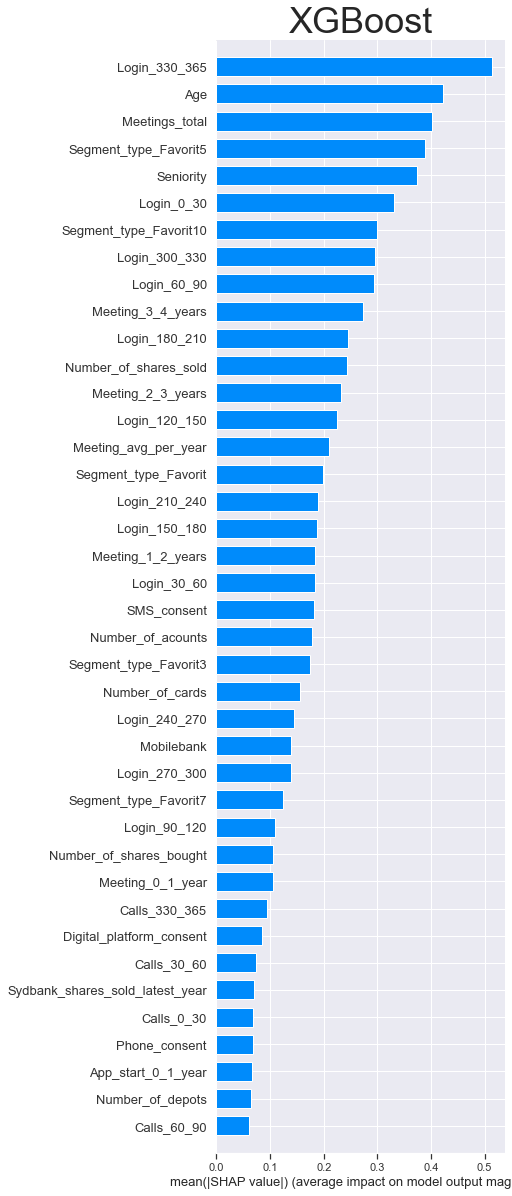

In [106]:
shap.summary_plot(shap_values_xgb,X_test.values, plot_type='bar', feature_names = X_test.columns, max_display = 40, show=False)
plt.title('XGBoost')
plt.tight_layout()
plt.savefig('feature_XGBoost.png')
plt.show()

## Compating evaluation normal and resampled

Comparison of evaluation of the optimal found weighted LightGBM with use of normal validation set and resampled

A resampled validation set is constructed

In [107]:
from imblearn.under_sampling import RandomUnderSampler

In [108]:
rus = RandomUnderSampler(sampling_strategy="not minority")

In [109]:
X_res, y_res = rus.fit_resample(X_val_scaled, y_val)

In [110]:
lgbmOPtimal_W = LGBMClassifier(
                learning_rate = 0.2,
                n_estimators=500,
                max_depth = 10,
                num_leaves = 50,
                scale_pos_weight = 8,
                random_state=42
                )

lgbmOPtimal_W.fit(X_train_scaled, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=10, n_estimators=500, num_leaves=50,
               random_state=42, scale_pos_weight=8)

Normal validation set

In [111]:
y_val_hat = lgbmOPtimal_W.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_val_hat)
F1_score = f1_score(y_val, y_val_hat)
Recall = recall_score(y_val, y_val_hat)
Precesion = precision_score(y_val, y_val_hat)
Roc_auc = roc_auc_score(y_val, y_val_hat)
print(f'LGBM Accuracy: {round(accuracy * 100, 2)}')
print(f'LGBM F1 score: {round(F1_score * 100, 2)}')
print(f'LGBM Recall: {round(Recall * 100 ,2)}')
print(f'LGBM Precesion: {round(Precesion * 100 ,2)}')
print(f'LGBM ROC_AUC: {round(Roc_auc,2)}')

print(classification_report(y_val, y_val_hat))

LGBM Accuracy: 91.09
LGBM F1 score: 63.47
LGBM Recall: 75.83
LGBM Precesion: 54.57
LGBM ROC_AUC: 0.84
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17733
           1       0.55      0.76      0.63      2015

    accuracy                           0.91     19748
   macro avg       0.76      0.84      0.79     19748
weighted avg       0.93      0.91      0.92     19748



Resampled validation set

In [112]:
y_res_hat = lgbmOPtimal_W.predict(X_res)

accuracy = accuracy_score(y_res, y_res_hat)
F1_score = f1_score(y_res, y_res_hat)
Recall = recall_score(y_res, y_res_hat)
Precesion = precision_score(y_res, y_res_hat)
Roc_auc = roc_auc_score(y_res, y_res_hat)
print(f'LGBM Accuracy: {round(accuracy * 100, 2)}')
print(f'LGBM F1 score: {round(F1_score * 100, 2)}')
print(f'LGBM Recall: {round(Recall * 100 ,2)}')
print(f'LGBM Precesion: {round(Precesion * 100 ,2)}')
print(f'LGBM ROC_AUC: {round(Roc_auc,2)}')

print(classification_report(y_res, y_res_hat))

LGBM Accuracy: 85.04
LGBM F1 score: 83.52
LGBM Recall: 75.83
LGBM Precesion: 92.94
LGBM ROC_AUC: 0.85
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2015
           1       0.93      0.76      0.84      2015

    accuracy                           0.85      4030
   macro avg       0.86      0.85      0.85      4030
weighted avg       0.86      0.85      0.85      4030



## Insights of the model with the use of SHAP

SHap values are used and plotted in different type of plots to obtain insights of the model

In [113]:
explainer = shap.TreeExplainer(lgbmOPtimal_W)
shap_values = explainer.shap_values(X_test_scaled)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


### Summaryplot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


<function matplotlib.pyplot.show(close=None, block=None)>

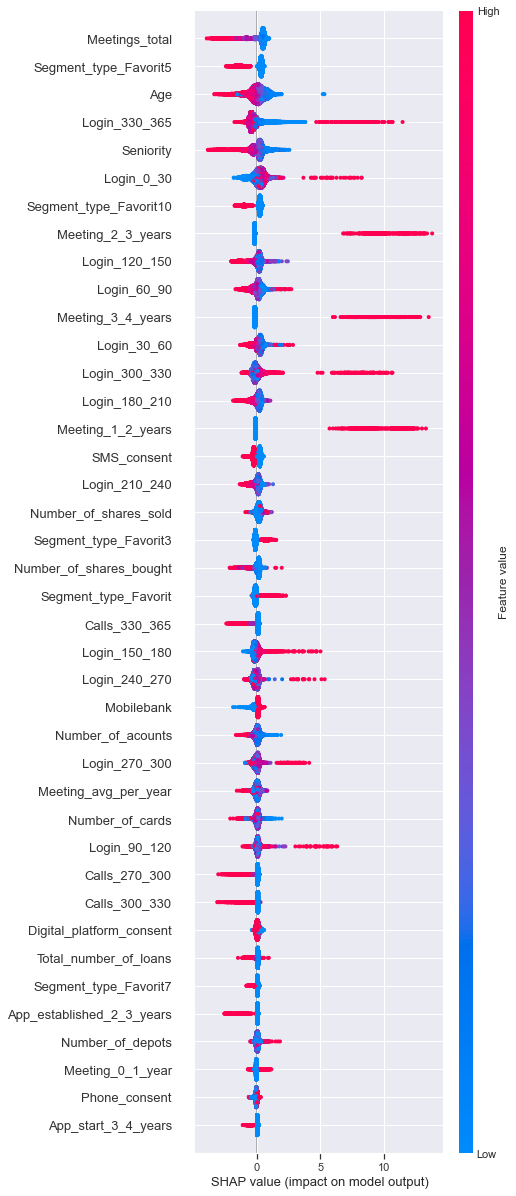

In [114]:
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, max_display = 40,show=False)
plt.savefig('summary_LightGBM.png')
plt.show

### Dependence plot

Dependence plot logins

<function matplotlib.pyplot.show(close=None, block=None)>

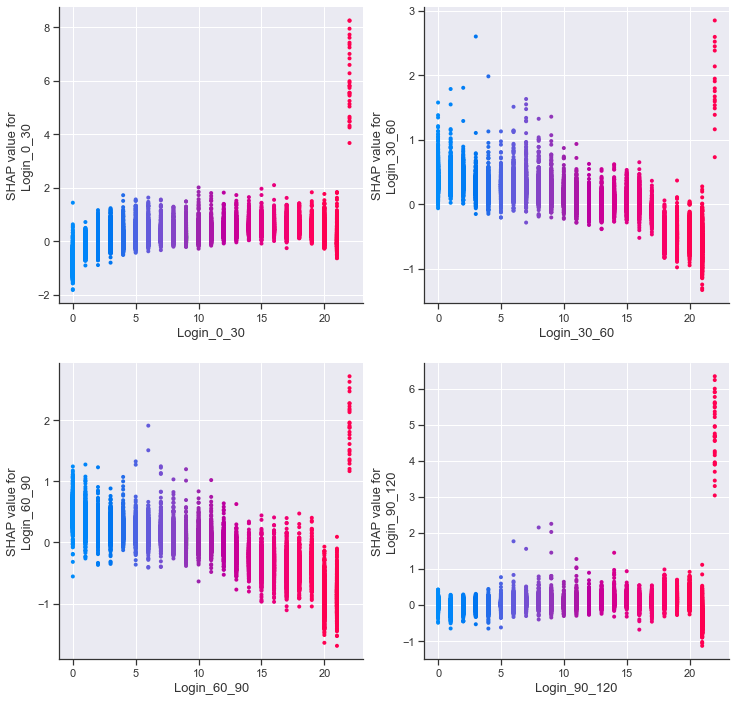

In [115]:
fig, axes = plt.subplots(nrows=2, ncols =2, figsize=(12,12))
shap.dependence_plot('Login_0_30', shap_values[1], X_test.values, feature_names = X_test.columns, interaction_index="Login_0_30", ax=axes[0,0], show=False)
shap.dependence_plot('Login_30_60', shap_values[1], X_test.values, feature_names = X_test.columns, interaction_index="Login_30_60", ax=axes[0,1], show=False)
shap.dependence_plot('Login_60_90', shap_values[1], X_test.values, feature_names = X_test.columns, interaction_index="Login_60_90", ax=axes[1,0], show=False)
shap.dependence_plot('Login_90_120', shap_values[1], X_test.values, feature_names = X_test.columns, interaction_index="Login_90_120", ax=axes[1,1], show=False)
plt.savefig('dependence_login.png')
plt.show

Dependence plot meeting recent years

<function matplotlib.pyplot.show(close=None, block=None)>

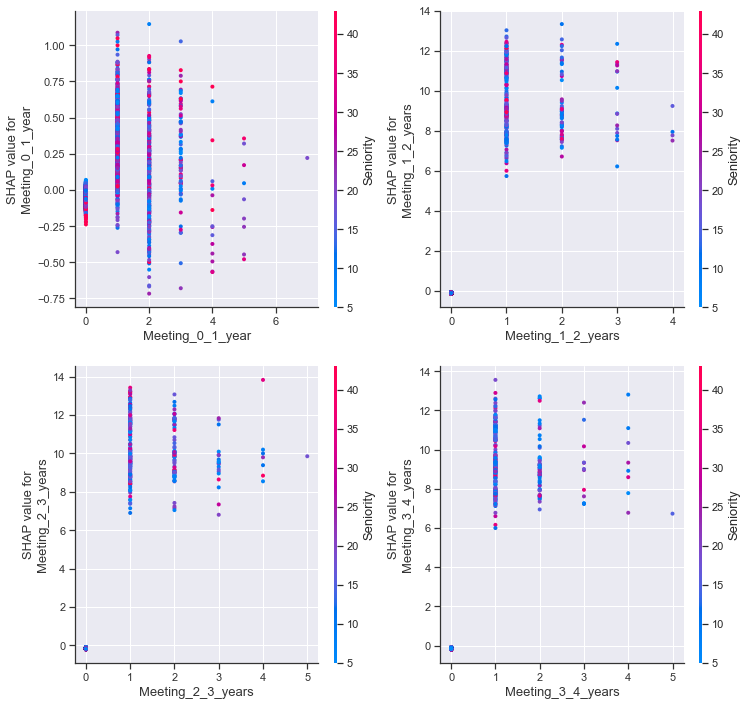

In [116]:
fig, axes = plt.subplots(nrows=2, ncols =2, figsize=(12,12))
shap.dependence_plot('Meeting_0_1_year', shap_values[1], X_test, interaction_index="Seniority", ax=axes[0,0], show=False)
shap.dependence_plot('Meeting_1_2_years', shap_values[1], X_test, interaction_index="Seniority", ax=axes[0,1], show=False)
shap.dependence_plot('Meeting_2_3_years', shap_values[1], X_test, interaction_index="Seniority", ax=axes[1,0], show=False)
shap.dependence_plot('Meeting_3_4_years', shap_values[1], X_test, interaction_index="Seniority", ax=axes[1,1], show=False)
plt.savefig('dependence_meeting.png')
plt.show

Dependence plot Applications established recent years

<function matplotlib.pyplot.show(close=None, block=None)>

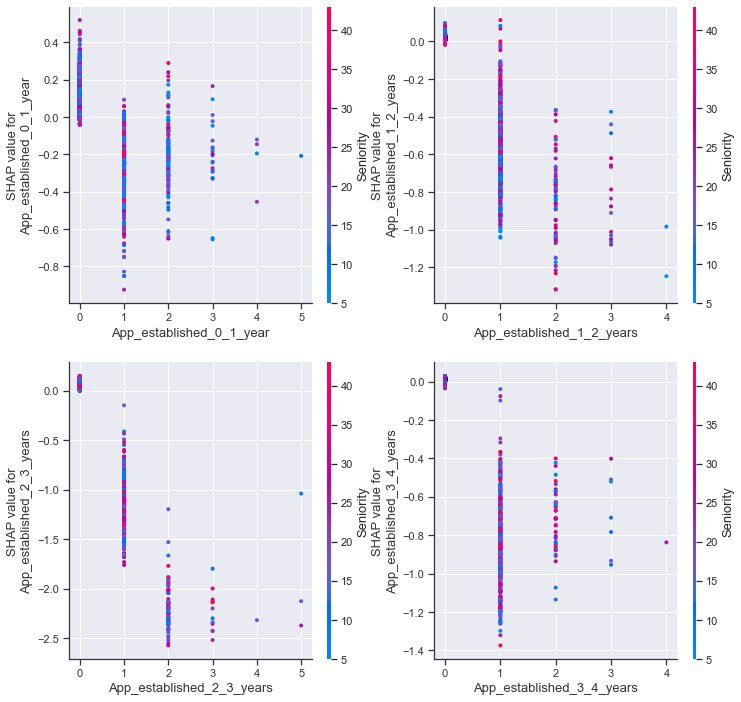

In [117]:
fig, axes = plt.subplots(nrows=2, ncols =2, figsize=(12,12))
shap.dependence_plot('App_established_0_1_year', shap_values[1], X_test, interaction_index="Seniority", ax=axes[0,0], show=False)
shap.dependence_plot('App_established_1_2_years', shap_values[1], X_test, interaction_index="Seniority", ax=axes[0,1], show=False)
shap.dependence_plot('App_established_2_3_years', shap_values[1], X_test, interaction_index="Seniority", ax=axes[1,0], show=False)
shap.dependence_plot('App_established_3_4_years', shap_values[1], X_test, interaction_index="Seniority", ax=axes[1,1], show=False)
plt.savefig('dependence_loan_app.png')
plt.show

Dependence plot total number of loans

<function matplotlib.pyplot.show(close=None, block=None)>

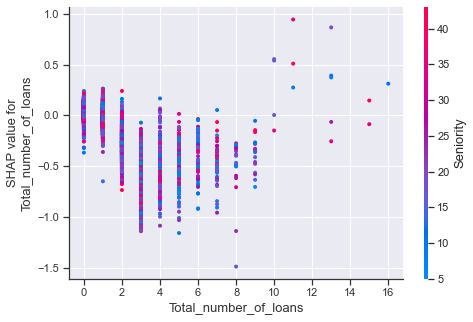

In [118]:
shap.dependence_plot('Total_number_of_loans', shap_values[1], X_test, interaction_index="Seniority", show=False)
plt.savefig('dependence_total_loans.png')
plt.show

Dependence plot total number of meetings

<function matplotlib.pyplot.show(close=None, block=None)>

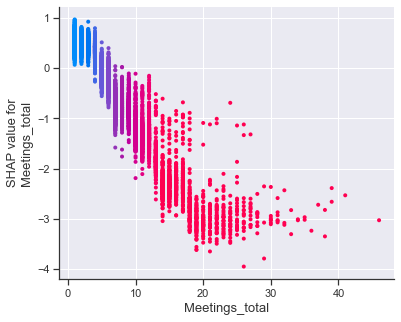

In [119]:
shap.dependence_plot('Meetings_total', shap_values[1], X_test, interaction_index="Meetings_total", show=False)
plt.savefig('dependence_meetings_total.png')
plt.show

Dependence plots Segments

<function matplotlib.pyplot.show(close=None, block=None)>

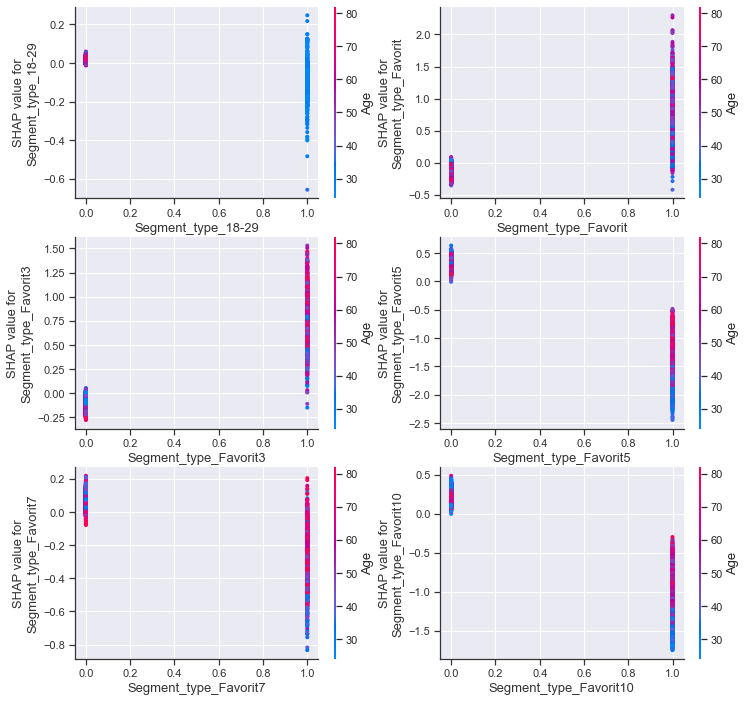

In [120]:
fig, axes = plt.subplots(nrows=3, ncols =2, figsize=(12,12))
shap.dependence_plot('Segment_type_18-29', shap_values[1], X_test, interaction_index="Age", ax=axes[0,0], show=False)
shap.dependence_plot('Segment_type_Favorit', shap_values[1], X_test, interaction_index="Age", ax=axes[0,1], show=False)
shap.dependence_plot('Segment_type_Favorit3', shap_values[1], X_test, interaction_index="Age", ax=axes[1,0], show=False)
shap.dependence_plot('Segment_type_Favorit5', shap_values[1], X_test, interaction_index="Age", ax=axes[1,1], show=False)
shap.dependence_plot('Segment_type_Favorit7', shap_values[1], X_test, interaction_index="Age", ax=axes[2,0], show=False)
shap.dependence_plot('Segment_type_Favorit10', shap_values[1], X_test, interaction_index="Age", ax=axes[2,1], show=False)
plt.savefig('dependence_segment.png')
plt.show

Dependence plot age

<function matplotlib.pyplot.show(close=None, block=None)>

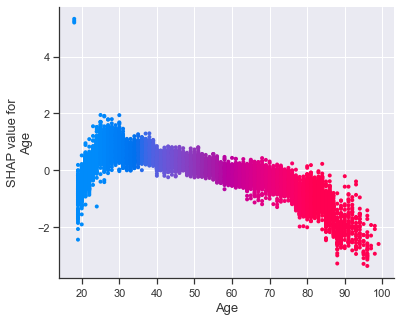

In [121]:
shap.dependence_plot('Age', shap_values[1], X_test, interaction_index="Age", show=False)
plt.savefig('dependence_age.png')
plt.show

Dependece plot seniority

<function matplotlib.pyplot.show(close=None, block=None)>

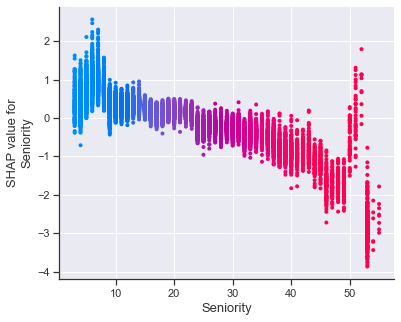

In [122]:
shap.dependence_plot('Seniority', shap_values[1], X_test, interaction_index="Seniority", show=False)
plt.savefig('dependence_Seniority.png')
plt.show

### Indivdual predictions with decision plot

To choose the predictions to use, the probabilitys for each prediction is found and used with the labels of the predictions

In [123]:
df_probs = X_test
y_test_prob = lgbmOPtimal_W.predict_proba(X_test_scaled)
y_test_labels = lgbmOPtimal_W.predict(X_test_scaled)

df_probs['Probabilitys'] = y_test_prob[:,1]
df_probs['Labels'] = y_test_labels
df_probs['Actual labels'] = y_test
df_probs = df_probs.reset_index(drop=True)

In [124]:
X_test = X_test.drop(['Probabilitys','Labels','Actual labels'], axis = 1)

Predictions with highest probability for churn

The predictions are found

In [125]:
df_highest_porbs = df_probs.nlargest(20,'Probabilitys')
df_highest_porbs.head(20)

Age  Seniority  Number_of_acounts  ...  Probabilitys  Labels  Actual labels
12303   26       15.0                  7  ...           1.0       1              1
7643    48        8.0                 11  ...           1.0       1              1
8585    60       44.0                 12  ...           1.0       1              1
9175    60       23.0                 23  ...           1.0       1              1
15158   54       12.0                  2  ...           1.0       1              1
4763    57       27.0                  5  ...           1.0       1              1
4146    79       20.0                  7  ...           1.0       1              1
8130    57       12.0                  6  ...           1.0       1              1
1577    57        9.0                 41  ...           1.0       1              1
17224   50       15.0                  4  ...           1.0       1              1
2638    29       29.0                  2  ...           1.0       1              1
7941    29       19.0                 12  ...           1.0       1              1
13006   49       21.0                 15  ...           1.0       1              1
15816   35       11.0                  7  ...           1.0       1              1
15227   67        8.0                  8  ...           1.0       1              1
3523    33       33.0                 13  ...           1.0       1              1
12397   57        9.0                 11  ...           1.0       1              1
15818   87       35.0                  6  ...           1.0       1              1
11801   49       19.0                  6  ...           1.0       1              1
5231    45       19.0                  6  ...           1.0       1              1

[20 rows x 81 columns]

The observations are plotted

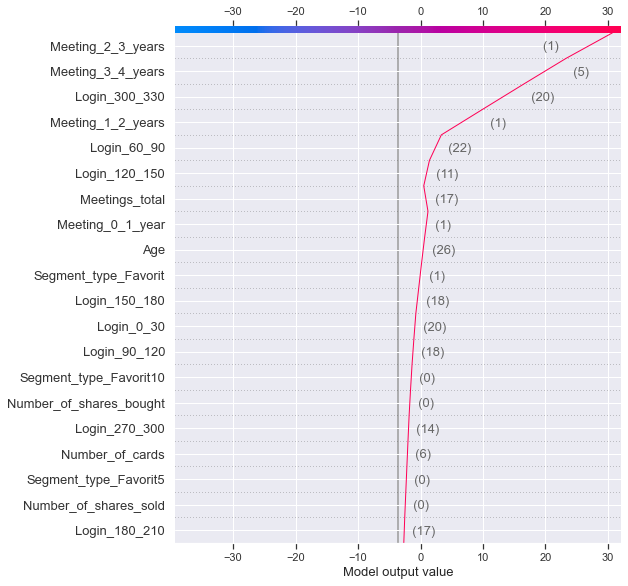

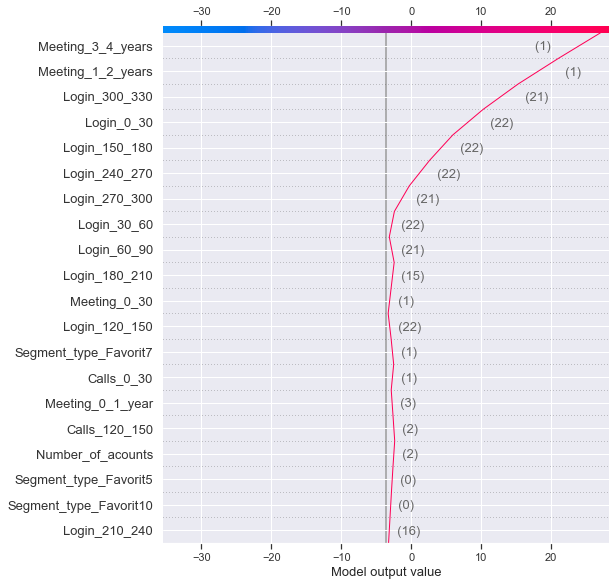

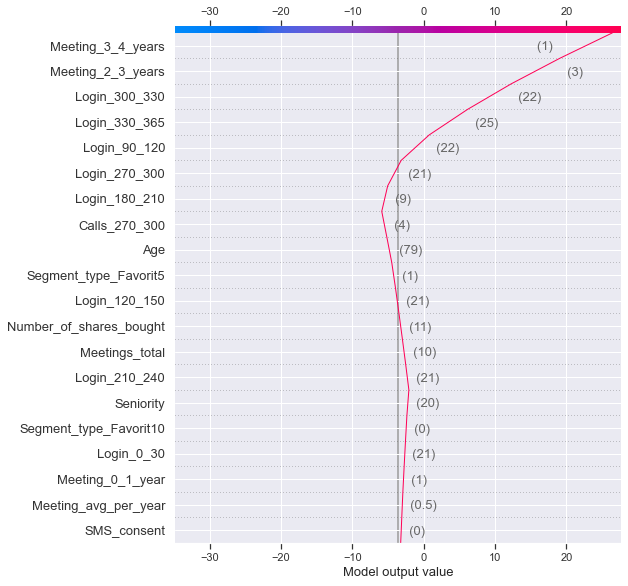

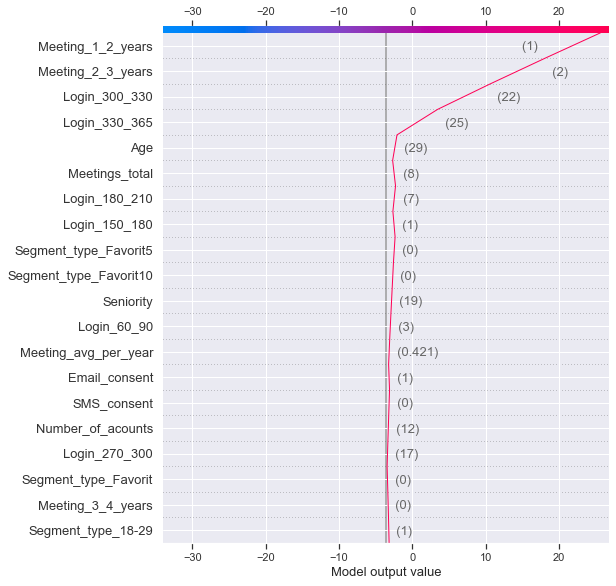

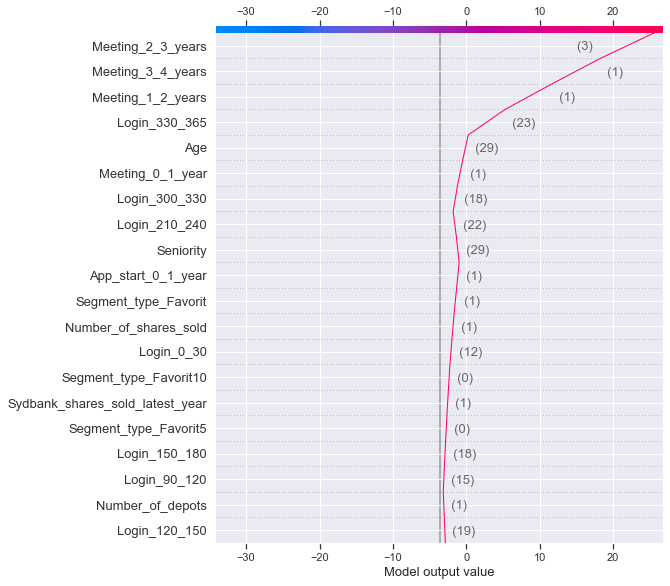

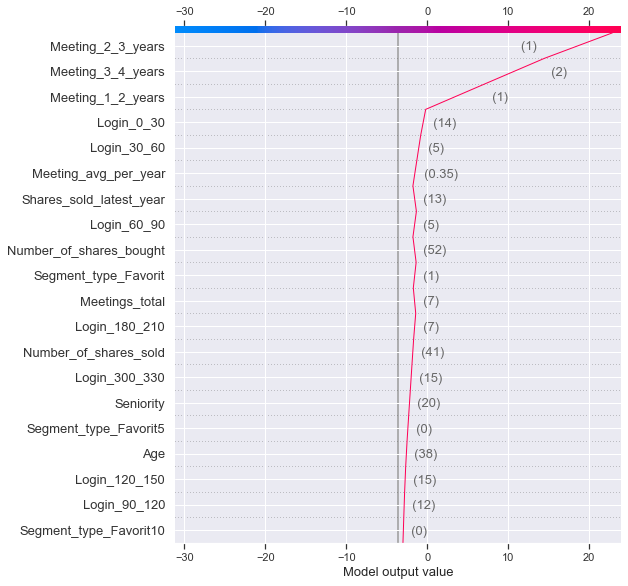

In [126]:
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][12303,:], X_test.iloc[12303,:], show = False)
plt.savefig('decision_high_prob_1.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][15158,:], X_test.iloc[15158,:], show = False)
plt.savefig('decision_high_prob_2.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][4146,:], X_test.iloc[4146,:], show=False)
plt.savefig('decision_high_prob_3.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][7941,:], X_test.iloc[7941,:], show=False)
plt.savefig('decision_high_prob_4.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][2638,:], X_test.iloc[2638,:], show=False)
plt.savefig('decision_high_prob_5.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][10893,:], X_test.iloc[10893,:], show=False)
plt.savefig('decision_high_prob_6.png')
plt.show()

Observations with lowest probability for churn

The observations are found

In [127]:
df_lowest_porbs = df_probs.nsmallest(20,'Probabilitys')
df_lowest_porbs.head(20)

Age  Seniority  Number_of_acounts  ...  Probabilitys  Labels  Actual labels
10194   36       25.0                 53  ...  2.231330e-10       0              0
14523   55       35.0                 38  ...  7.328756e-10       0              0
2425    78       36.0                 48  ...  2.088336e-09       0              0
1442    50       14.0                 32  ...  4.946341e-09       0              0
7975    70       26.0                 17  ...  5.474464e-09       0              0
16088   76       42.0                 22  ...  5.749608e-09       0              0
18185   54       17.0                 50  ...  6.343293e-09       0              0
950     50        9.0                 22  ...  1.059244e-08       0              0
13964   72       47.0                 21  ...  1.560010e-08       0              0
19379   66       44.0                 18  ...  2.001290e-08       0              0
19015   47       26.0                 12  ...  2.067049e-08       0              0
11521   63       21.0                 26  ...  2.218727e-08       0              0
16043   67       15.0                 16  ...  2.277740e-08       0              0
12554   59       37.0                 27  ...  2.448280e-08       0              0
3552    80       47.0                 13  ...  2.498527e-08       0              0
16869   74       46.0                 31  ...  2.818755e-08       0              0
7058    57       14.0                 14  ...  2.839489e-08       0              0
18649   54       26.0                 52  ...  2.853073e-08       0              0
10513   63       18.0                 18  ...  2.934397e-08       0              0
359     73       47.0                 21  ...  3.087929e-08       0              0

[20 rows x 81 columns]

The observations are found

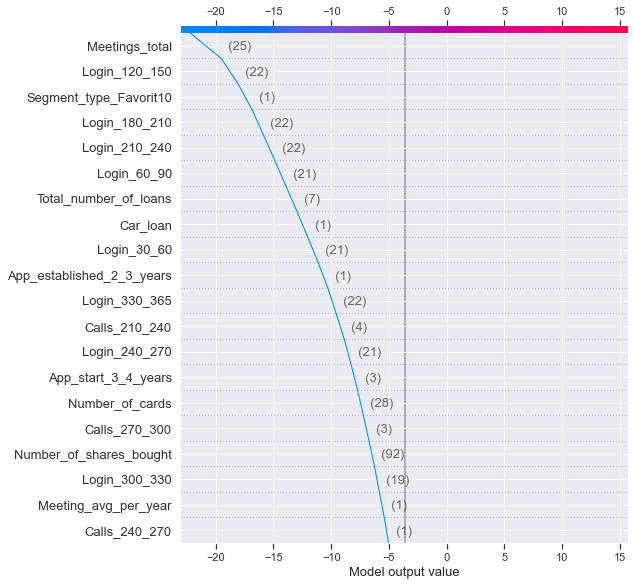

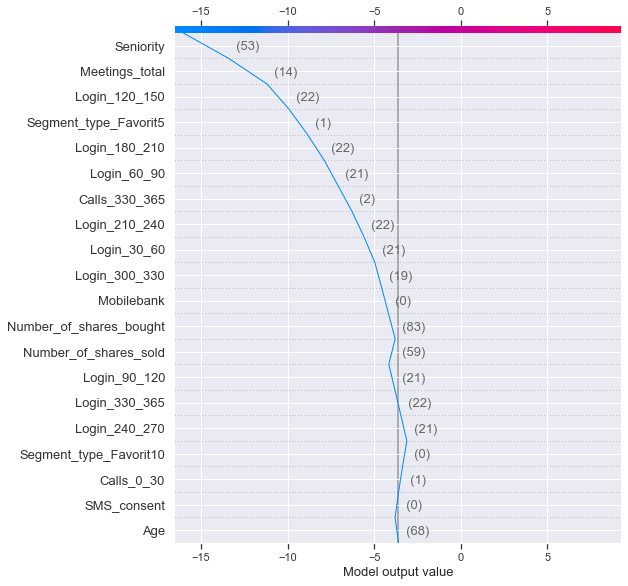

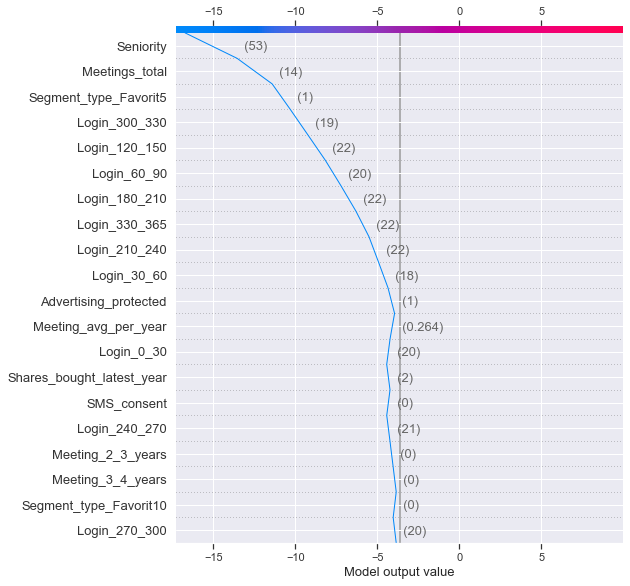

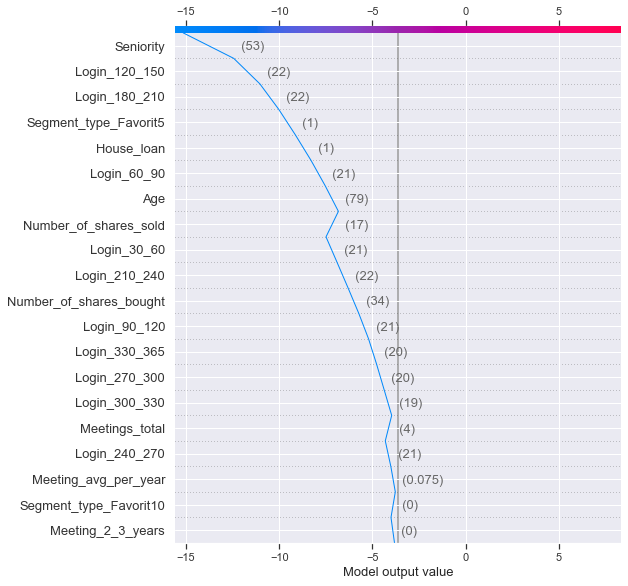

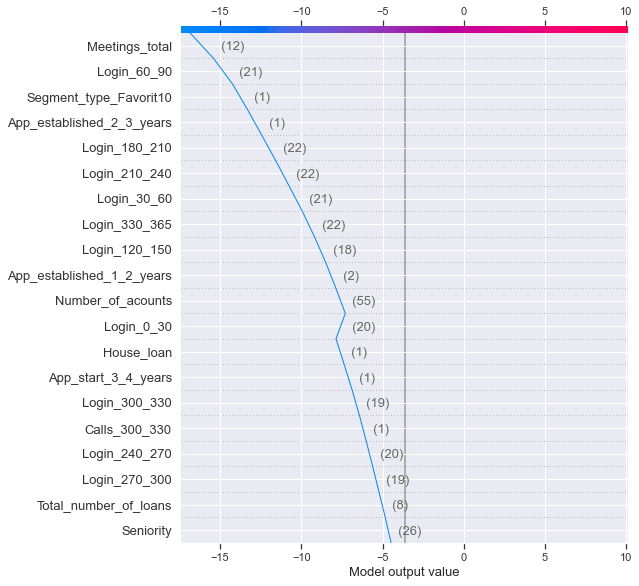

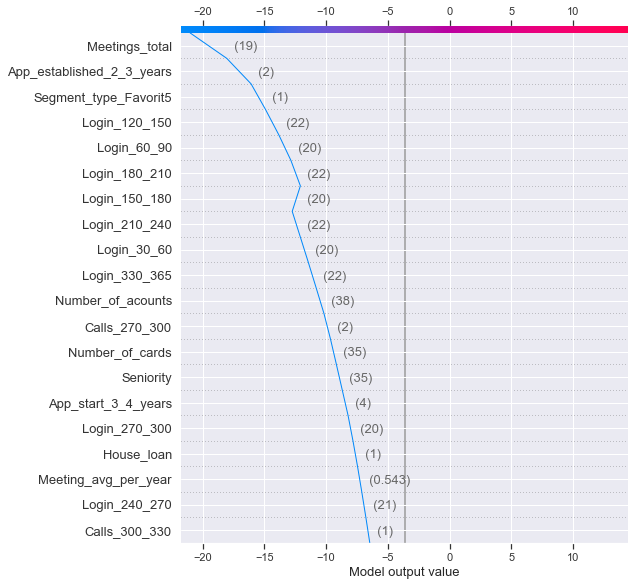

In [128]:
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][10194,:], X_test.iloc[10194,:], show = False)
plt.savefig('decision_low_prob_1.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][19160,:], X_test.iloc[19160,:], show = False)
plt.savefig('decision_low_prob_2.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][9534,:], X_test.iloc[9534,:], show=False)
plt.savefig('decision_low_prob_3.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][17850,:], X_test.iloc[17850,:], show=False)
plt.savefig('decision_low_prob_4.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][4002,:], X_test.iloc[4002,:], show=False)
plt.savefig('decision_low_prob_5.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][14523,:], X_test.iloc[14523,:], show=False)
plt.savefig('decision_low_prob_6.png')
plt.show()

Young observations with high and low probability for churn

The observations are found

In [129]:
High_none = df_probs[df_probs['Age'] > 25]
High_none = High_none[High_none['Age'] < 34]
High_none = High_none[High_none['Actual labels'] == 1]
High_none = High_none.nlargest(15,'Probabilitys')
High_none.head(15)

Age  Seniority  Number_of_acounts  ...  Probabilitys  Labels  Actual labels
12303   26       15.0                  7  ...           1.0       1              1
2638    29       29.0                  2  ...           1.0       1              1
7941    29       19.0                 12  ...           1.0       1              1
3523    33       33.0                 13  ...           1.0       1              1
6490    30        5.0                  2  ...           1.0       1              1
4749    28       18.0                 17  ...           1.0       1              1
18368   31       26.0                  6  ...           1.0       1              1
8105    31       31.0                 20  ...           1.0       1              1
17363   33       20.0                 10  ...           1.0       1              1
11375   33        8.0                  5  ...           1.0       1              1
18321   32        7.0                 28  ...           1.0       1              1
14608   32       11.0                 16  ...           1.0       1              1
2759    30       23.0                 18  ...           1.0       1              1
7666    28       28.0                 17  ...           1.0       1              1
8036    32        4.0                  2  ...           1.0       1              1

[15 rows x 81 columns]

In [130]:
High_none = df_probs[df_probs['Age'] > 25]
High_none = High_none[High_none['Age'] < 34]
High_none = High_none[High_none['Actual labels'] == 0]
High_none = High_none.nsmallest(10,'Probabilitys')
High_none.head(10)

Age  Seniority  Number_of_acounts  ...  Probabilitys  Labels  Actual labels
18924   33       20.0                 29  ...  1.411604e-07       0              0
17425   33       33.0                 13  ...  2.149520e-07       0              0
5832    32       31.0                 47  ...  2.386891e-07       0              0
5103    31       20.0                 19  ...  7.058414e-07       0              0
12006   32       19.0                 21  ...  8.342427e-07       0              0
10599   32       16.0                 13  ...  2.003469e-06       0              0
3295    32       15.0                 38  ...  2.276490e-06       0              0
9039    29       28.0                 11  ...  2.860569e-06       0              0
6799    30       30.0                 12  ...  3.304796e-06       0              0
10268   31       31.0                 17  ...  3.630657e-06       0              0

[10 rows x 81 columns]

The observations are plotted

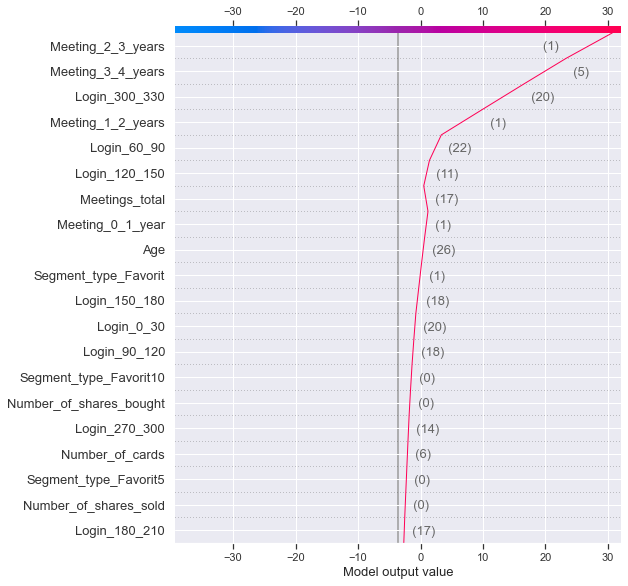

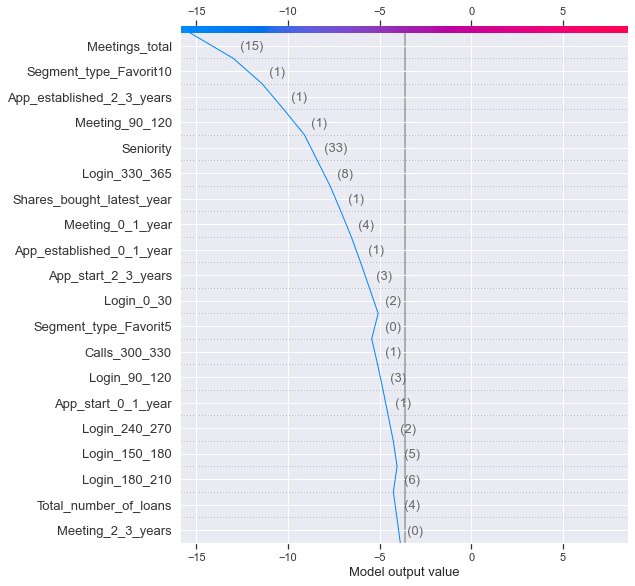

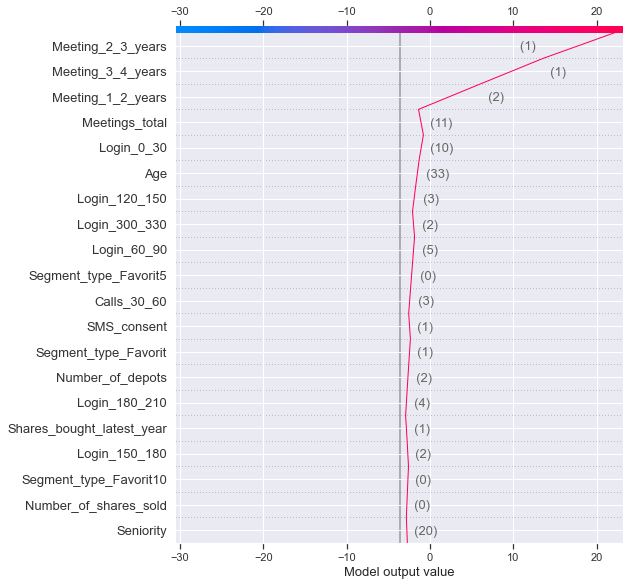

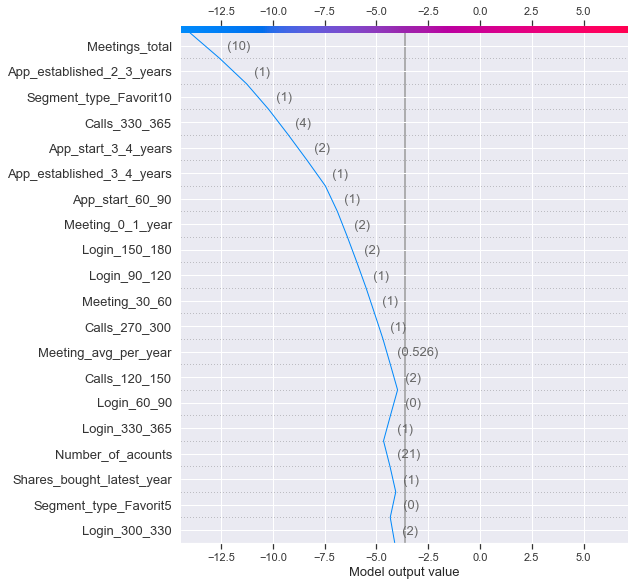

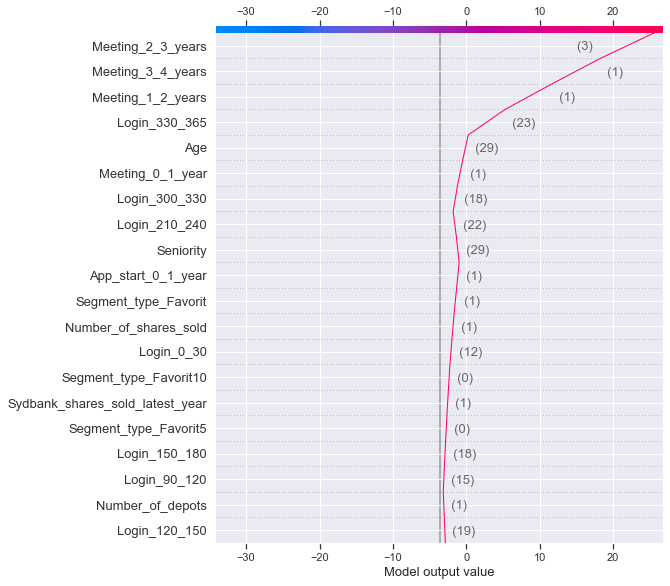

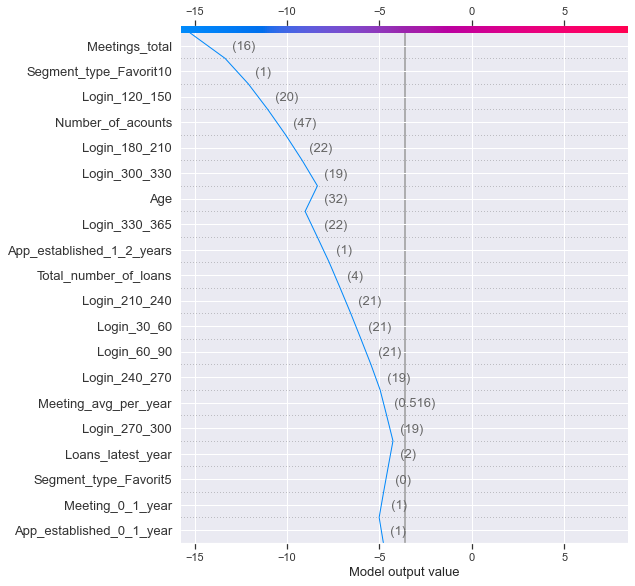

In [131]:
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][12303,:], X_test.iloc[12303,:], show = False)
plt.savefig('decision_testb_1.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][17425,:], X_test.iloc[17425,:], show = False)
plt.savefig('decision_testb_2.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][17363,:], X_test.iloc[17363,:], show=False)
plt.savefig('decision_testb_3.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][12006,:], X_test.iloc[12006,:], show=False)
plt.savefig('decision_testb_4.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][2638,:], X_test.iloc[2638,:], show=False)
plt.savefig('decision_testb_5.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][5832,:], X_test.iloc[5832,:], show=False)
plt.savefig('decision_testb_6.png')
plt.show()

Observations with probabilitys around the threshold for being both classes

The observations are found

In [132]:
High_none = df_probs[df_probs['Probabilitys'] < 0.55]
High_none = High_none[High_none['Probabilitys'] > 0.50]
High_none = High_none.nsmallest(10,'Probabilitys')
High_none.head(10)

Age  Seniority  Number_of_acounts  ...  Probabilitys  Labels  Actual labels
9957    39       15.0                  4  ...      0.500335       1              0
11524   55       21.0                  3  ...      0.500361       1              0
15635   71       36.0                  3  ...      0.500410       1              0
18349   27       25.0                  7  ...      0.500695       1              0
4955    67       17.0                  5  ...      0.501097       1              0
10995   50       31.0                  7  ...      0.501295       1              1
7311    30       30.0                  7  ...      0.501414       1              0
18424   45       12.0                  6  ...      0.501701       1              0
12684   81        7.0                  4  ...      0.501725       1              0
18418   69       21.0                  6  ...      0.501992       1              0

[10 rows x 81 columns]

In [133]:
High_none = df_probs[df_probs['Probabilitys'] > 0.45]
High_none = High_none[High_none['Probabilitys'] < 0.50]
High_none = High_none.nlargest(15,'Probabilitys')
High_none.head(15)

Age  Seniority  Number_of_acounts  ...  Probabilitys  Labels  Actual labels
6355    33       12.0                  3  ...      0.499905       0              0
6254    72       20.0                  8  ...      0.499881       0              0
18089   37       32.0                 13  ...      0.499732       0              0
2145    55       12.0                  2  ...      0.499530       0              0
6371    42        4.0                  6  ...      0.499452       0              0
19571   52       20.0                  9  ...      0.499378       0              0
14602   69       26.0                  3  ...      0.499232       0              0
11331   70       16.0                  1  ...      0.499080       0              0
15553   26       13.0                  6  ...      0.498769       0              0
14593   60       11.0                  5  ...      0.498548       0              0
484     25       18.0                 10  ...      0.498523       0              0
3937    44       13.0                 10  ...      0.498393       0              0
3105    32       12.0                  5  ...      0.498385       0              0
5960    27       27.0                 10  ...      0.497780       0              0
18859   59       17.0                  1  ...      0.497745       0              0

[15 rows x 81 columns]

The observations are plotted

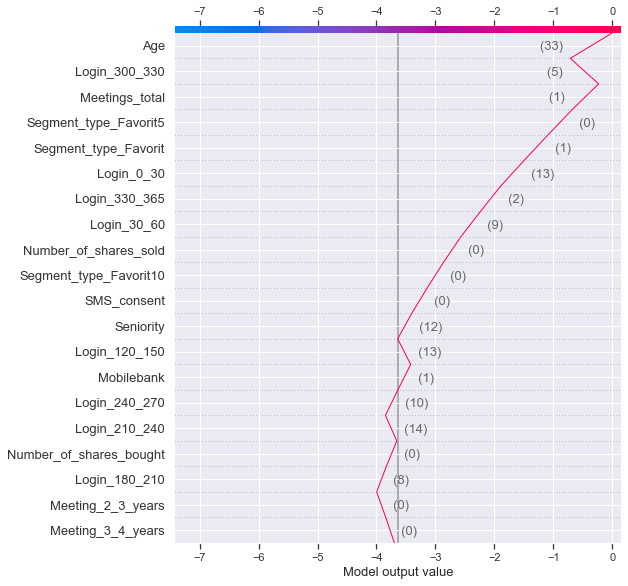

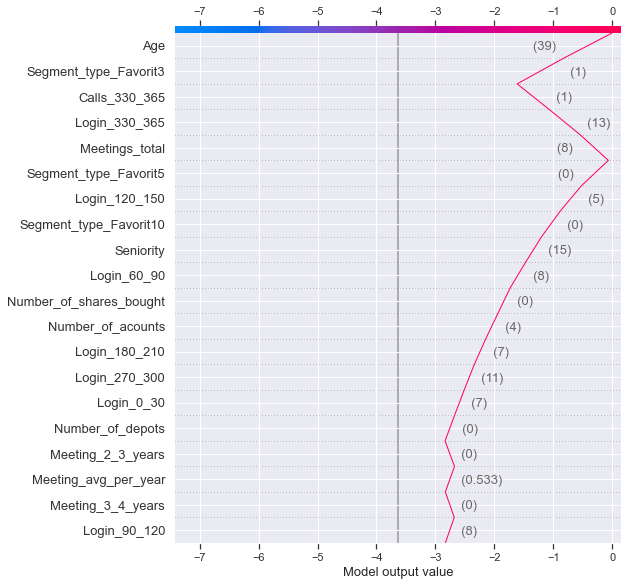

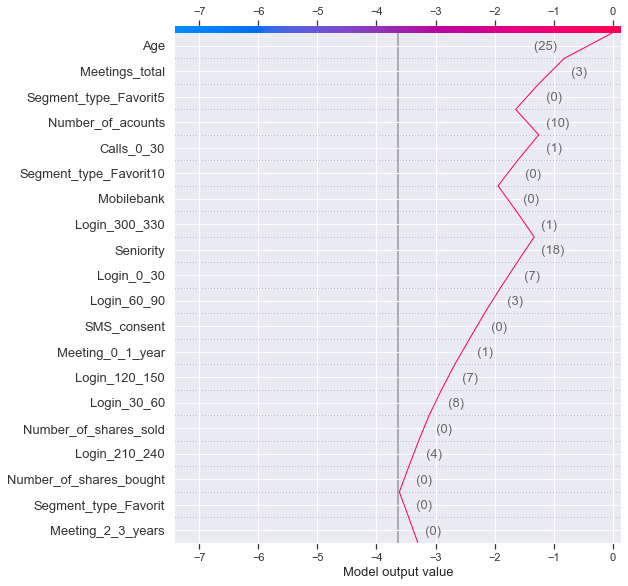

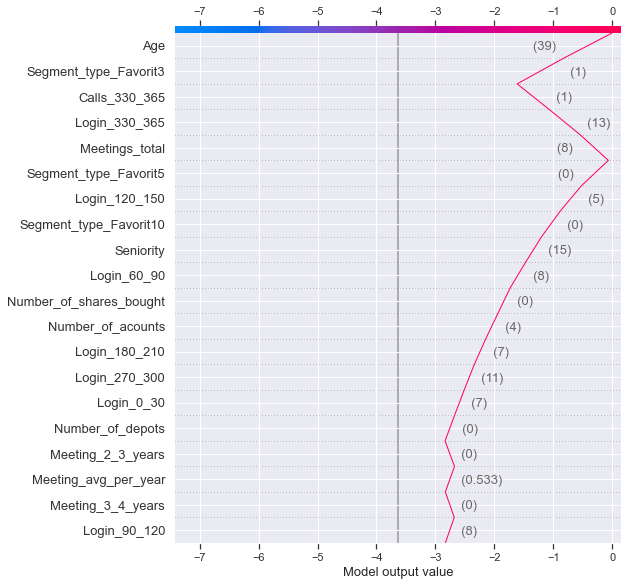

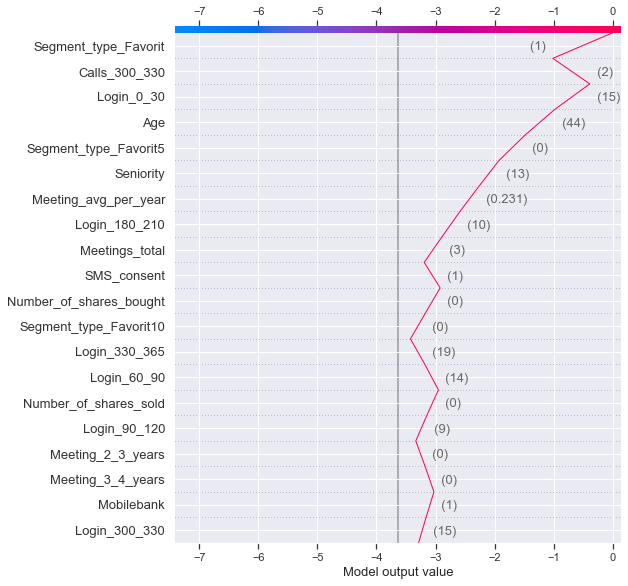

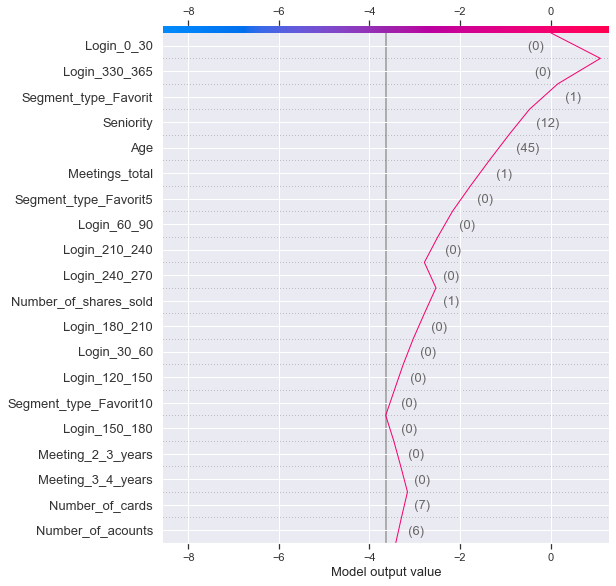

In [134]:
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][6355,:], X_test.iloc[6355,:], show = False)
plt.savefig('decision_mid_prob_1.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][9957,:], X_test.iloc[9957,:], show = False)
plt.savefig('decision_mid_prob_2.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][484,:], X_test.iloc[484,:], show=False)
plt.savefig('decision_mid_prob_3.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][9957,:], X_test.iloc[9957,:], show=False)
plt.savefig('decision_mid_prob_4.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][3937,:], X_test.iloc[3937,:], show=False)
plt.savefig('decision_mid_prob_5.png')
plt.show()
plt.figure(figsize=(5,5))
shap.decision_plot(explainer.expected_value[1], shap_values[1][18424,:], X_test.iloc[18424,:], show=False)
plt.savefig('decision_mid_prob_6.png')
plt.show()

## Uplifting

For the uplifitng the data has to be adjusted, first the test set has to be split into a control and treatment group

In [135]:
Treatment, Control, y_Treatment, y_Control = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Some features of the control has to be ajusted such that the treatment is applied for them

In [136]:
Treatment['App_established_0_1_year'] = Treatment['App_established_0_1_year'] +1
Treatment['App_start_0_1_year'] = Treatment['App_established_0_1_year'] +1
Treatment['App_granted_0_1_year'] = Treatment['App_established_0_1_year'] +1
Treatment['Total_number_of_loans'] = Treatment['Total_number_of_loans'] +1
Treatment['Loans_latest_year'] = Treatment['Loans_latest_year'] +1

The data for the groups are scaled

In [137]:
X_Treatment_scaled = StandardScaler().fit_transform(Treatment)
X_Control_scaled = StandardScaler().fit_transform(Control)

Probailities and and labels are found for the groups and assigned to dataframes for each group

In [138]:
df_Treatment = Treatment
df_control = Control
Treatment_prob = lgbmOPtimal_W.predict_proba(X_Treatment_scaled)
Treatmenr_labels = lgbmOPtimal_W.predict(X_Treatment_scaled)
Control_prob = lgbmOPtimal_W.predict_proba(X_Control_scaled)
Control_labels = lgbmOPtimal_W.predict(X_Control_scaled)

Treamtent_prob_non_churn = Treatment_prob[:,0]
Control_prob_non_churn = Control_prob[:,0]

df_Treatment['Probabilitys'] = Treamtent_prob_non_churn
df_Treatment['Label'] = Treatmenr_labels
df_Treatment['Actual label'] = y_Treatment
df_control['Probabilitys'] = Control_prob_non_churn
df_control['Label'] = Control_labels
df_control['Actual label'] = y_Control

### Uplift calculation

The uplift is found be subtracting the probaiblity for retention for the treatment group from the probability form retention form the control group

In [139]:
Uplift = np.mean(Treamtent_prob_non_churn) - np.mean(Control_prob_non_churn)
print('Uplift: {0}%'.format(np.round(Uplift*100,2)))

Uplift: 0.62%


### Reactions for the two groups

The labels both actual and predicted are assigned to each prediction, such that information regarding persuadables can be otained

In [140]:
Treatment_responders = df_Treatment[df_Treatment['Label'] == 0]
Treatment_responders_churners = Treatment_responders[Treatment_responders['Actual label'] == 1]
Treatment_non_responders = df_Treatment[df_Treatment['Label'] == 1]
Treatment_non_responders_churners = Treatment_non_responders[Treatment_non_responders['Actual label'] == 1]

Age and seniority distrubution for the treatment responders are plotted


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show(close=None, block=None)>

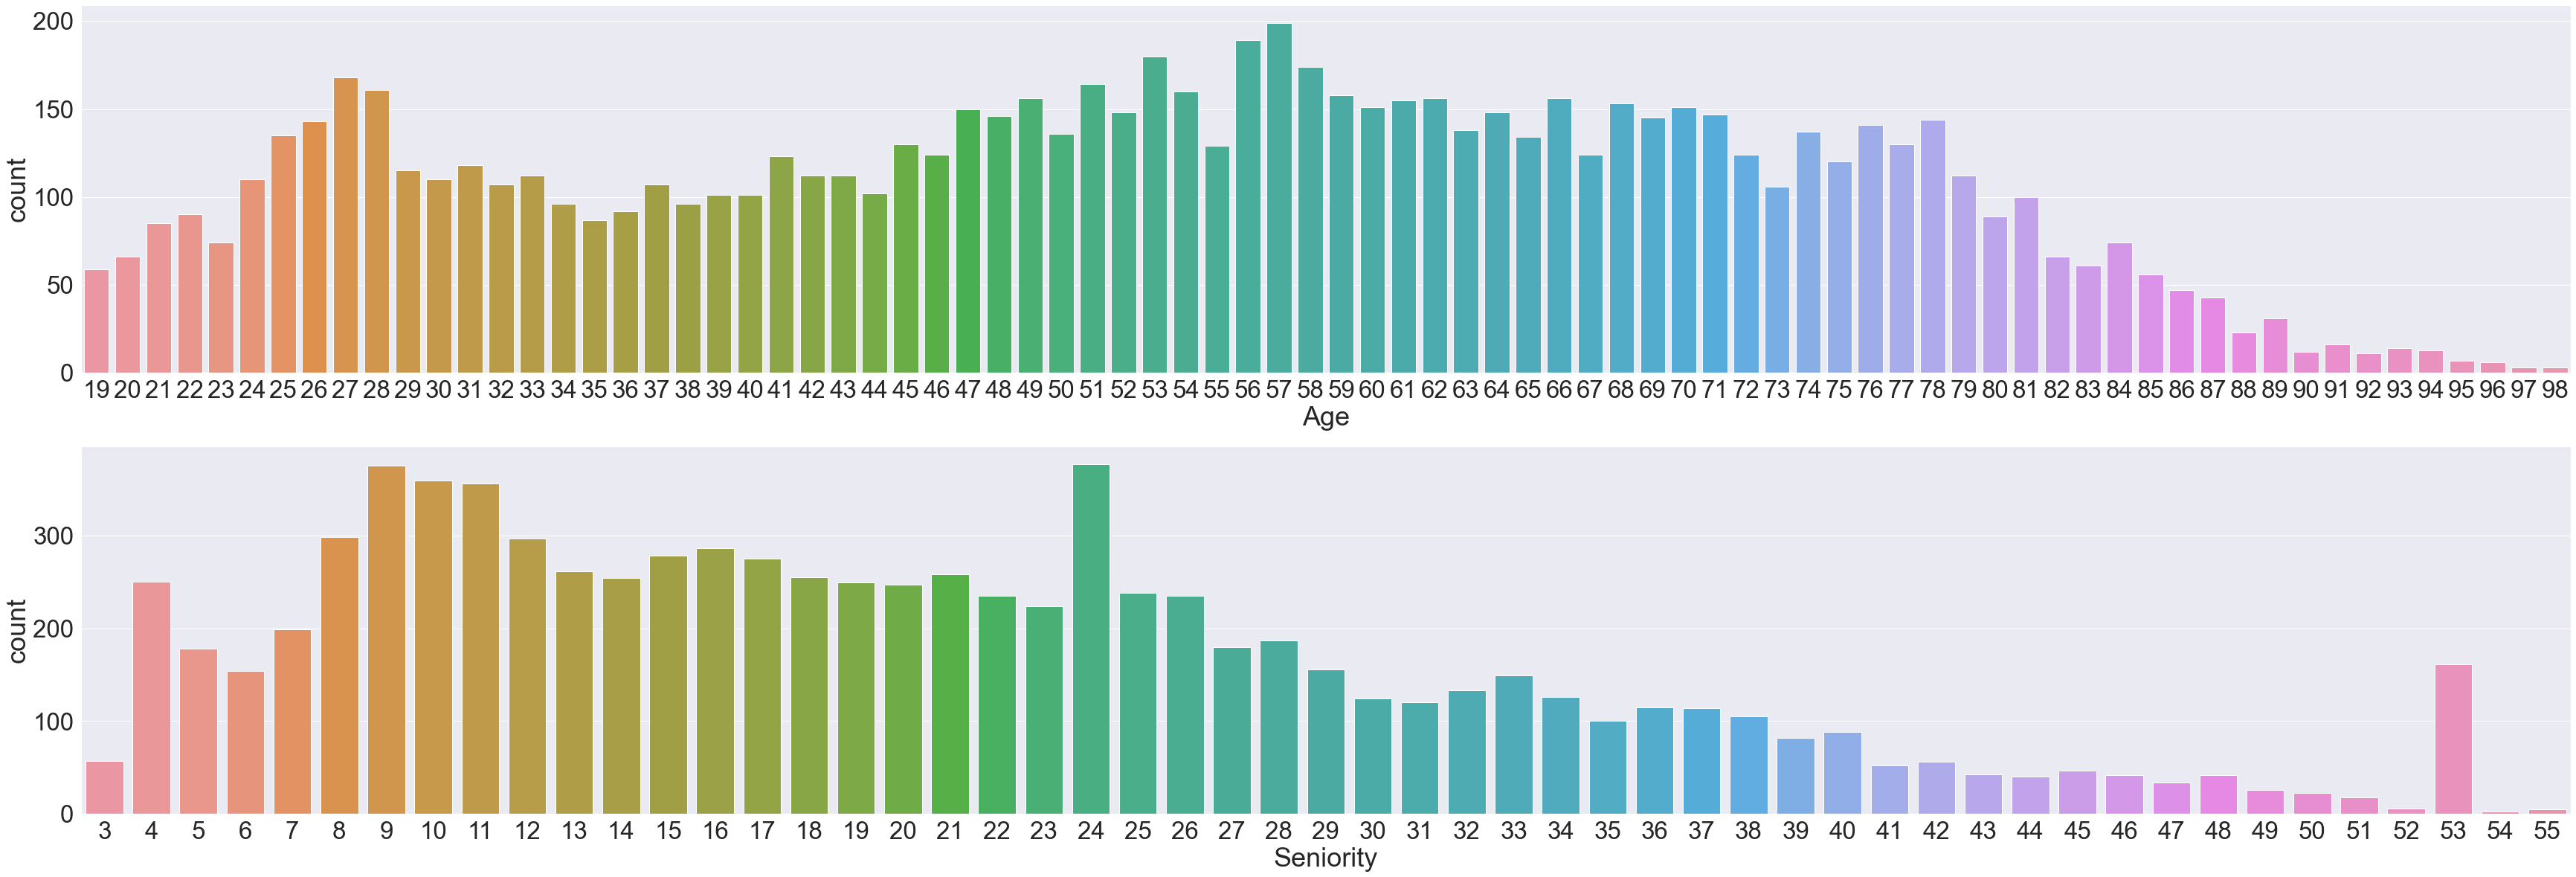

In [152]:
insights = ['Age','Seniority']
Treatment_responders['Seniority'] = Treatment_responders['Seniority'].astype('int64')
plt.figure(figsize=(60,20))
for i, variable in enumerate(insights):
    plt.subplot(2,1,i+1)
    sns.countplot(data=Treatment_responders, x=variable)
plt.savefig('TR_age_sem.png')    
plt.show

Age and seniority distrubution for the persuadables are plotted


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show(close=None, block=None)>

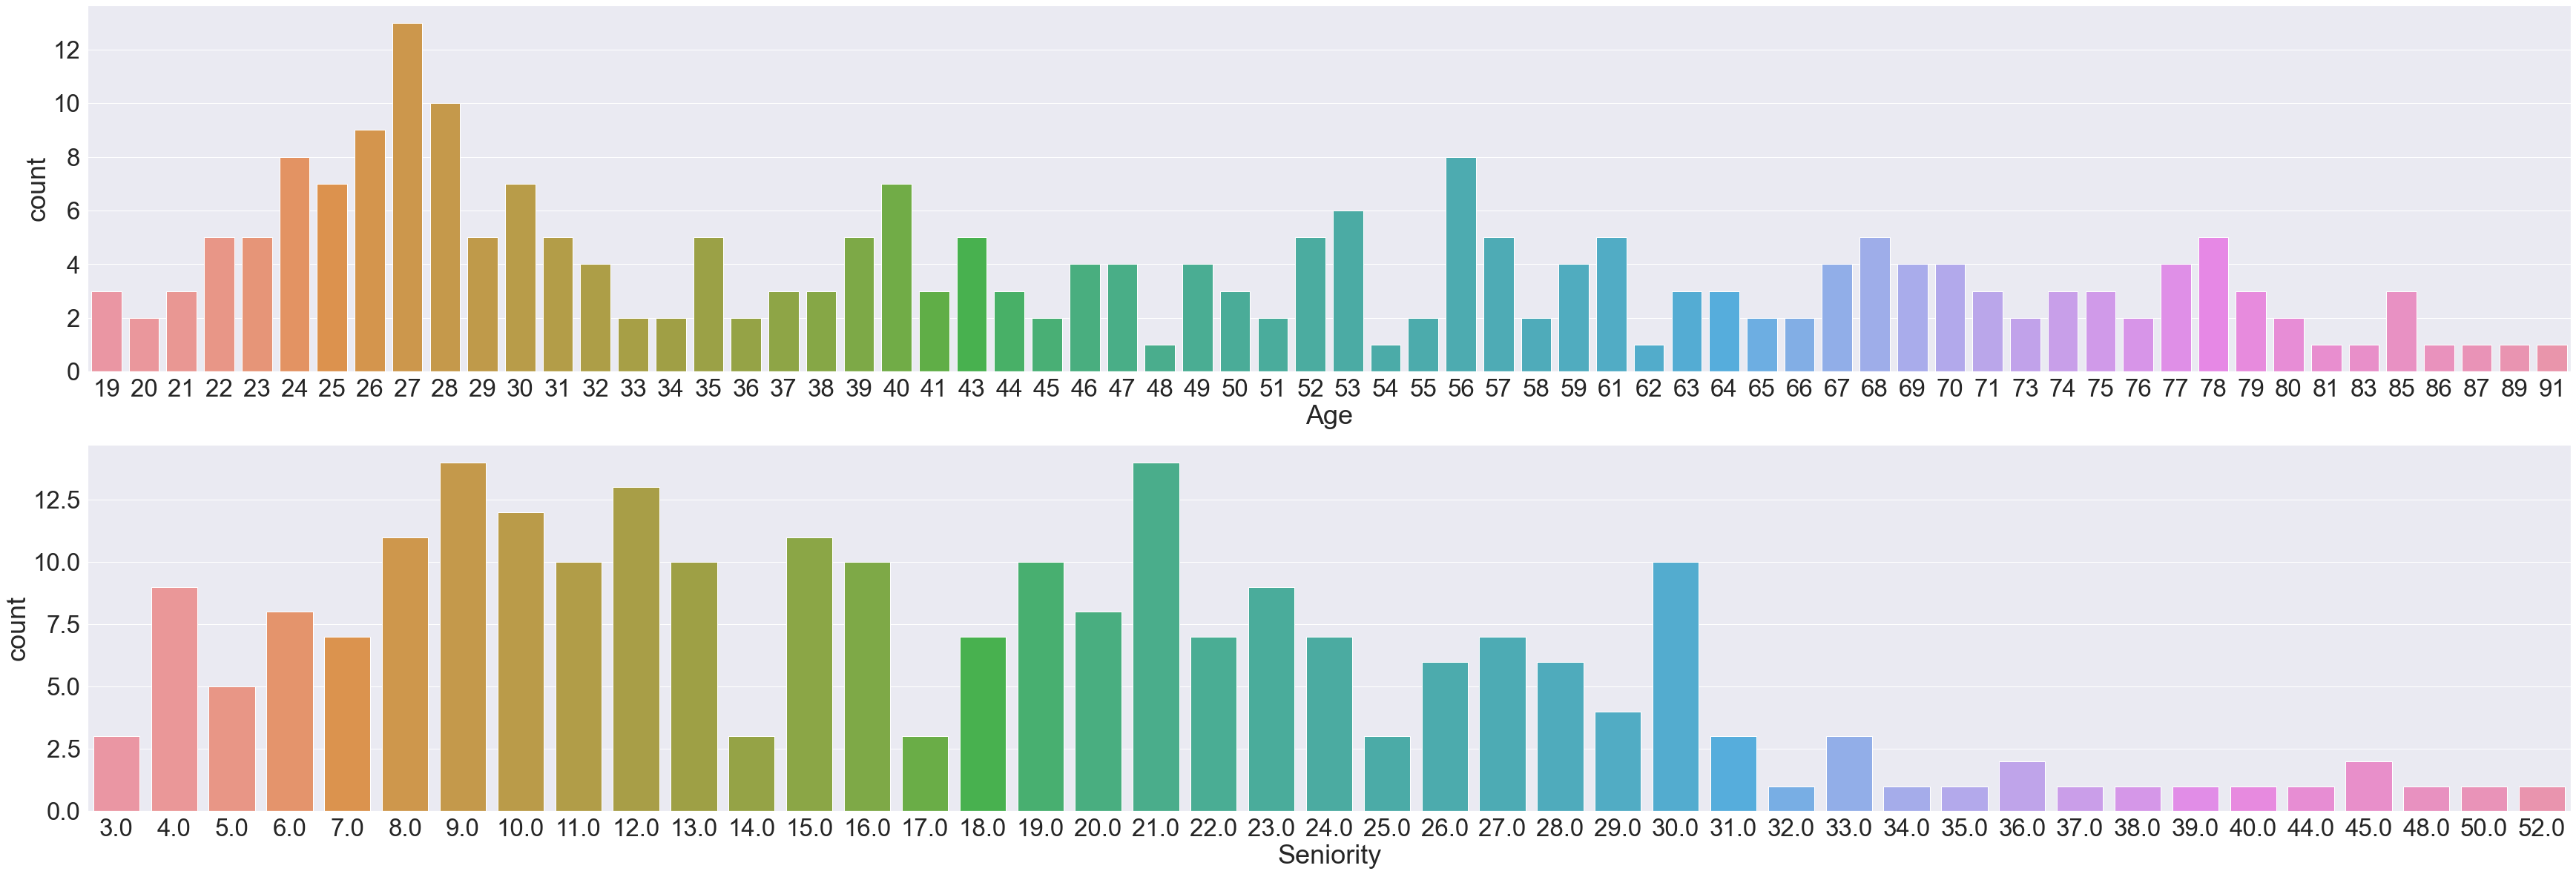

In [153]:
insights = ['Age','Seniority']
Treatment_responders['Seniority'] = Treatment_responders['Seniority'].astype('int64')
plt.figure(figsize=(60,20))
for i, variable in enumerate(insights):
    plt.subplot(2,1,i+1)
    sns.countplot(data=Treatment_responders_churners, x=variable)
plt.savefig('Per_loan_sem.png')
plt.show

Loan and meeting distrubution for the persuadables are plotted

<function matplotlib.pyplot.show(close=None, block=None)>

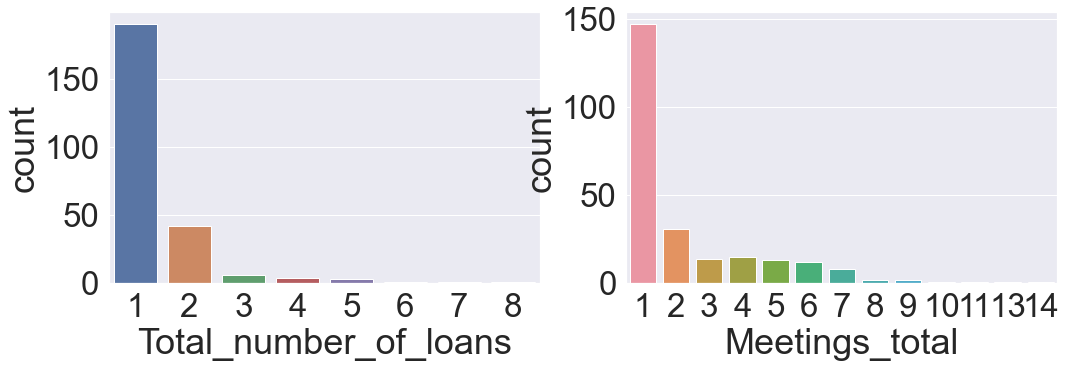

In [143]:
insights = ['Total_number_of_loans','Meetings_total']

plt.figure(figsize=(17,5))
for i, variable in enumerate(insights):
    plt.subplot(1,2,i+1)
    sns.countplot(data=Treatment_responders_churners, x=variable)
plt.savefig('per_loan_meet.png')
plt.show

Age and seniority distrubution for the treatment non responders are plotted


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show(close=None, block=None)>

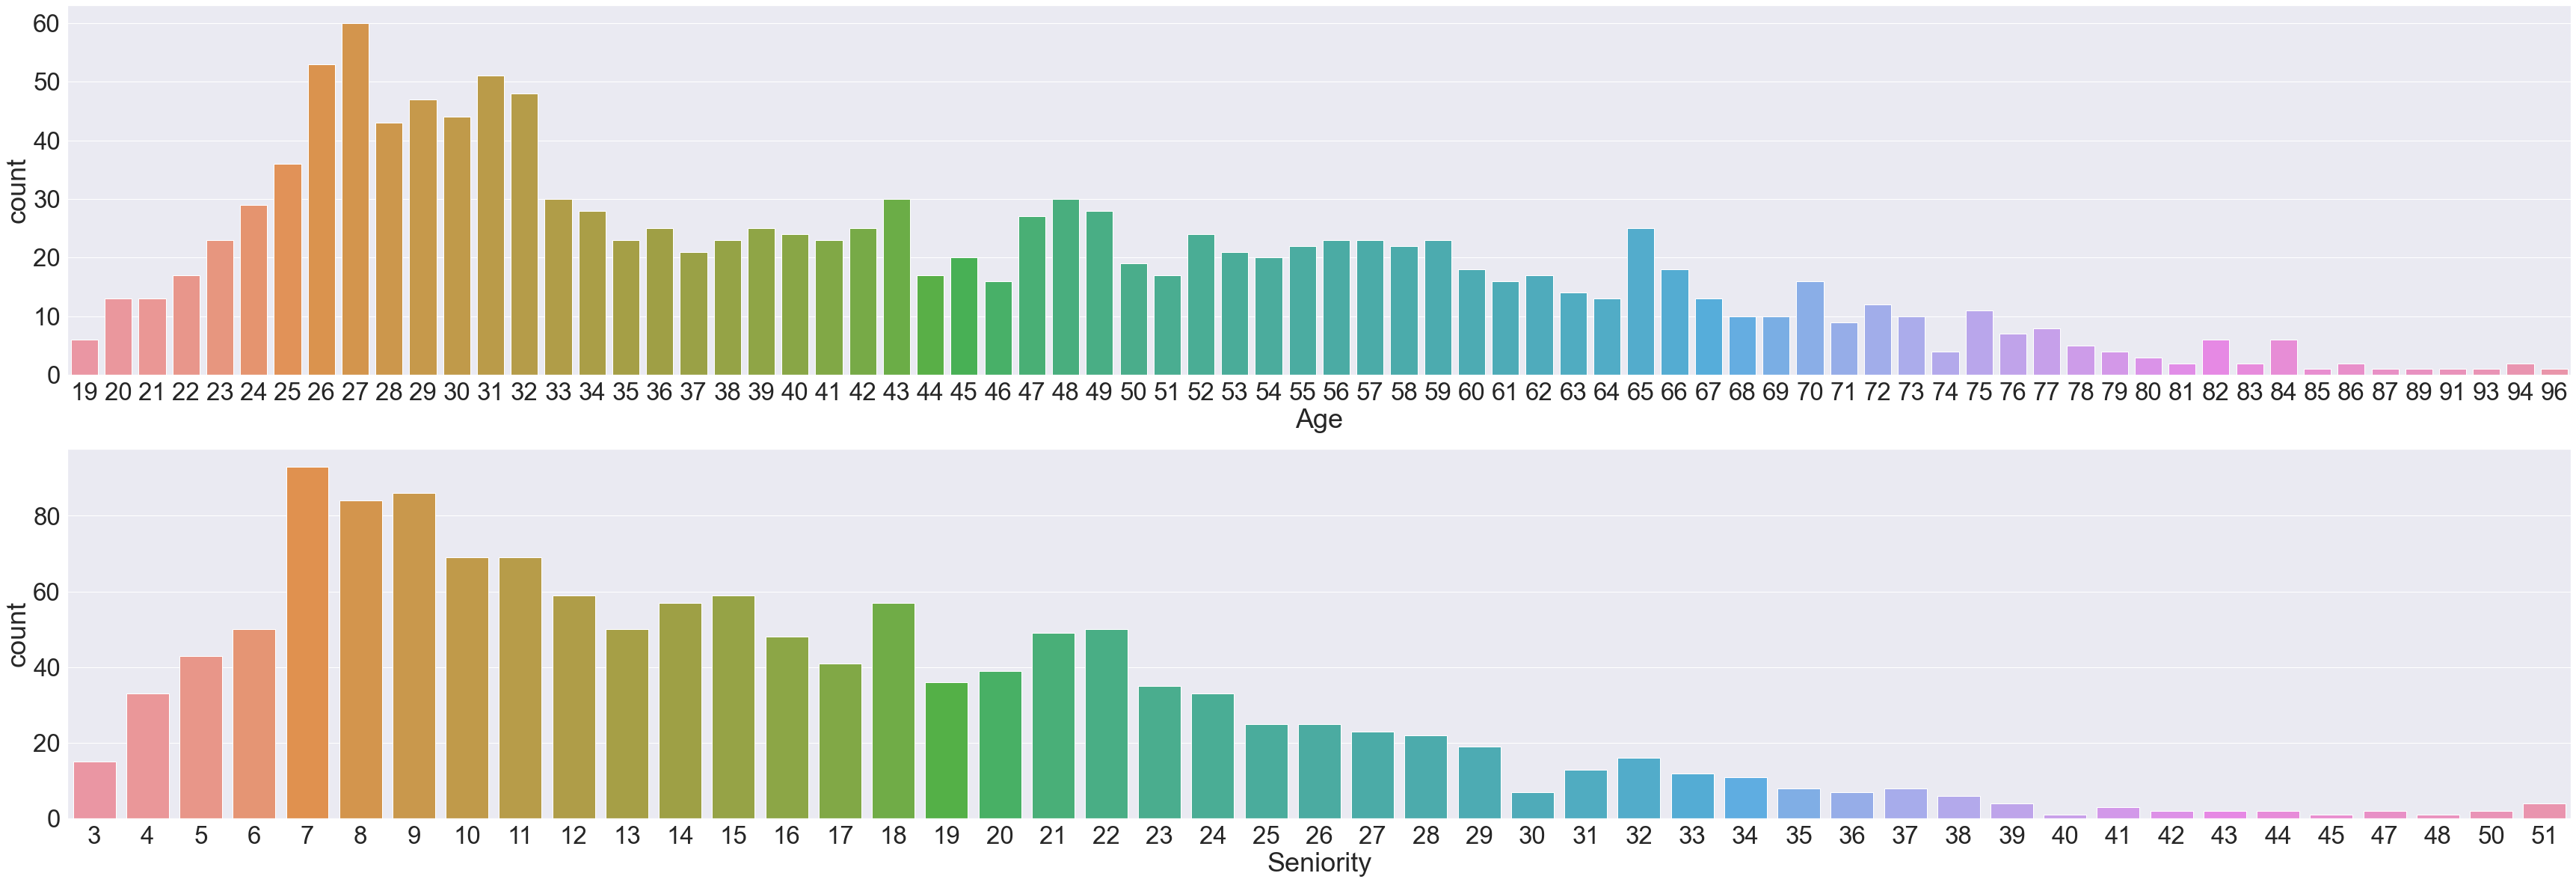

In [154]:
insights = ['Age','Seniority']
Treatment_non_responders['Seniority'] = Treatment_non_responders['Seniority'].astype('int64')
plt.figure(figsize=(60,20))
for i, variable in enumerate(insights):
    plt.subplot(2,1,i+1)
    sns.countplot(data=Treatment_non_responders, x=variable)
plt.savefig('TN_age_sem.png')
plt.show

Age and seniority distrubution for the lost causes are plotted


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show(close=None, block=None)>

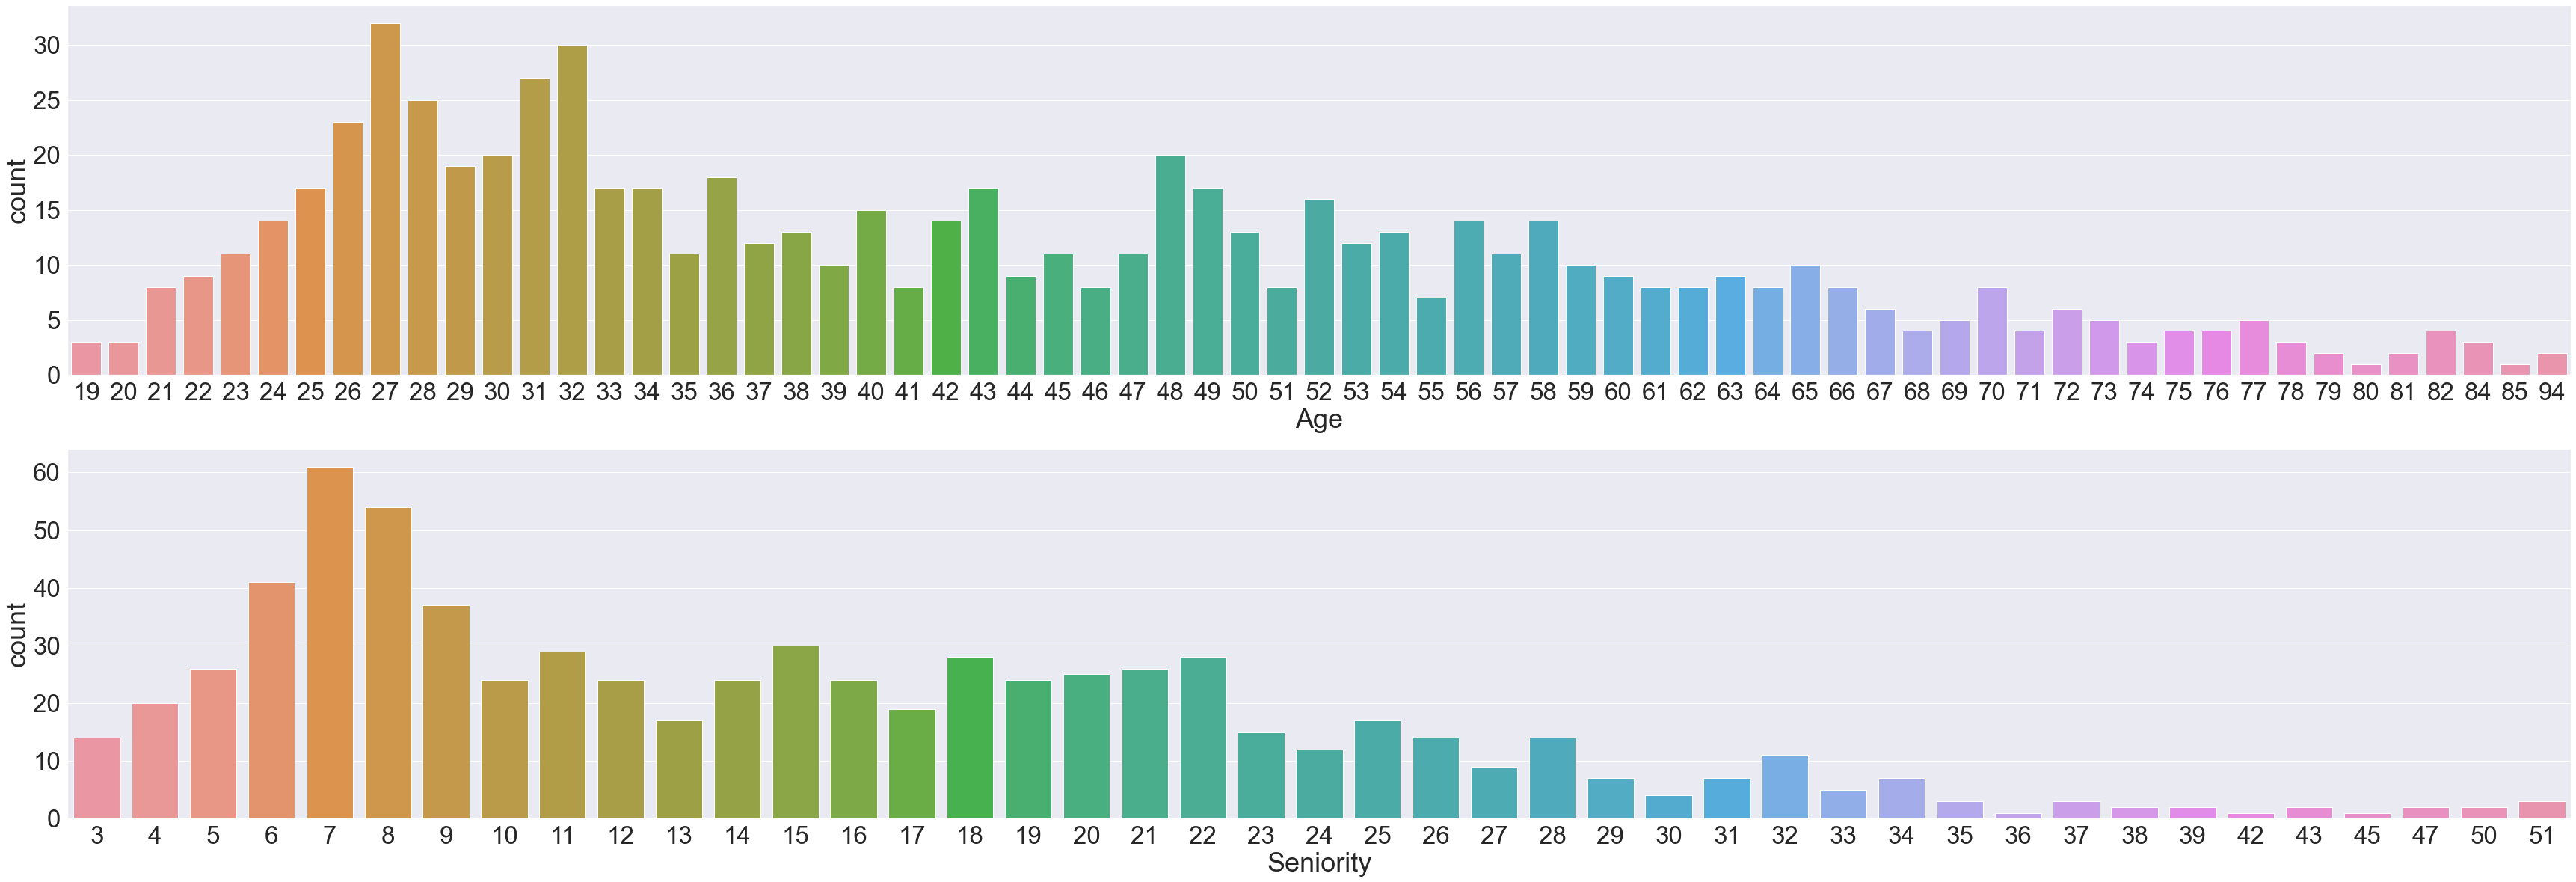

In [155]:
insights = ['Age','Seniority']
Treatment_non_responders_churners['Seniority'] = Treatment_non_responders_churners['Seniority'].astype('int64')
plt.figure(figsize=(60,20))
for i, variable in enumerate(insights):
    plt.subplot(2,1,i+1)
    sns.countplot(data=Treatment_non_responders_churners, x=variable)
plt.savefig('lost_age_sem.png')
plt.show

The labels both actual and predicted are assigned to each prediction, such that information regarding possible persuadables can be otained

In [146]:
Control_responders = df_control[df_control['Label'] == 0]
Control_responders_churners = Control_responders[Control_responders['Actual label'] == 1]
Control_non_responders = df_control[df_control['Label'] == 1]
Control_non_responders_churners = Control_non_responders[Control_non_responders['Actual label'] == 1]

Age and seniority distrubution for the control non responders are plotted


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show(close=None, block=None)>

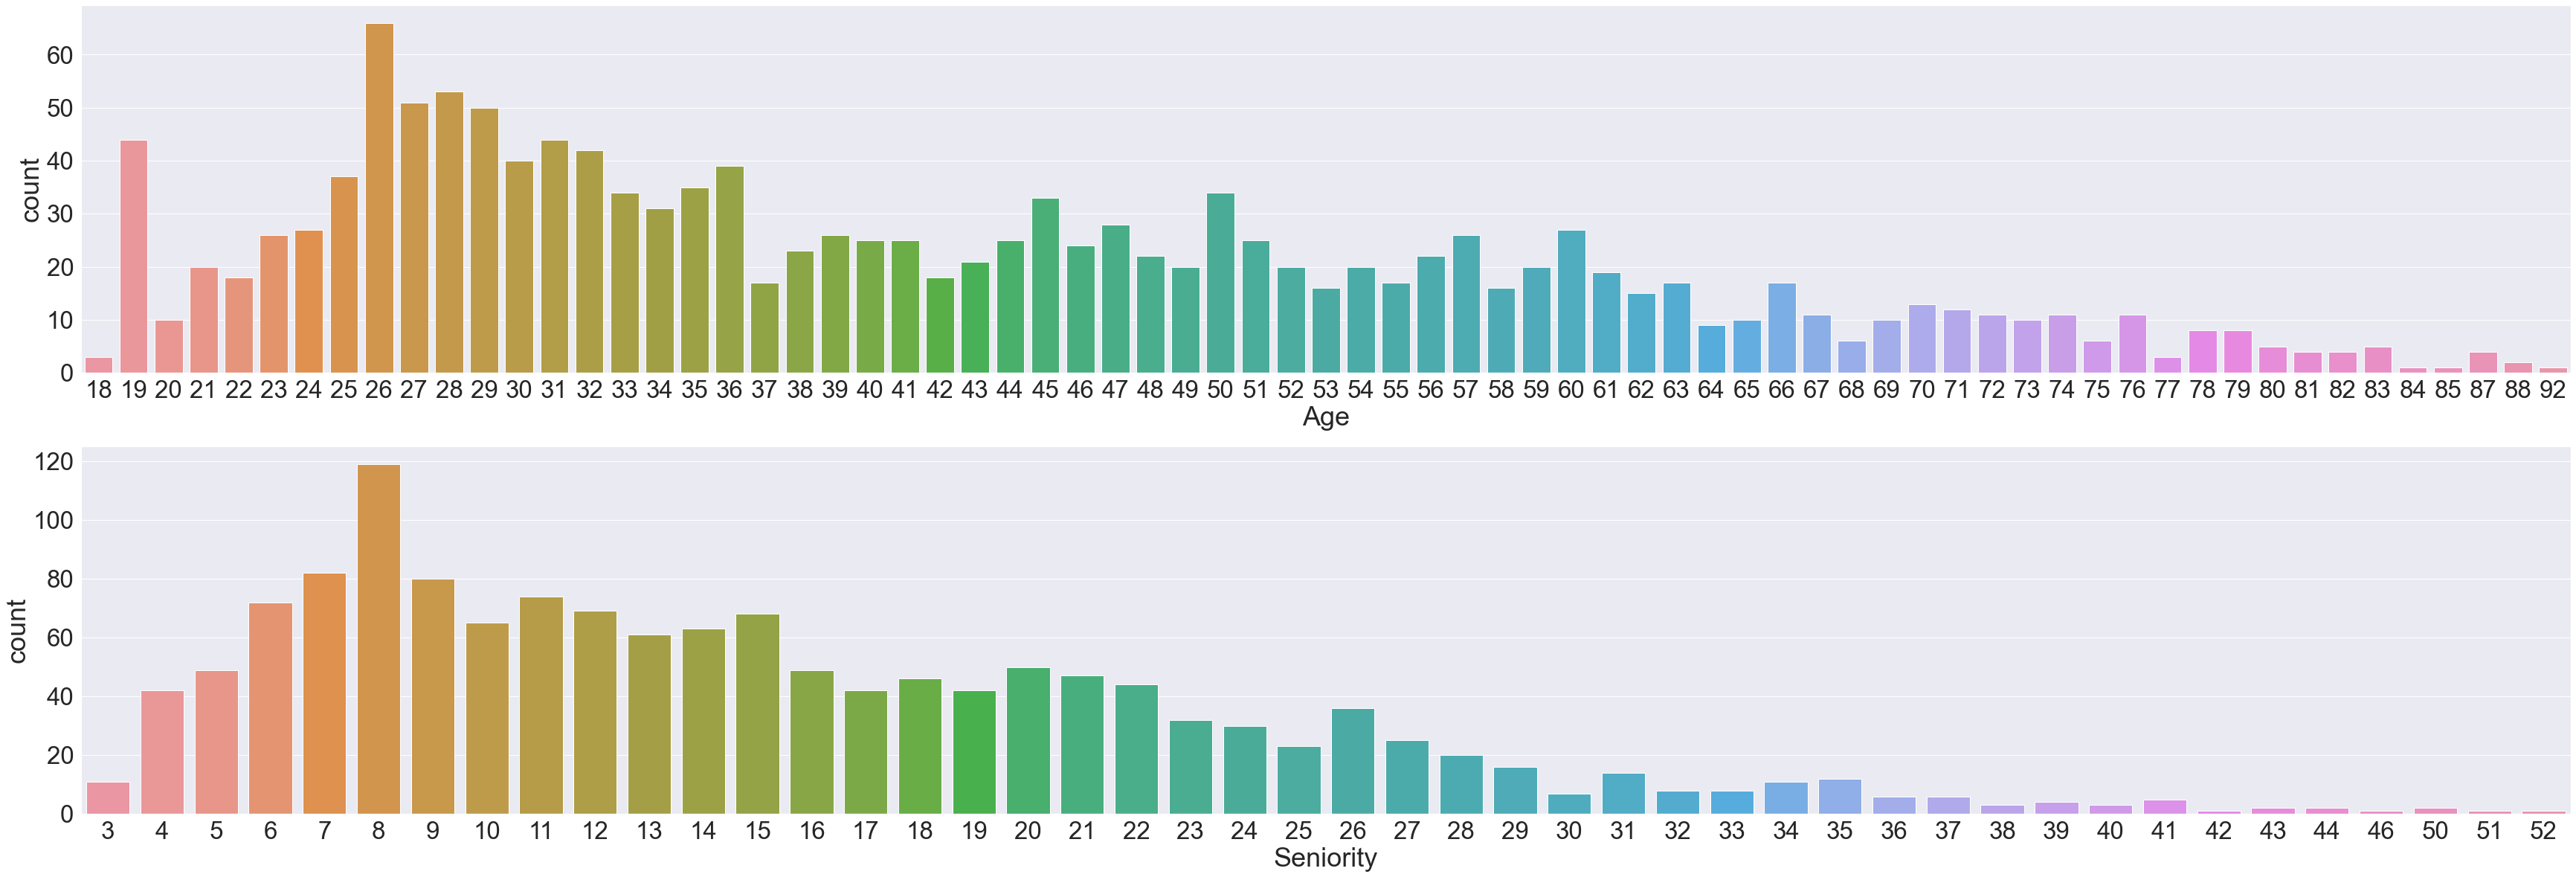

In [156]:
insights = ['Age','Seniority']
Control_non_responders['Seniority'] = Control_non_responders['Seniority'].astype('int64')
plt.figure(figsize=(60,20))
for i, variable in enumerate(insights):
    plt.subplot(2,1,i+1)
    sns.countplot(data=Control_non_responders, x=variable)
plt.savefig('CN_age_sem.png')    
plt.show